In [62]:
import numpy as np 
import pandas as pd 
import re

from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

import tensorflow as tf 
from tensorflow.keras.utils import to_categorical

import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [63]:
!pip install opendatasets

In [64]:
!pip install h2o

In [65]:
pip install pydotplus

In [66]:
%matplotlib inline
import random, os, sys
import h2o
import pandas
import pprint
import operator
import matplotlib
from h2o.estimators.glm import H2OGeneralizedLinearEstimator
from h2o.estimators.gbm import H2OGradientBoostingEstimator
from h2o.estimators.random_forest import H2ORandomForestEstimator
from h2o.estimators.deeplearning import H2ODeepLearningEstimator
from tabulate import tabulate
from h2o.automl import H2OAutoML
from datetime import datetime
import logging
import csv
import optparse
import time
import json
from distutils.util import strtobool
import psutil
import numpy as np
import pandas as pd

In [67]:
import pandas as pd

# Reading the dataset
df = pd.read_csv('ds.csv')


In [68]:
#calculates the minimum memory size in gigabytes (GB) based on a specified percentage of available virtual memory.
pct_memory=0.5
virtual_memory=psutil.virtual_memory()
min_mem_size=int(round(int(pct_memory*virtual_memory.available)/1073741824,0))
print(min_mem_size)

0


In [69]:
#Initializing and managing an H2O cluster. 
port_no=random.randint(5555,55555)

#  h2o.init(strict_version_check=False,min_mem_size_GB=min_mem_size,port=port_no) # start h2o
try:
  h2o.init(strict_version_check=False,min_mem_size_GB=min_mem_size,port=port_no) # start h2o
except:
  logging.critical('h2o.init')
  h2o.download_all_logs(dirname=logs_path, filename=logfile)      
  h2o.cluster().shutdown()
  sys.exit(2)

Checking whether there is an H2O instance running at http://localhost:25950..... not found.
Attempting to start a local H2O server...
; OpenJDK 64-Bit Server VM Corretto-17.0.8.8.1 (build 17.0.8.1+8-LTS, mixed mode, sharing)
  Starting server from D:\data\AC\Lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\LENOVO\AppData\Local\Temp\tmpuinzmh38
  JVM stdout: C:\Users\LENOVO\AppData\Local\Temp\tmpuinzmh38\h2o_LENOVO_started_from_python.out
  JVM stderr: C:\Users\LENOVO\AppData\Local\Temp\tmpuinzmh38\h2o_LENOVO_started_from_python.err
  Server is running at http://127.0.0.1:25950
Connecting to H2O server at http://127.0.0.1:25950 ... successful.
Please download and install the latest version from: https://h2o-release.s3.amazonaws.com/h2o/latest_stable.html


--------------------------  -----------------------------
H2O_cluster_uptime:         07 secs
H2O_cluster_timezone:       America/New_York
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.44.0.3
H2O_cluster_version_age:    4 months and 17 days
H2O_cluster_name:           H2O_from_python_LENOVO_vzb977
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    1.982 Gb
H2O_cluster_total_cores:    8
H2O_cluster_allowed_cores:  8
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://127.0.0.1:25950
H2O_connection_proxy:       {"http": null, "https": null}
H2O_internal_security:      False
Python_version:             3.11.5 final
--------------------------  -----------------------------

In [70]:
# Import and download the dataset code for analysis
import opendatasets as od
data ="ds.csv"

In [71]:
df = pd.read_csv('ds.csv')


In [72]:
# Display the first few rows of the dataset
print(df.head())

# Check for missing values
print(df.isnull().sum())

# Get summary statistics
print(df.describe())


    price       brand      model           trim  kilometers  year  \
0  129900       Dodge        Ram  1500 SLT Crew       47566  2021   
1  319900  Alfa Romeo    Stelvio   Quadrifoglio        8914  2020   
2  149900        Audi         Q5         S-line       72205  2019   
3   79900  Alfa Romeo  GIULIETTA         Veloce       49193  2021   
4  154900         GAC        GS8             GL          30  2024   

   vehicle_age_years regional_specs  doors      body_type  ... interior_color  \
0                  3      GCC Specs      4  Pick Up Truck  ...        Unknown   
1                  4      GCC Specs      5            SUV  ...          Black   
2                  5      GCC Specs      5            SUV  ...          Brown   
3                  3      GCC Specs      4      Hatchback  ...          Black   
4                  0      GCC Specs      5            SUV  ...    Other Color   

   warranty                         address country   city  area_name  \
0       Yes  Al Khabaisi,

In [73]:
# Select only numeric columns for calculating mean
numeric_cols = df.select_dtypes(include=np.number)

# Fill missing values with the mean of each column
df[numeric_cols.columns] = numeric_cols.fillna(numeric_cols.mean())


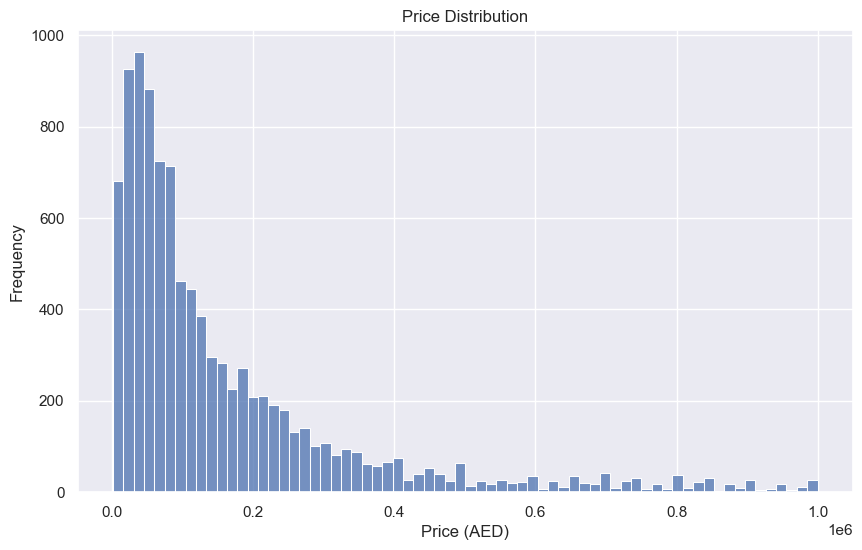

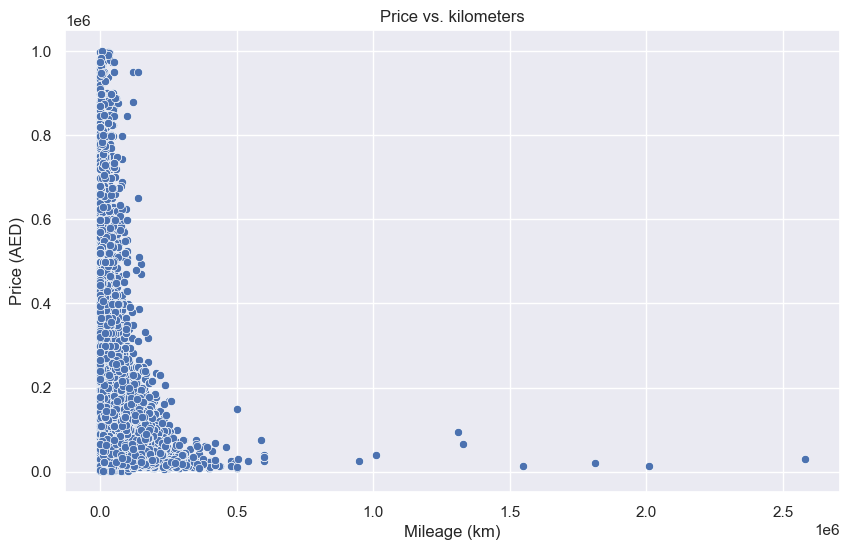

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize price distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['price'])
plt.title('Price Distribution')
plt.xlabel('Price (AED)')
plt.ylabel('Frequency')
plt.show()

# Visualize relationship between price and mileage
plt.figure(figsize=(10, 6))
sns.scatterplot(x='kilometers', y='price', data=df)
plt.title('Price vs. kilometers')
plt.xlabel('Mileage (km)')
plt.ylabel('Price (AED)')
plt.show()


In [75]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the dataset
df = pd.read_csv('ds.csv')

# Create a new feature for age of the vehicle
current_year = 2024
df['age'] = current_year - df['year']

# Transform categorical variables into dummy variables for selected columns
categorical_columns = ['brand', 'model']  # Specify the columns you want to transform
df = pd.get_dummies(df, columns=categorical_columns)

# Drop rows with missing target variable
df = df.dropna(subset=['price'])

# Proceed with the rest of the code for preprocessing and model training...


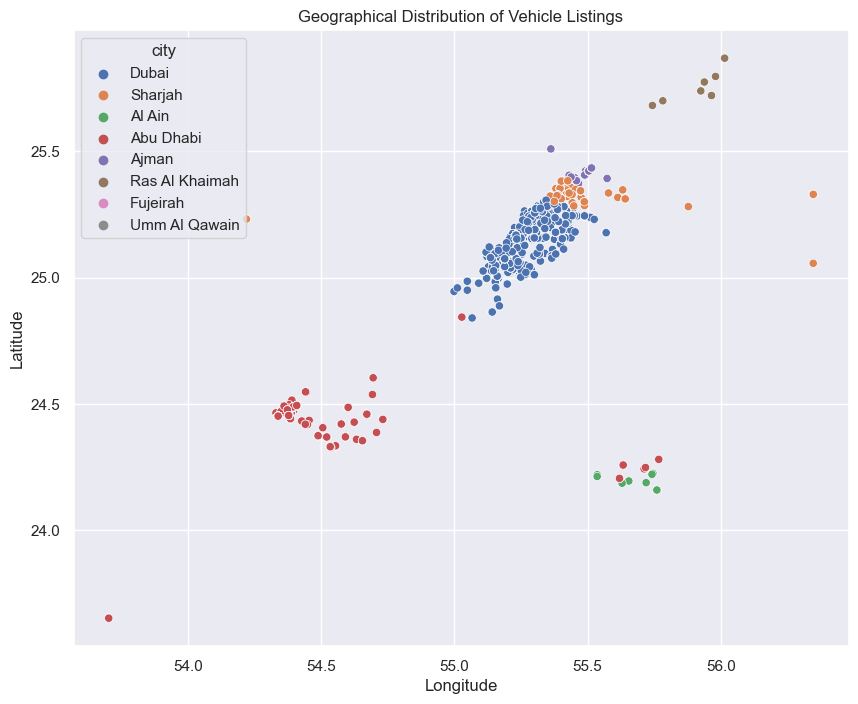

In [76]:
# Visualize geographical distribution of vehicle listings
plt.figure(figsize=(10, 8))
sns.scatterplot(x='longitude', y='latitude', data=df, hue='city')
plt.title('Geographical Distribution of Vehicle Listings')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


In [77]:
import pandas as pd

# Load the dataset
df = pd.read_csv('ds.csv')

# Create dummy variables for the 'brand' column
brand_dummies = pd.get_dummies(df['brand'], prefix='brand')

# Concatenate the dummy variables with the original DataFrame
df = pd.concat([df, brand_dummies], axis=1)

# Now 'brand' column should be back in your DataFrame with dummy variables


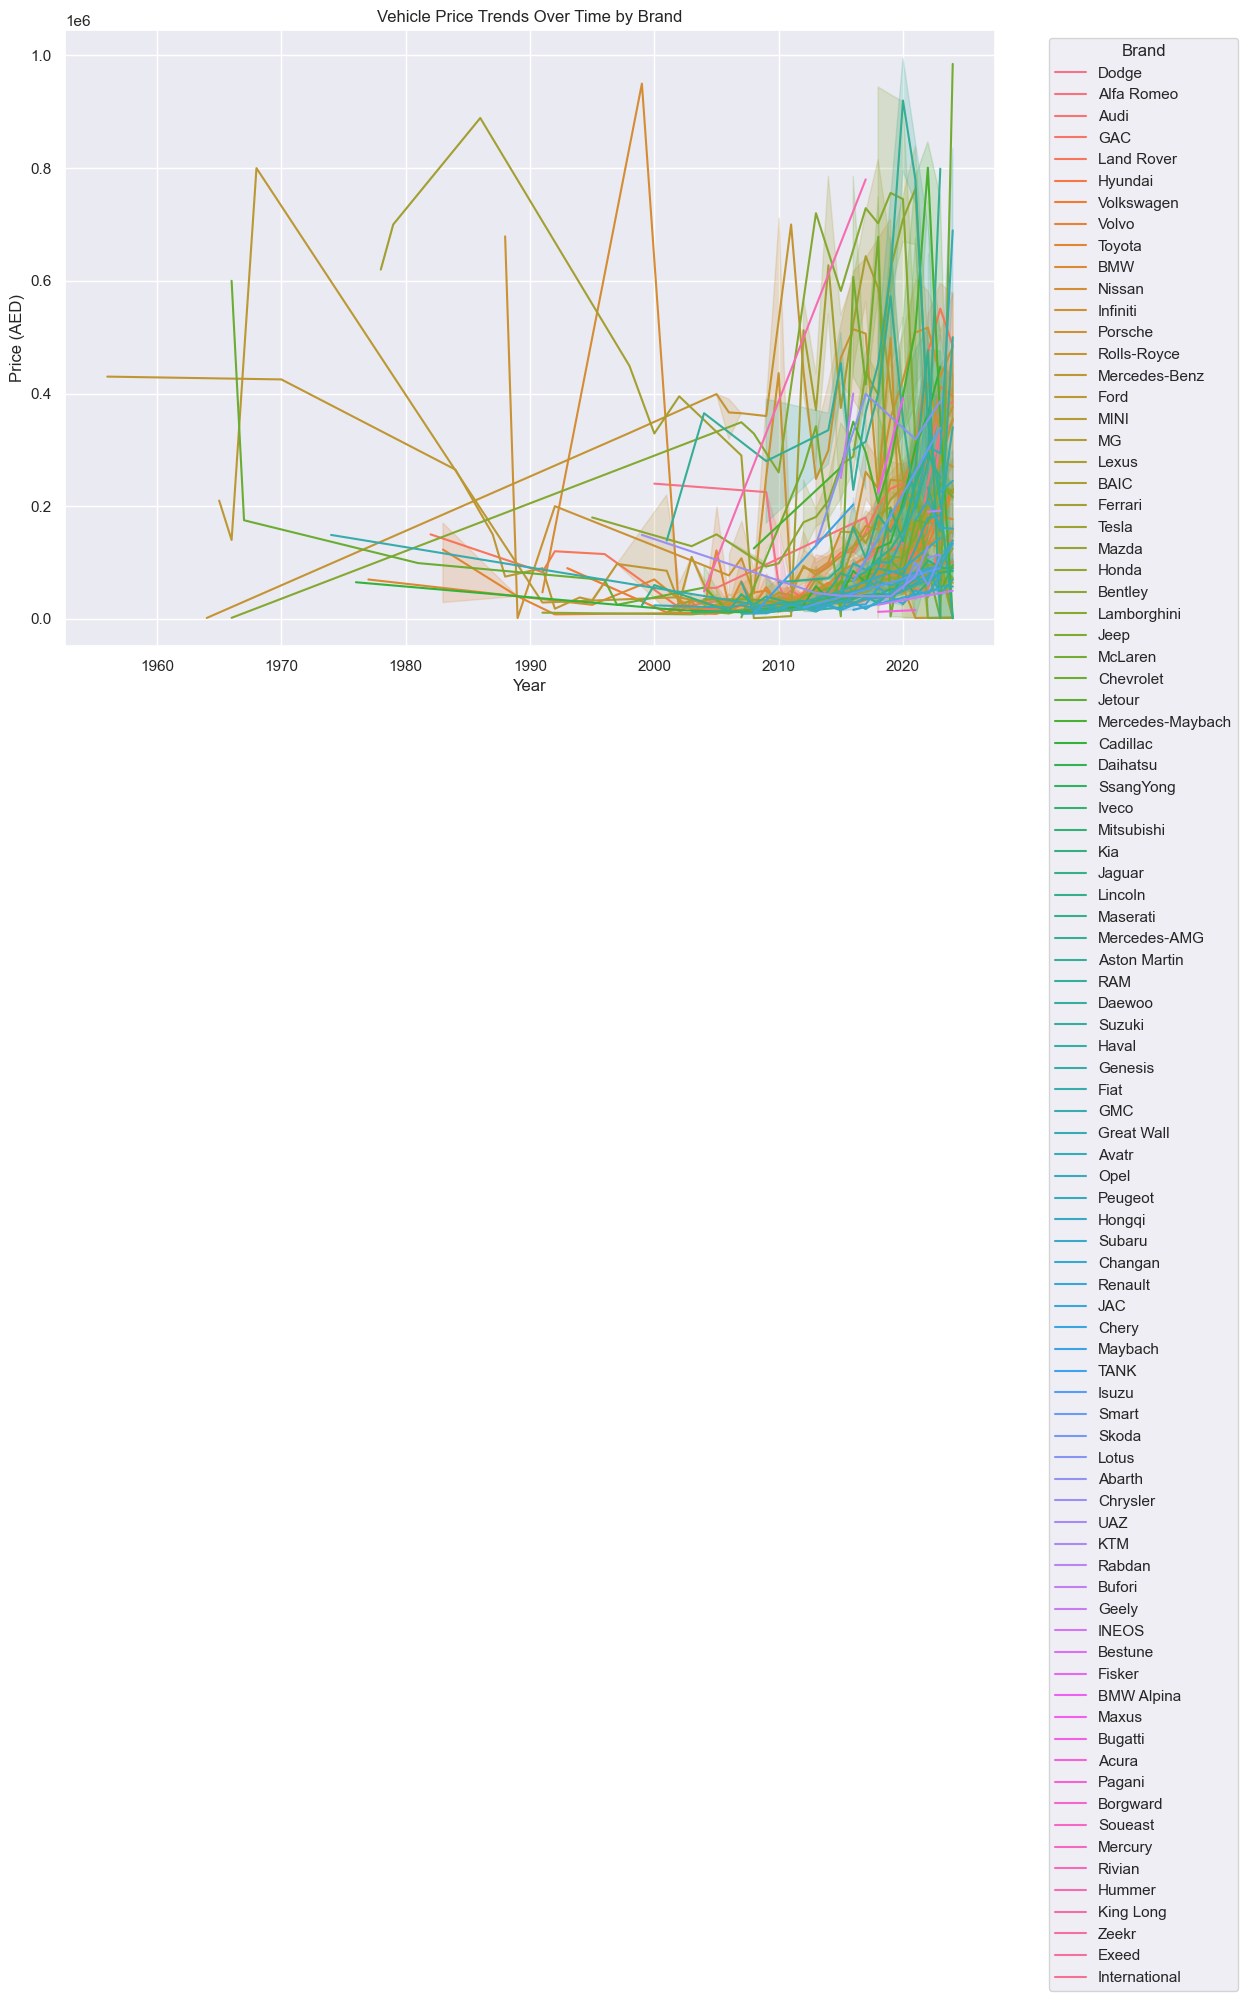

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize price trends over time for each brand
plt.figure(figsize=(12, 8))
sns.lineplot(data=df, x='year', y='price', hue='brand')
plt.title('Vehicle Price Trends Over Time by Brand')
plt.xlabel('Year')
plt.ylabel('Price (AED)')
plt.legend(title='Brand', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


In [79]:

# Combine categorical features
df['vehicle_description'] = df['brand'] + ' ' + df['model'] + ' ' + df['trim']


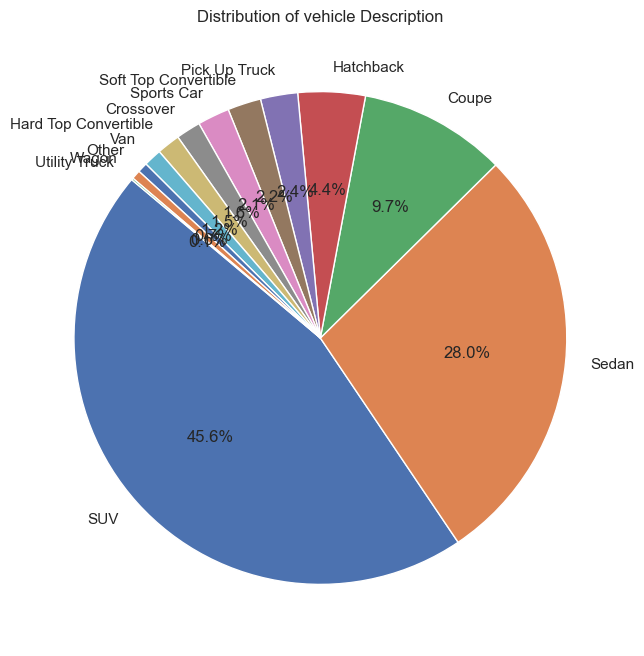

In [80]:
# Pie chart for distribution of transmission types
transmission_counts = df['body_type'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(transmission_counts, labels=transmission_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of vehicle Description')
plt.show()


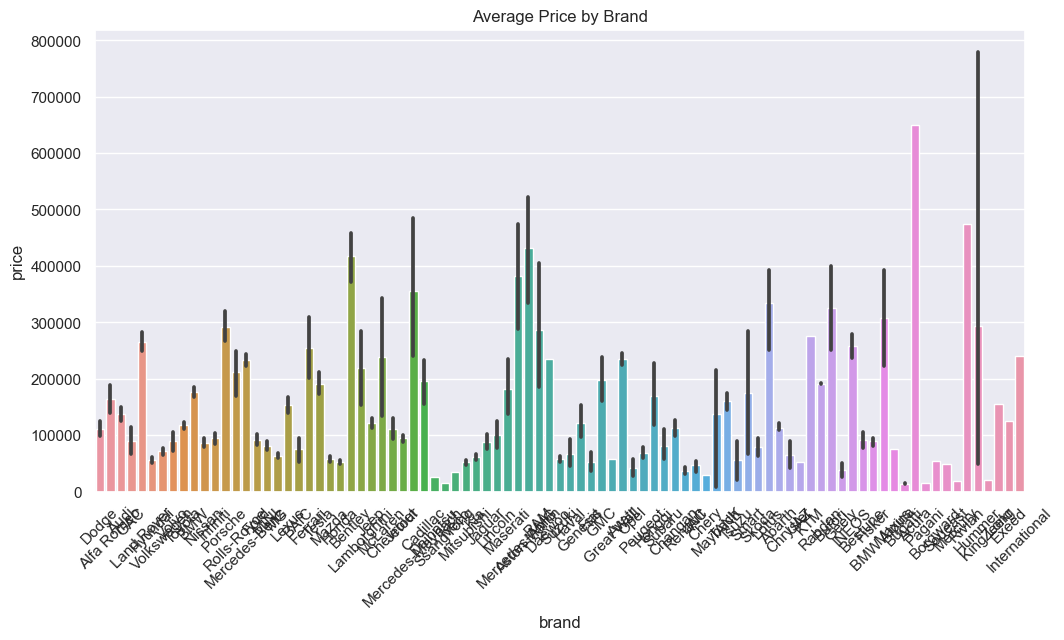

In [81]:
# Bar plot for average price by brand
plt.figure(figsize=(12, 6))
sns.barplot(x='brand', y='price', data=df)
plt.title('Average Price by Brand')
plt.xticks(rotation=45)
plt.show()


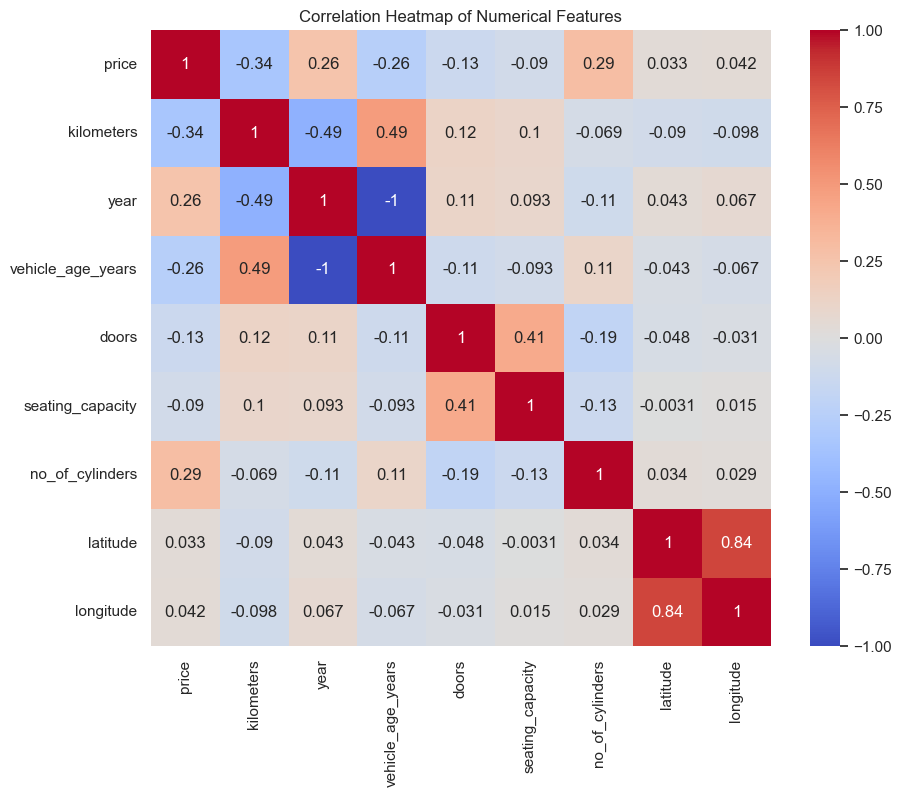

In [82]:
# Filter out non-numeric columns and compute the correlation matrix
numerical_df = df.select_dtypes(include=['number'])
corr_matrix = numerical_df.corr()

# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Numerical Features')
plt.show()


In [99]:
import h2o
from h2o.estimators import H2OGradientBoostingEstimator

# Initialize H2O cluster
h2o.init()

# Load data into H2OFrame
data = h2o.import_file("ds.csv")

# Split data into train and test sets
train, test = data.split_frame(ratios=[0.8])

# Define and train a Gradient Boosting Machine model
gbm = H2OGradientBoostingEstimator()
gbm.train(x=train.columns, y="brand", training_frame=train)

# Evaluate model performance
performance = gbm.model_performance(test_data=test)

# Generate predictions
predictions = gbm.predict(test)




Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
; OpenJDK 64-Bit Server VM Corretto-17.0.8.8.1 (build 17.0.8.1+8-LTS, mixed mode, sharing)
  Starting server from D:\data\AC\Lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\LENOVO\AppData\Local\Temp\tmp6seex_7z
  JVM stdout: C:\Users\LENOVO\AppData\Local\Temp\tmp6seex_7z\h2o_LENOVO_started_from_python.out
  JVM stderr: C:\Users\LENOVO\AppData\Local\Temp\tmp6seex_7z\h2o_LENOVO_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.
Please download and install the latest version from: https://h2o-release.s3.amazonaws.com/h2o/latest_stable.html


--------------------------  -----------------------------
H2O_cluster_uptime:         07 secs
H2O_cluster_timezone:       America/New_York
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.44.0.3
H2O_cluster_version_age:    4 months and 17 days
H2O_cluster_name:           H2O_from_python_LENOVO_nn2301
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    1.982 Gb
H2O_cluster_total_cores:    8
H2O_cluster_allowed_cores:  8
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://127.0.0.1:54321
H2O_connection_proxy:       {"http": null, "https": null}
H2O_internal_security:      False
Python_version:             3.11.5 final
--------------------------  -----------------------------

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
gbm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%
gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%


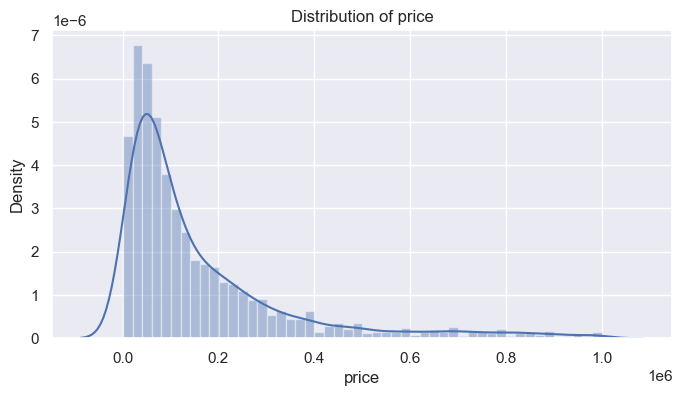

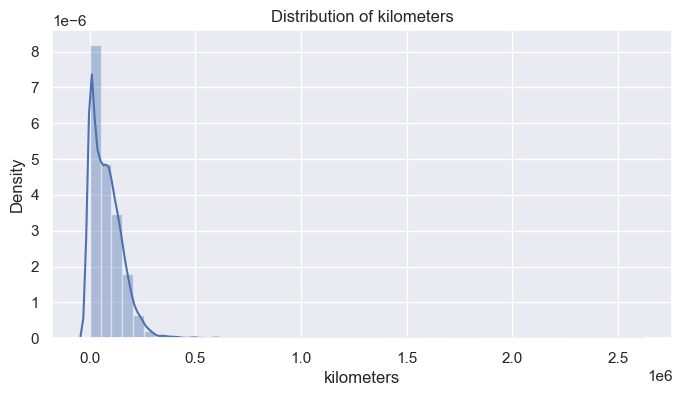

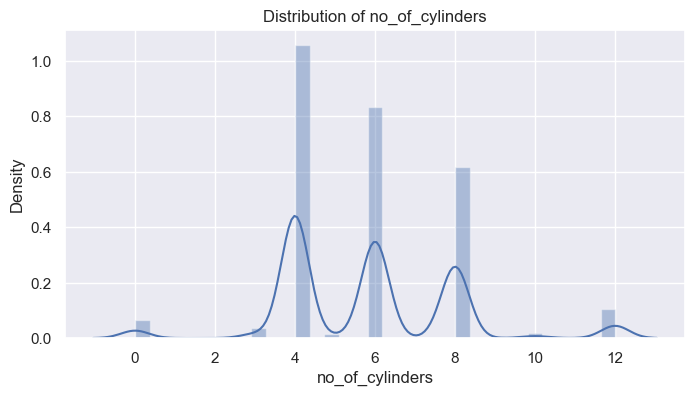

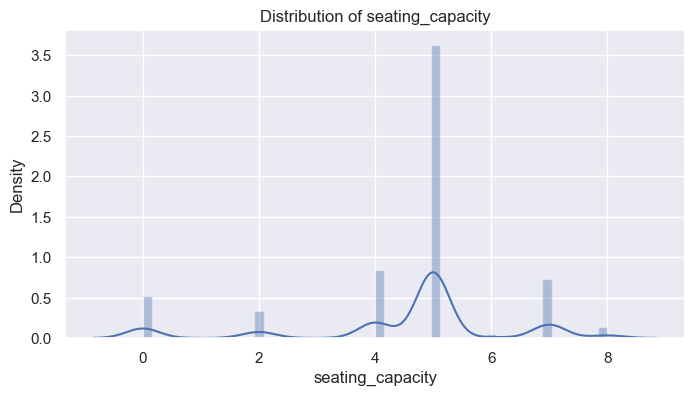

In [100]:
import seaborn as sns
import matplotlib.pyplot as plt

# Selecting columns of interest
field_names = df[['price', 'kilometers', 'no_of_cylinders','seating_capacity']]

# Plotting the distribution of each variable
for column in field_names.columns:
    sns.set(rc={"figure.figsize": (8, 4)});
    sns.distplot(df[column])
    plt.title(f"Distribution of {column}")
    plt.xlabel(column)
    plt.ylabel("Density")
    plt.show()


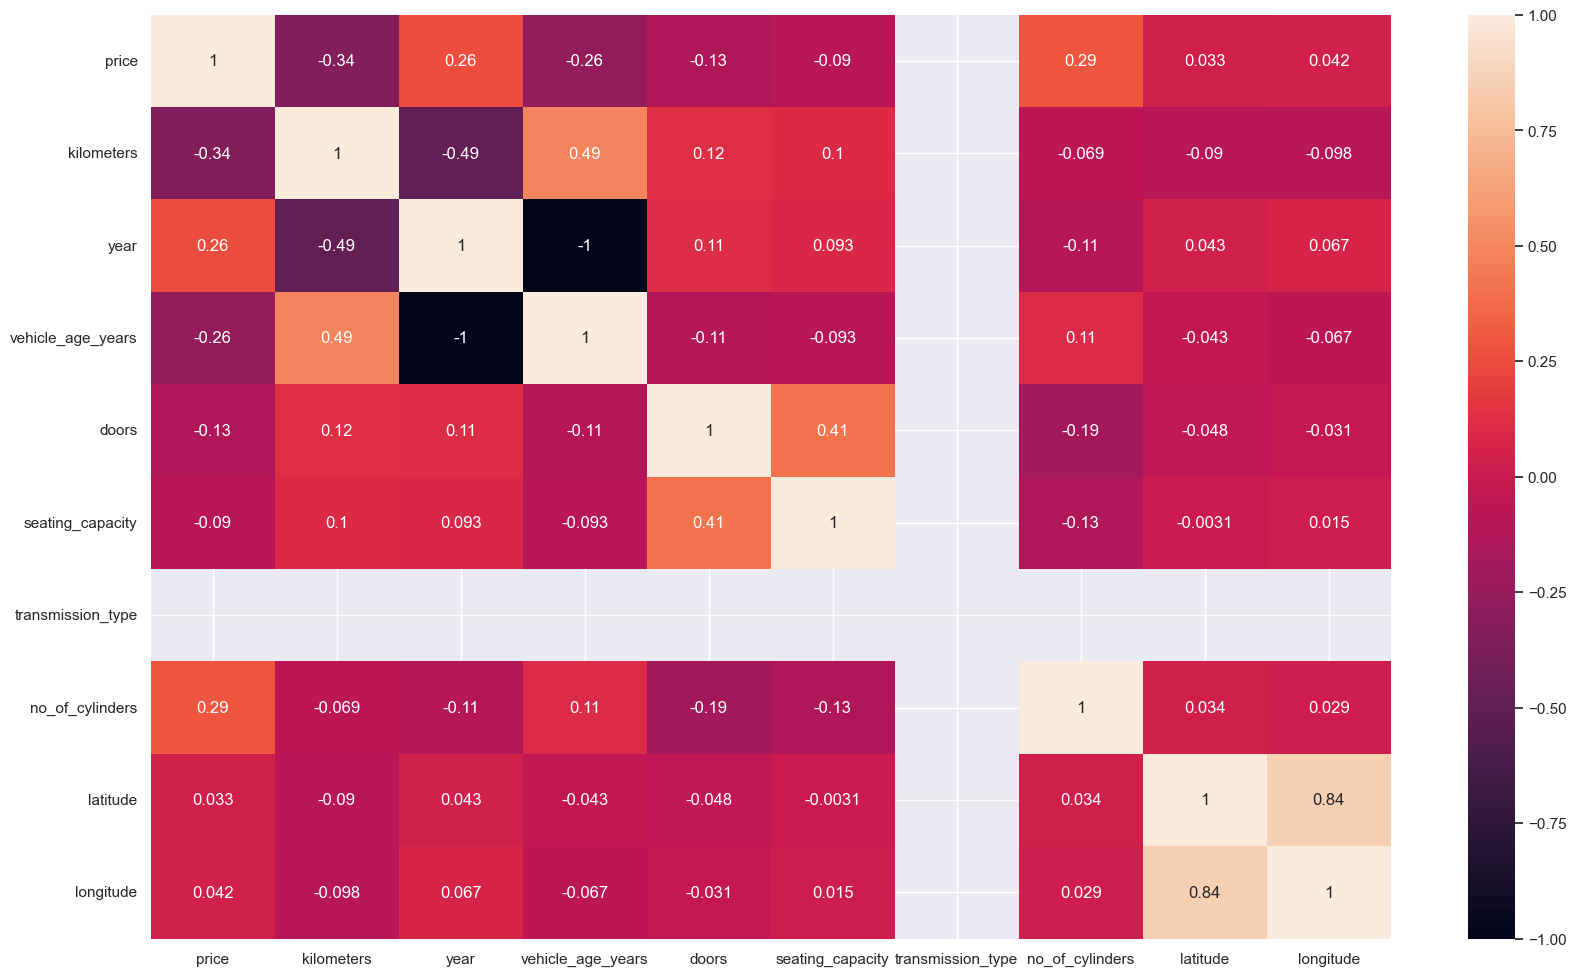

In [101]:
# Selecting only numeric columns
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Calculating correlation matrix for numeric columns
corr = df[numeric_columns].corr()

# Plotting heatmap
plt.figure(figsize=(20, 12))
sns.heatmap(corr, annot=True)
plt.show()


In [102]:
# Assuming 'df' is your DataFrame and 'column_name' is the specific column you want to encode
# Use map function to replace 'automatic' with 1 and 'manual' with 0
df['transmission_type'] = df['transmission_type'].map({'automatic': 1, 'manual': 0})

# Display the modified DataFrame
print(df.head())


    price       brand      model           trim  kilometers  year  \
0  129900       Dodge        Ram  1500 SLT Crew       47566  2021   
1  319900  Alfa Romeo    Stelvio   Quadrifoglio        8914  2020   
2  149900        Audi         Q5         S-line       72205  2019   
3   79900  Alfa Romeo  GIULIETTA         Veloce       49193  2021   
4  154900         GAC        GS8             GL          30  2024   

   vehicle_age_years regional_specs  doors      body_type  ... brand_Subaru  \
0                  3      GCC Specs      4  Pick Up Truck  ...        False   
1                  4      GCC Specs      5            SUV  ...        False   
2                  5      GCC Specs      5            SUV  ...        False   
3                  3      GCC Specs      4      Hatchback  ...        False   
4                  0      GCC Specs      5            SUV  ...        False   

   brand_Suzuki  brand_TANK brand_Tesla brand_Toyota  brand_UAZ  \
0         False       False       False    

In [93]:
pip install shap


Note: you may need to restart the kernel to use updated packages.


In [105]:
import statsmodels.api as sm
import pandas as pd

# Convert H2OFrame to Pandas DataFrame
data_df = data.as_data_frame()

# Use Pandas DataFrame in OLS regression
model = sm.OLS(data_df['price'], data_df[['seating_capacity', 'kilometers']]).fit()

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.372
Model:                            OLS   Adj. R-squared (uncentered):              0.372
Method:                 Least Squares   F-statistic:                              2947.
Date:                Wed, 08 May 2024   Prob (F-statistic):                        0.00
Time:                        12:07:59   Log-Likelihood:                     -1.3542e+05
No. Observations:                9953   AIC:                                  2.708e+05
Df Residuals:                    9951   BIC:                                  2.708e+05
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
seating_capacity   3.68e+04    525.826     69.977      0.000    3.58e+04    3.78e+04
kilometers          -0.4630      0.021    -21.745      0.000      -0.505      -0.421
==============================================================================
Omnibus:                     4318.337   Durbin-Watson:                   1.467
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            18521.886
Skew:                           2.161   Prob(JB):                         0.00
Kurtosis:                       8.098   Cond. No.                     3.26e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 3.26e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [109]:
# Data exploration and munging. Generate scatter plots 

def scatter_plot(data, x, y, max_points = 1000, fit = True):
    if(fit):
        lr = H2OGeneralizedLinearEstimator(family = "gaussian")
        lr.train(x=x, y=y, training_frame=data)
        coeff = lr.coef()
    df = data[[x,y]]
    runif = df[y].runif()
    df_subset = df[runif < float(max_points)/data.nrow]
    df_py = h2o.as_list(df_subset)
    
    if(fit): h2o.remove(lr._id)

    # If x variable is string, generate box-and-whisker plot
    if(df_py[x].dtype == "object"):
        if interactive: df_py.boxplot(column = y, by = x)
    # Otherwise, generate a scatter plot
    else:
        if interactive: df_py.plot(x = x, y = y, kind = "scatter")
    
    if(fit):
        x_min = min(df_py[x])
        x_max = max(df_py[x])
        y_min = coeff["Intercept"] + coeff[x]*x_min
        y_max = coeff["Intercept"] + coeff[x]*x_max
        plt.plot([x_min, x_max], [y_min, y_max], "k-")
    if interactive: plt.show()

In [112]:
df.head()

price       brand      model           trim  kilometers  year  \
0  129900       Dodge        Ram  1500 SLT Crew       47566  2021   
1  319900  Alfa Romeo    Stelvio   Quadrifoglio        8914  2020   
2  149900        Audi         Q5         S-line       72205  2019   
3   79900  Alfa Romeo  GIULIETTA         Veloce       49193  2021   
4  154900         GAC        GS8             GL          30  2024   

   vehicle_age_years regional_specs  doors      body_type  ... brand_Subaru  \
0                  3      GCC Specs      4  Pick Up Truck  ...        False   
1                  4      GCC Specs      5            SUV  ...        False   
2                  5      GCC Specs      5            SUV  ...        False   
3                  3      GCC Specs      4      Hatchback  ...        False   
4                  0      GCC Specs      5            SUV  ...        False   

   brand_Suzuki  brand_TANK brand_Tesla brand_Toyota  brand_UAZ  \
0         False       False       False        False      False   
1         False       False       False        False      False   
2         False       False       False        False      False   
3         False       False       False        False      False   
4         False       False       False        False      False   

  brand_Volkswagen brand_Volvo brand_Zeekr              vehicle_description  
0            False       False       False          Dodge Ram 1500 SLT Crew  
1            False       False       False  Alfa Romeo Stelvio Quadrifoglio  
2            False       False       False                   Audi Q5 S-line  
3            False       False       False      Alfa Romeo GIULIETTA Veloce  
4            False       False       False                       GAC GS8 GL  

[5 rows x 117 columns]

glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


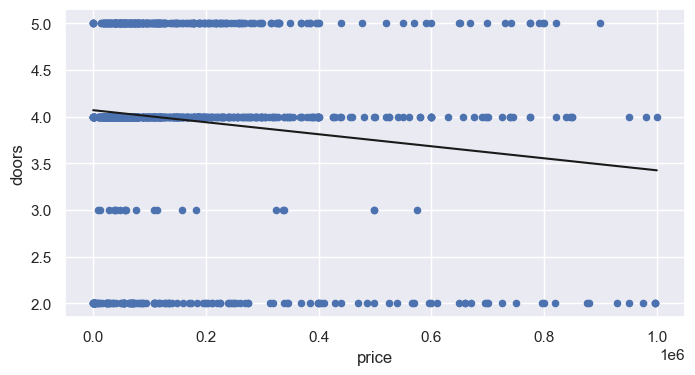

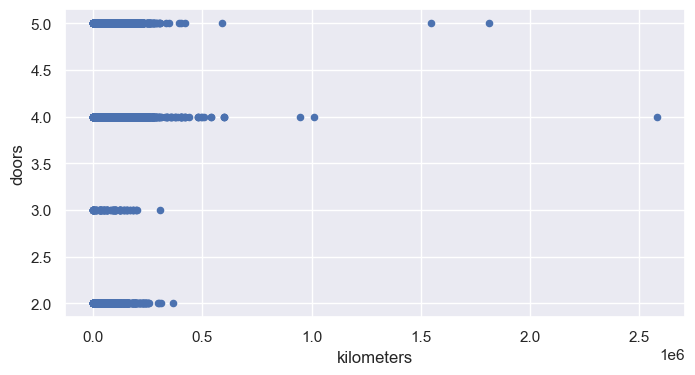

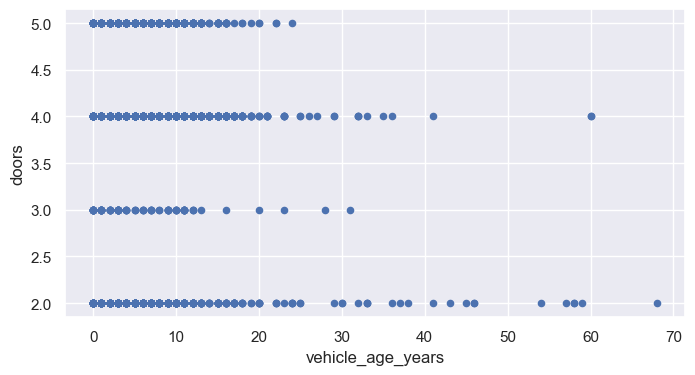

In [117]:
from ipywidgets import interactive
import ipywidgets as widgets


scatter_plot(data, "price", "doors", fit = True)
scatter_plot(data, "kilometers","doors", max_points = 5000, fit = False)
scatter_plot(data, "vehicle_age_years", "doors", max_points = 5000, fit = False)


In [118]:
# Create a test/train split
train,test = data.split_frame([.9])

In [119]:
#  Set response variable and your choice of predictor variables
myY = "doors"
myX = ["price","kilometers","vehicle_age_years"]

In [120]:
# Build simple GLM model
data_glm = H2OGeneralizedLinearEstimator(family="gaussian", standardize=True)
data_glm.train(x               =myX,
               y               =myY,
               training_frame  =train,
               validation_frame=test)

glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGeneralizedLinearEstimator : Generalized Linear Modeling
Model Key: GLM_model_python_1715184173323_5


GLM Model: summary
    family    link      regularization                                 number_of_predictors_total    number_of_active_predictors    number_of_iterations    training_frame
--  --------  --------  ---------------------------------------------  ----------------------------  -----------------------------  ----------------------  ----------------
    gaussian  identity  Elastic Net (alpha = 0.5, lambda = 2.606E-4 )  3                             3                              1                       py_23_sid_9ad9

ModelMetricsRegressionGLM: glm
** Reported on train data. **

MSE: 0.8406880073188979
RMSE: 0.9168904009307208
MAE: 0.6404441023279892
RMSLE: 0.2134830674870645
Mean Residual Deviance: 0.8406880073188979
R^2: 0.06745382792984655
Null degrees of freedom: 8974
Residual degrees of freedom: 8971
Null deviance: 8090.939721448488
Residual deviance: 7545.174865687109
AIC: 23922.473043168127

ModelMetricsRegressionGLM: glm
** Reported on validation data. **

MSE: 0.8389469132479863
RMSE: 0.9159404528941749
MAE: 0.6357925925827018
RMSLE: 0.21327658353338622
Mean Residual Deviance: 0.8389469132479863
R^2: 0.045287947028107456
Null degrees of freedom: 977
Residual degrees of freedom: 974
Null deviance: 859.554646509571
Residual deviance: 820.4900811565307
AIC: 2613.699295255089

Scoring History: 
    timestamp            duration    iterations    negative_log_likelihood    objective           training_rmse       training_deviance    training_mae        training_r2          validation_rmse     validation_deviance    validation_mae      validation_r2
--  -------------------  ----------  ------------  -------------------------  ------------------  ------------------  -------------------  ------------------  -------------------  ------------------  ---------------------  ------------------  --------------------
    2024-05-08 13:15:50  0.000 sec   0             8090.939721448488          0.9014974619998315
    2024-05-08 13:15:50  1.803 sec   1                                                            0.9168904009307208  0.8406880073188979   0.6404441023279892  0.06745382792984655  0.9159404528941749  0.8389469132479863     0.6357925925827018  0.045287947028107456

Variable Importances: 
variable           relative_importance    scaled_importance    percentage
-----------------  ---------------------  -------------------  ------------
vehicle_age_years  0.225714               1                    0.423784
kilometers         0.178078               0.788956             0.334347
price              0.128823               0.570736             0.241869

[tips]
Use `model.explain()` to inspect the model.
--
Use `h2o.display.toggle_user_tips()` to switch on/off this section.

In [121]:
 #Build simple GBM model

data_gbm = H2OGradientBoostingEstimator(balance_classes=True,
                                        ntrees         =10,
                                        max_depth      =1,
                                        learn_rate     =0.1,
                                        min_rows       =2)

data_gbm.train(x               =myX,
               y               =myY,
               training_frame  =train,
               validation_frame=test)

gbm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: GBM_model_python_1715184173323_6


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    10                 10                          829                    1            1            1             2             2             2

ModelMetricsRegression: gbm
** Reported on train data. **

MSE: 0.8540908075872063
RMSE: 0.9241703347258049
MAE: 0.608699946708998
RMSLE: 0.21608137527457932
Mean Residual Deviance: 0.8540908075872063

ModelMetricsRegression: gbm
** Reported on validation data. **

MSE: 0.8350423315216108
RMSE: 0.9138065066093647
MAE: 0.5976563193985078
RMSLE: 0.21303412277568815
Mean Residual Deviance: 0.8350423315216108

Scoring History: 
    timestamp            duration    number_of_trees    training_rmse    training_mae    training_deviance    validation_rmse    validation_mae    validation_deviance
--  -------------------  ----------  -----------------  ---------------  --------------  -------------------  -----------------  ----------------  ---------------------
    2024-05-08 13:16:08  0.008 sec   0                  0.949472         0.626073        0.901497             0.937491           0.615665          0.87889
    2024-05-08 13:16:08  0.469 sec   1                  0.944991         0.622306        0.893008             0.932419           0.611363          0.869406
    2024-05-08 13:16:09  0.502 sec   2                  0.941346         0.618917        0.886131             0.928221           0.607491          0.861594
    2024-05-08 13:16:09  0.530 sec   3                  0.938382         0.615866        0.880561             0.924743           0.604006          0.85515
    2024-05-08 13:16:09  0.555 sec   4                  0.935808         0.613912        0.875736             0.923593           0.60254           0.853024
    2024-05-08 13:16:09  0.583 sec   5                  0.933349         0.611141        0.87114              0.920662           0.599375          0.847619
    2024-05-08 13:16:09  0.613 sec   6                  0.931212         0.609365        0.867155             0.9198             0.598043          0.846033
    2024-05-08 13:16:09  0.641 sec   7                  0.929174         0.606848        0.863364             0.917329           0.595168          0.841492
    2024-05-08 13:16:09  0.669 sec   8                  0.927382         0.605253        0.860037             0.916476           0.594046          0.839928
    2024-05-08 13:16:09  0.698 sec   9                  0.925695         0.605697        0.856912             0.914297           0.594206          0.835939
    2024-05-08 13:16:09  0.726 sec   10                 0.92417          0.6087          0.854091             0.913807           0.597656          0.835042

Variable Importances: 
variable           relative_importance    scaled_importance    percentage
-----------------  ---------------------  -------------------  ------------
price              2239.34                1                    1
kilometers         0                      0                    0
vehicle_age_years  0                      0                    0

[tips]
Use `model.explain()` to inspect the model.
--
Use `h2o.display.toggle_user_tips()` to switch on/off this section.

In [122]:
# Variable importances from each algorithm
# Calculate magnitude of normalized GLM coefficients
from six import iteritems
glm_varimp = data_glm.coef_norm()
for k,v in iteritems(glm_varimp):
    glm_varimp[k] = abs(glm_varimp[k])
    
# Sort in descending order by magnitude
glm_sorted = sorted(glm_varimp.items(), key = operator.itemgetter(1), reverse = True)
table = tabulate(glm_sorted, headers = ["Predictor", "Normalized Coefficient"], tablefmt = "orgtbl")
print("Variable Importances:\n\n" + table)

data_glm.varimp()
data_gbm.varimp()

Variable Importances:

| Predictor         |   Normalized Coefficient |
|-------------------+--------------------------|
| Intercept         |                 3.96334  |
| vehicle_age_years |                 0.225714 |
| kilometers        |                 0.178078 |
| price             |                 0.128823 |


[('price', 2239.34130859375, 1.0, 1.0),
 ('kilometers', 0.0, 0.0, 0.0),
 ('vehicle_age_years', 0.0, 0.0, 0.0)]

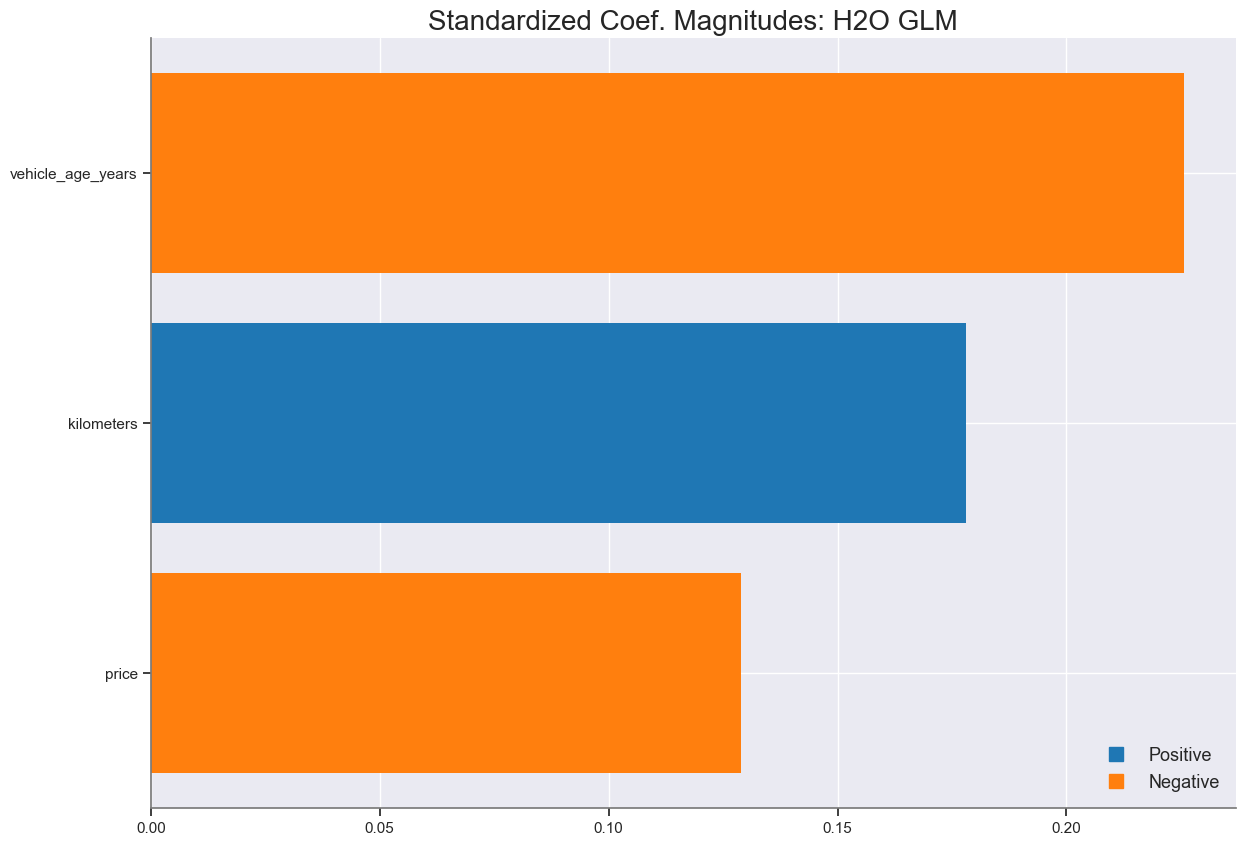

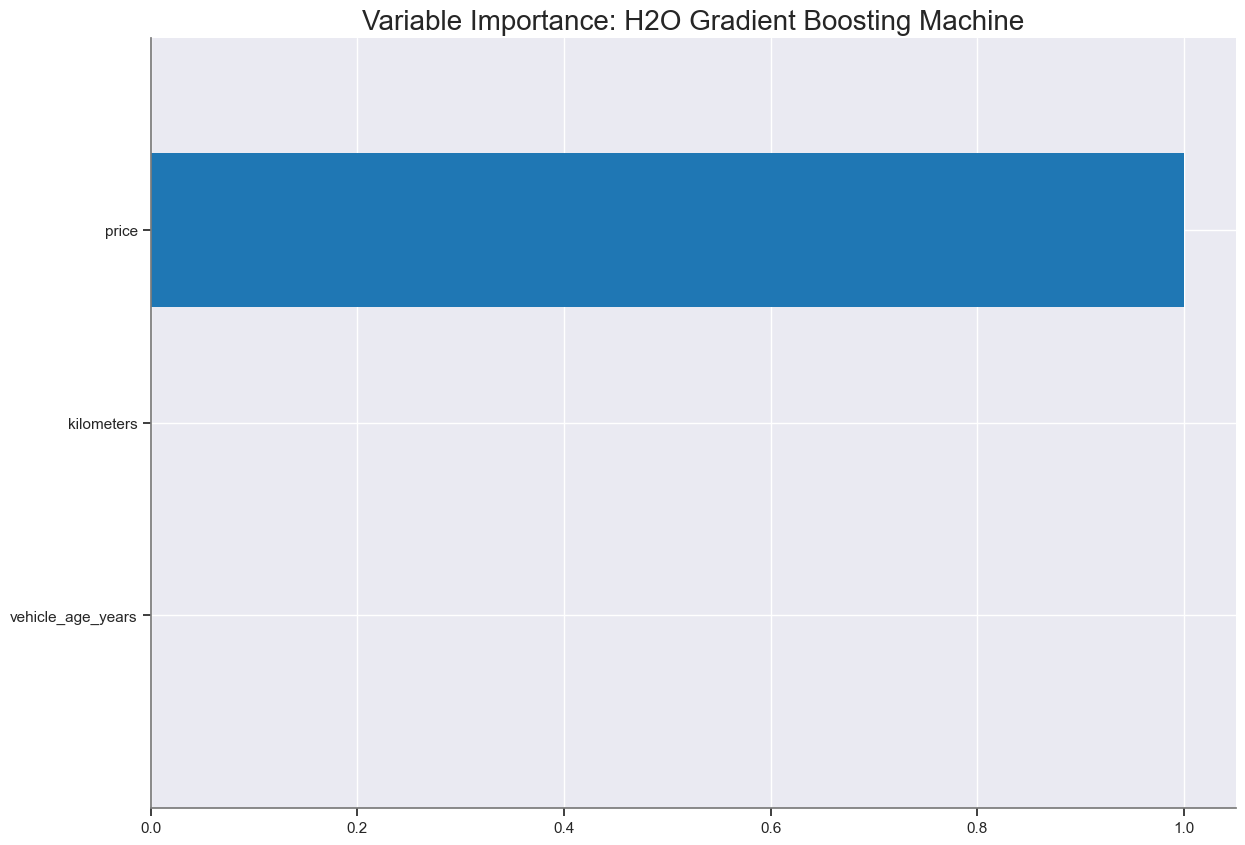

<Figure size 800x400 with 0 Axes>

In [123]:
data_glm.std_coef_plot()
data_gbm.varimp_plot()

In [124]:
# Model performance of GBM model on test data
data_gbm.model_performance(test)

ModelMetricsRegression: gbm
** Reported on test data. **

MSE: 0.8350423315216108
RMSE: 0.9138065066093647
MAE: 0.5976563193985078
RMSLE: 0.21303412277568815
Mean Residual Deviance: 0.8350423315216108

In [126]:
data=data[["doors","price","kilometers"]]

In [127]:
#  Set response variable and your choice of predictor variables
myY = "doors"
myX = ["price","kilometers","vehicle_age_years"]

# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

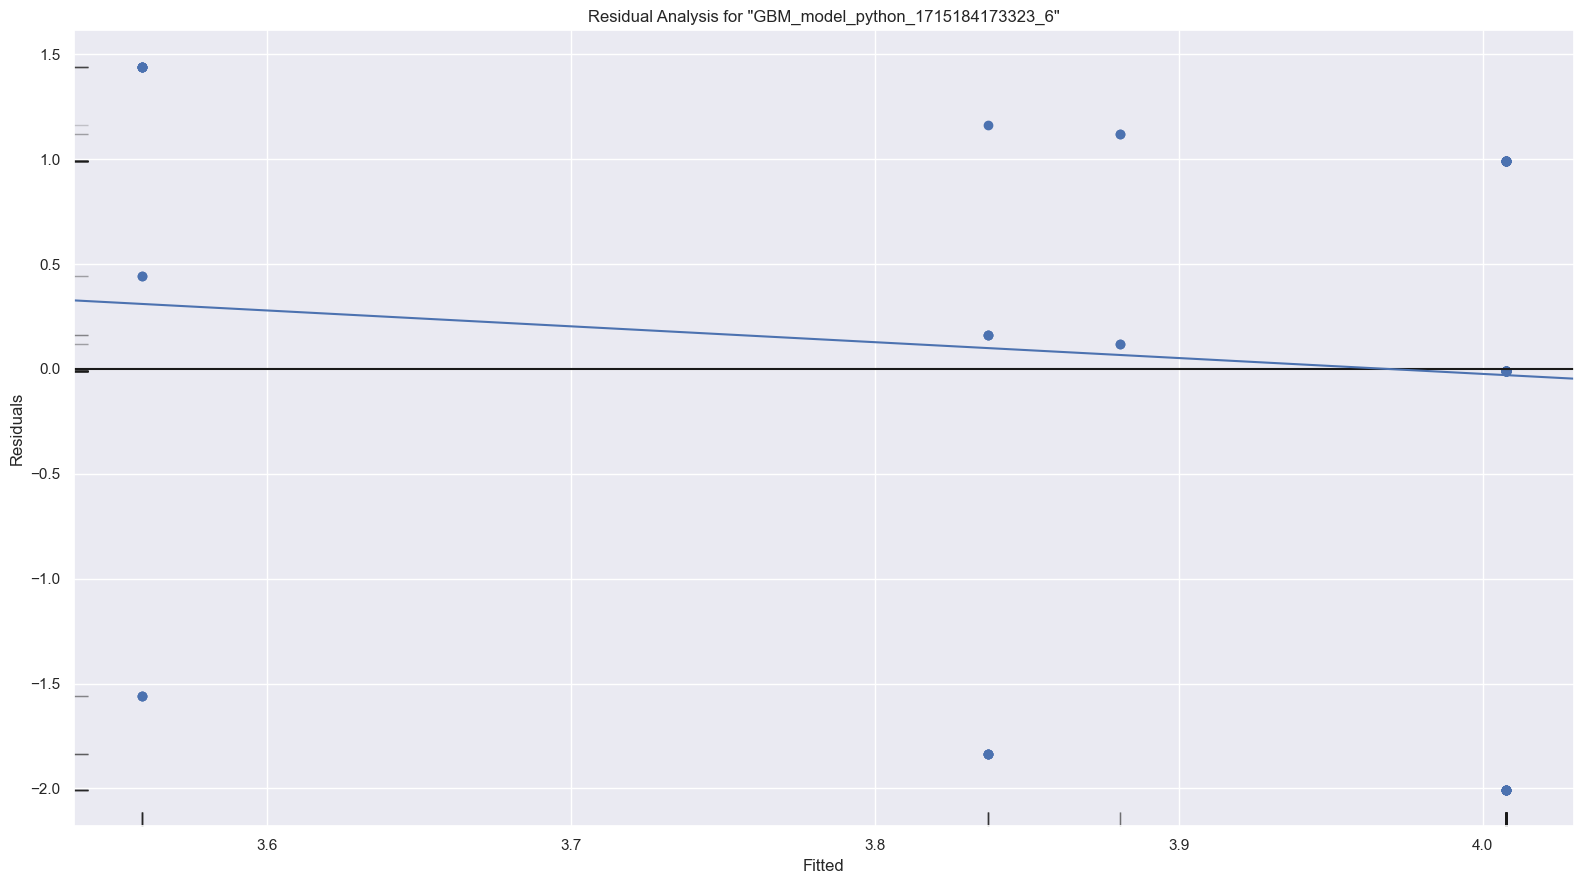

# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

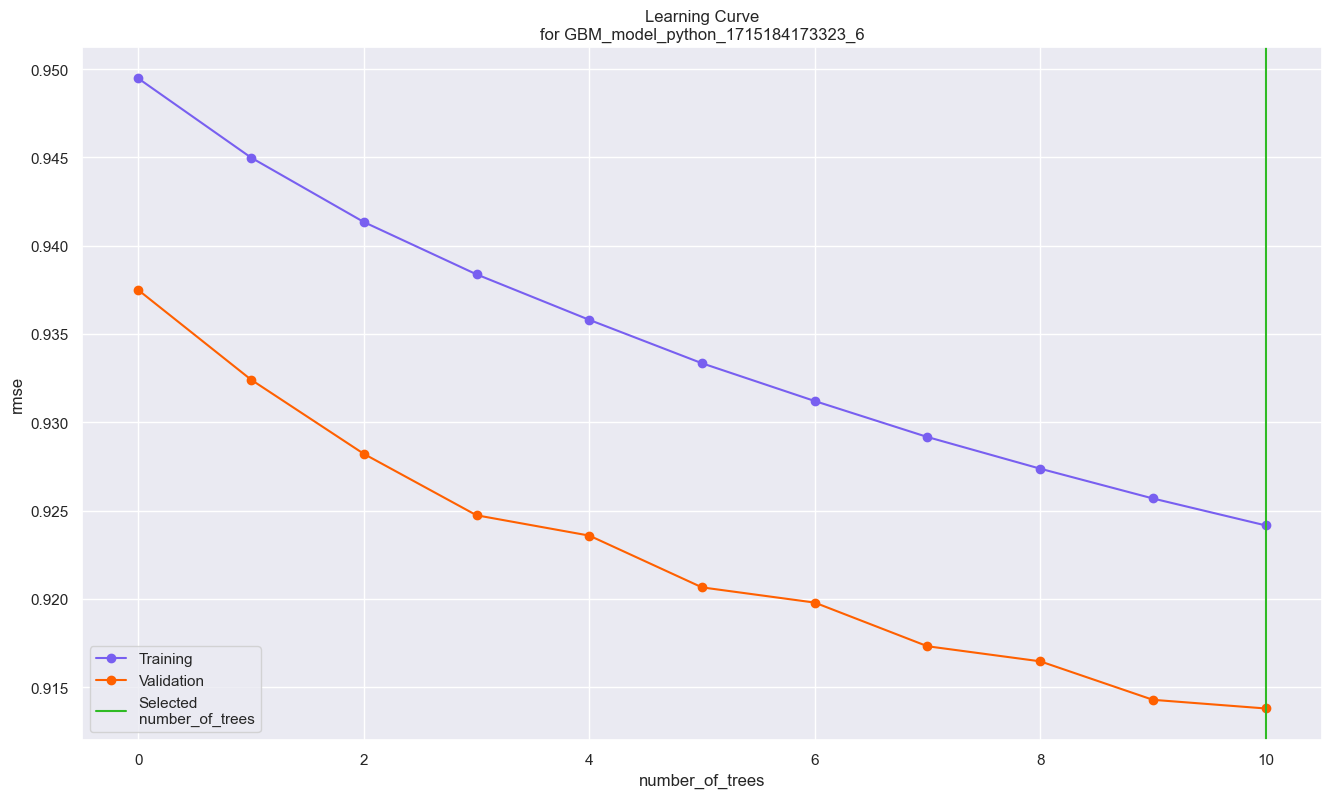

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

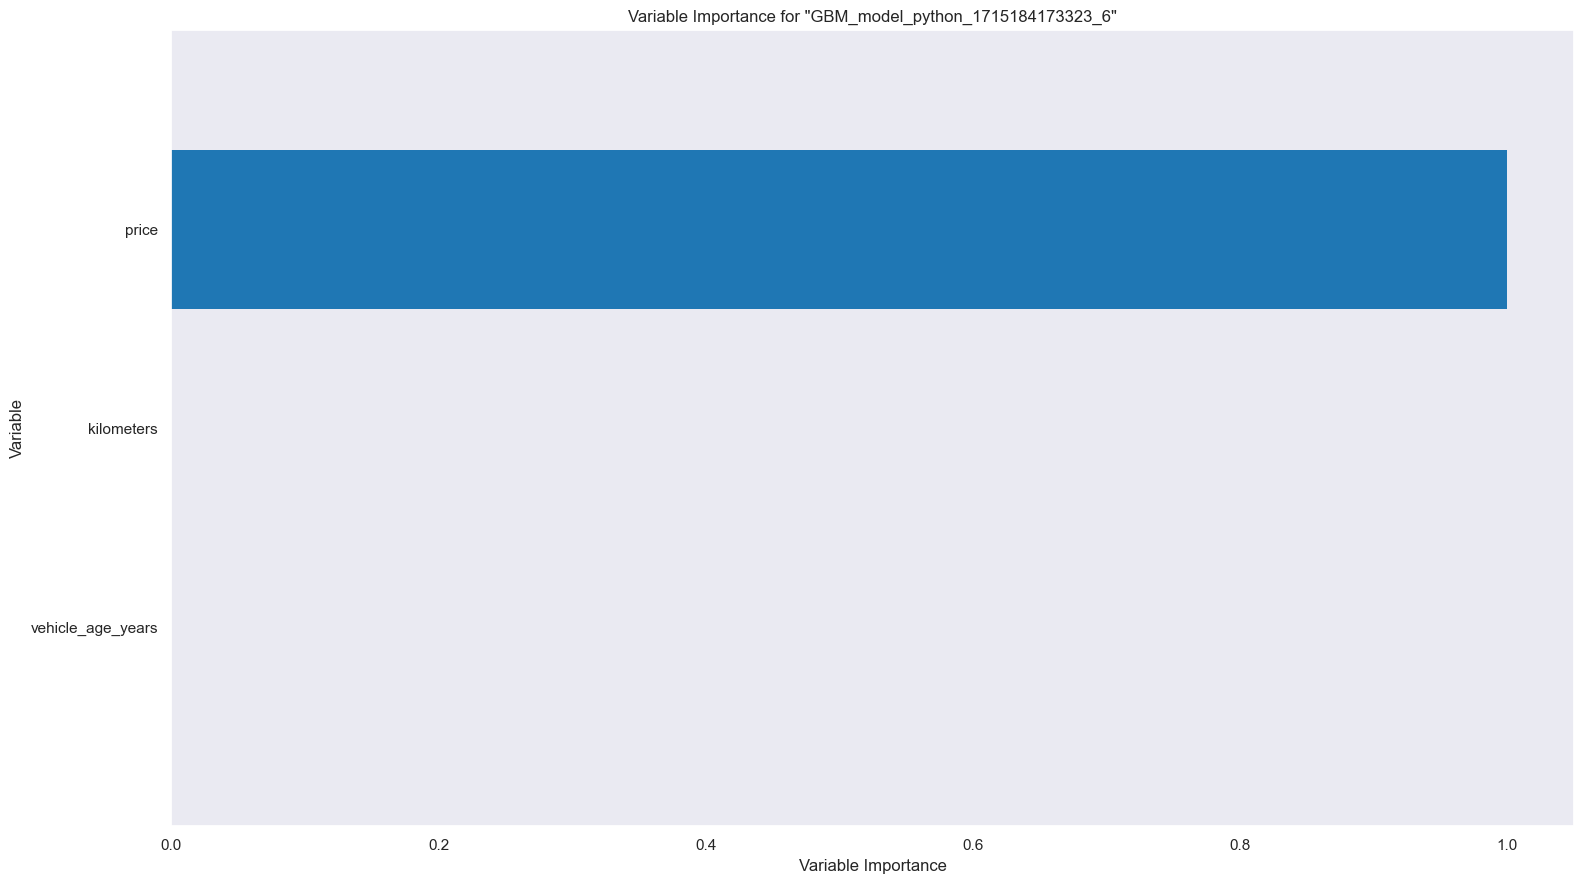

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

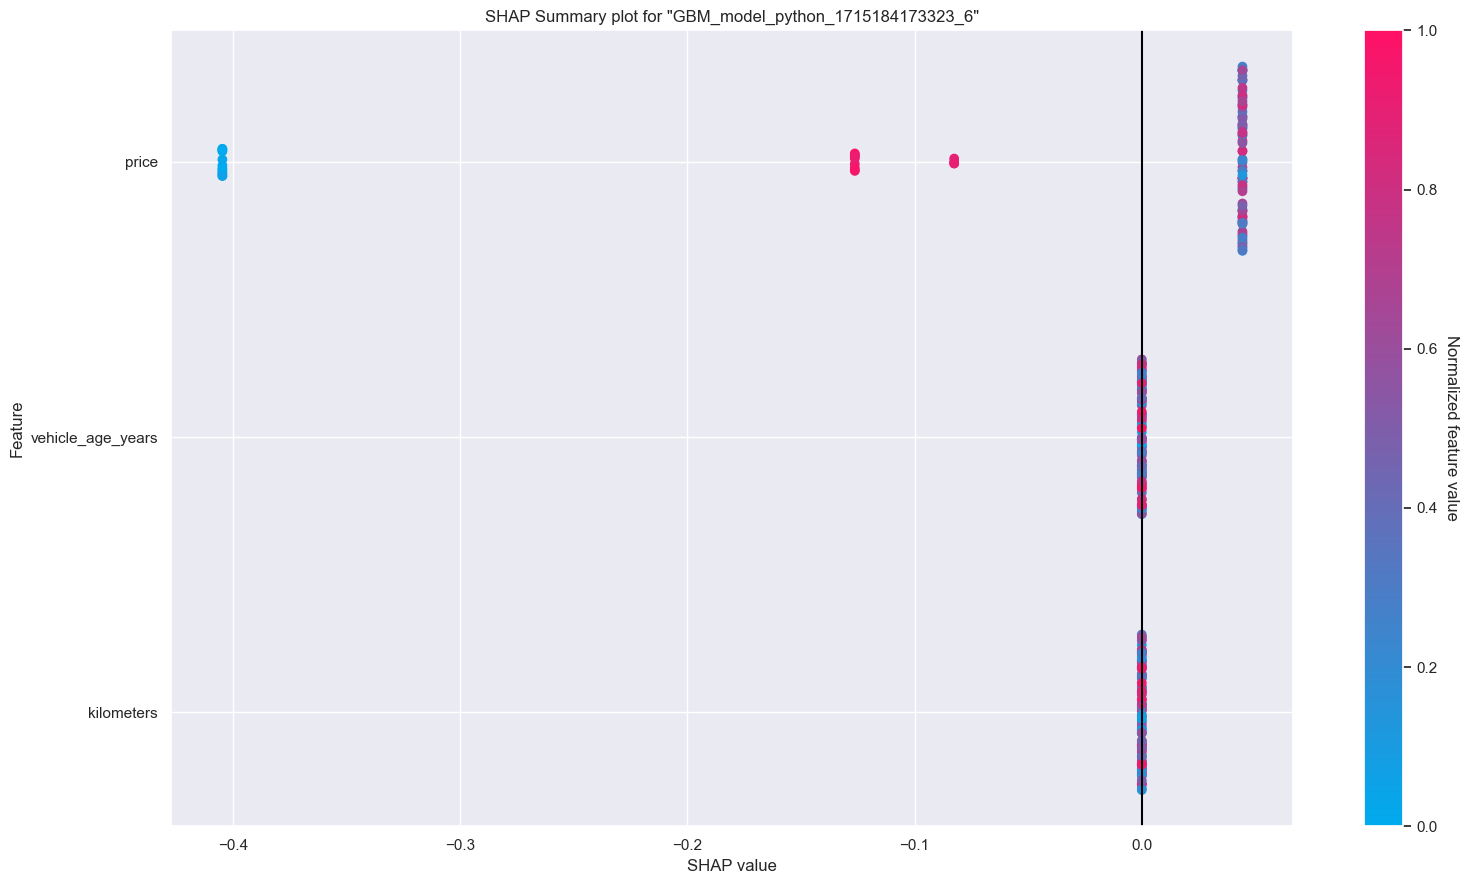

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

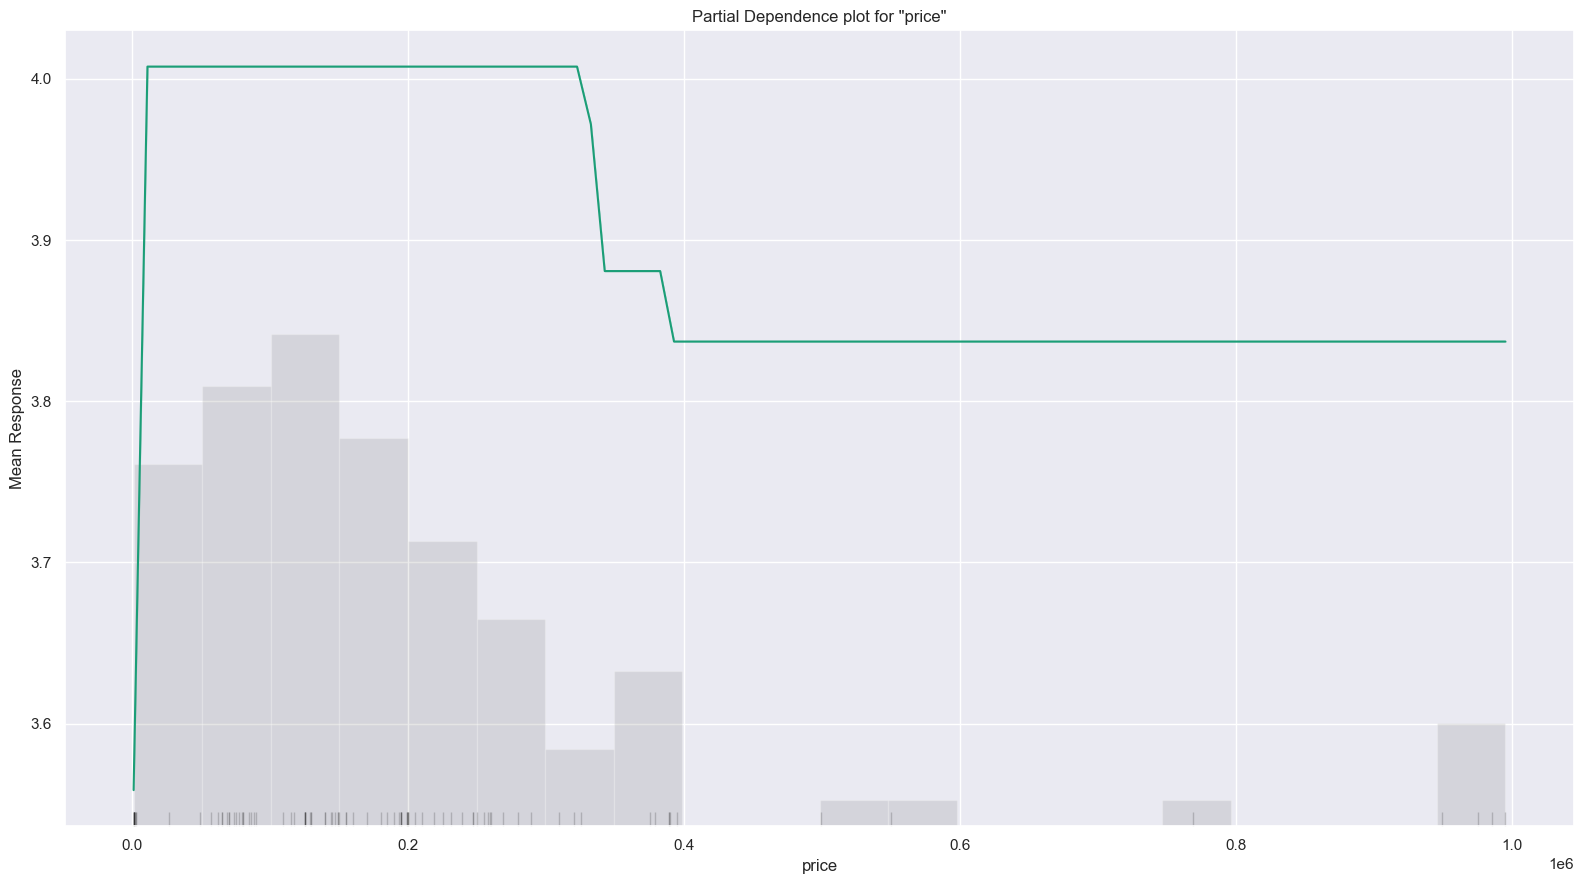

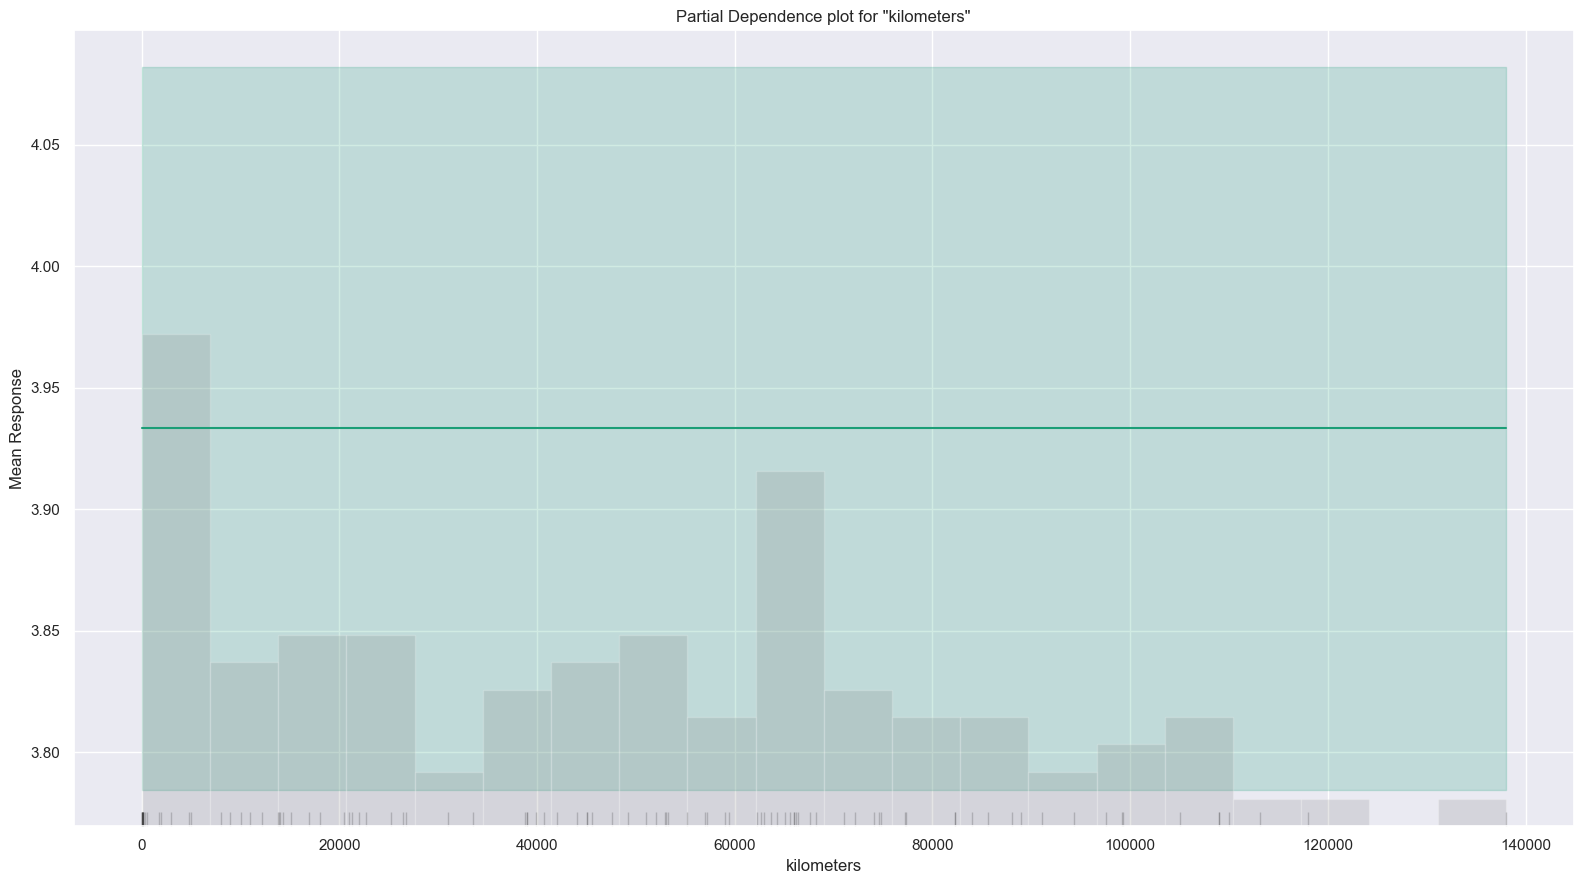

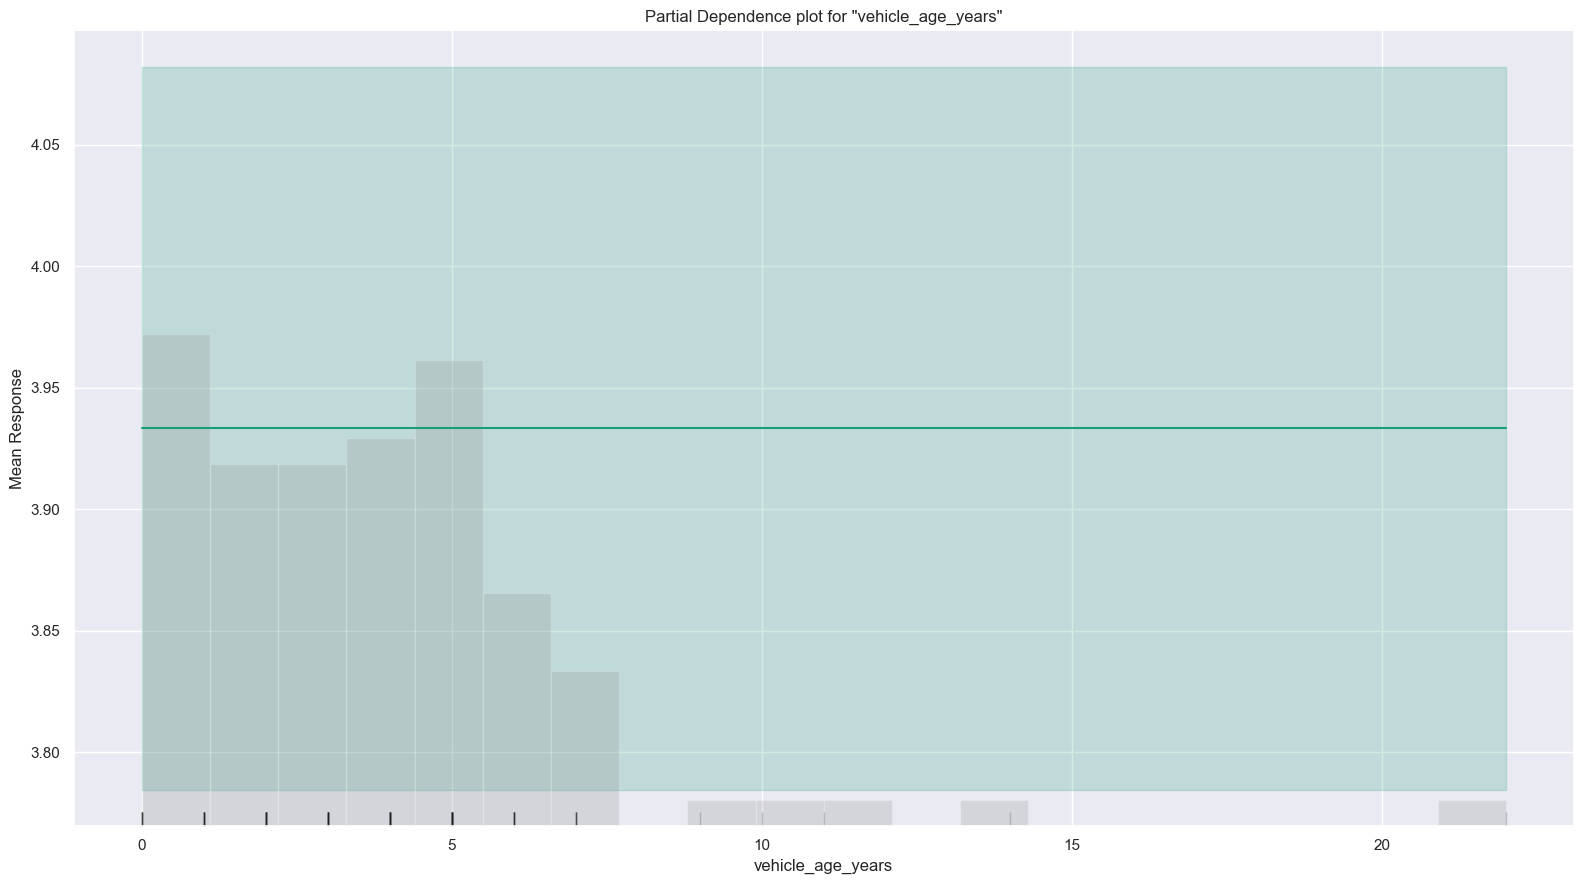

# Individual Conditional Expectation

> An Individual Conditional Expectation (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response. ICE plots are similar to partial dependence plots (PDP); PDP shows the average effect of a feature while ICE plot shows the effect for a single instance. This function will plot the effect for each decile. In contrast to the PDP, ICE plots can provide more insight, especially when there is stronger feature interaction.

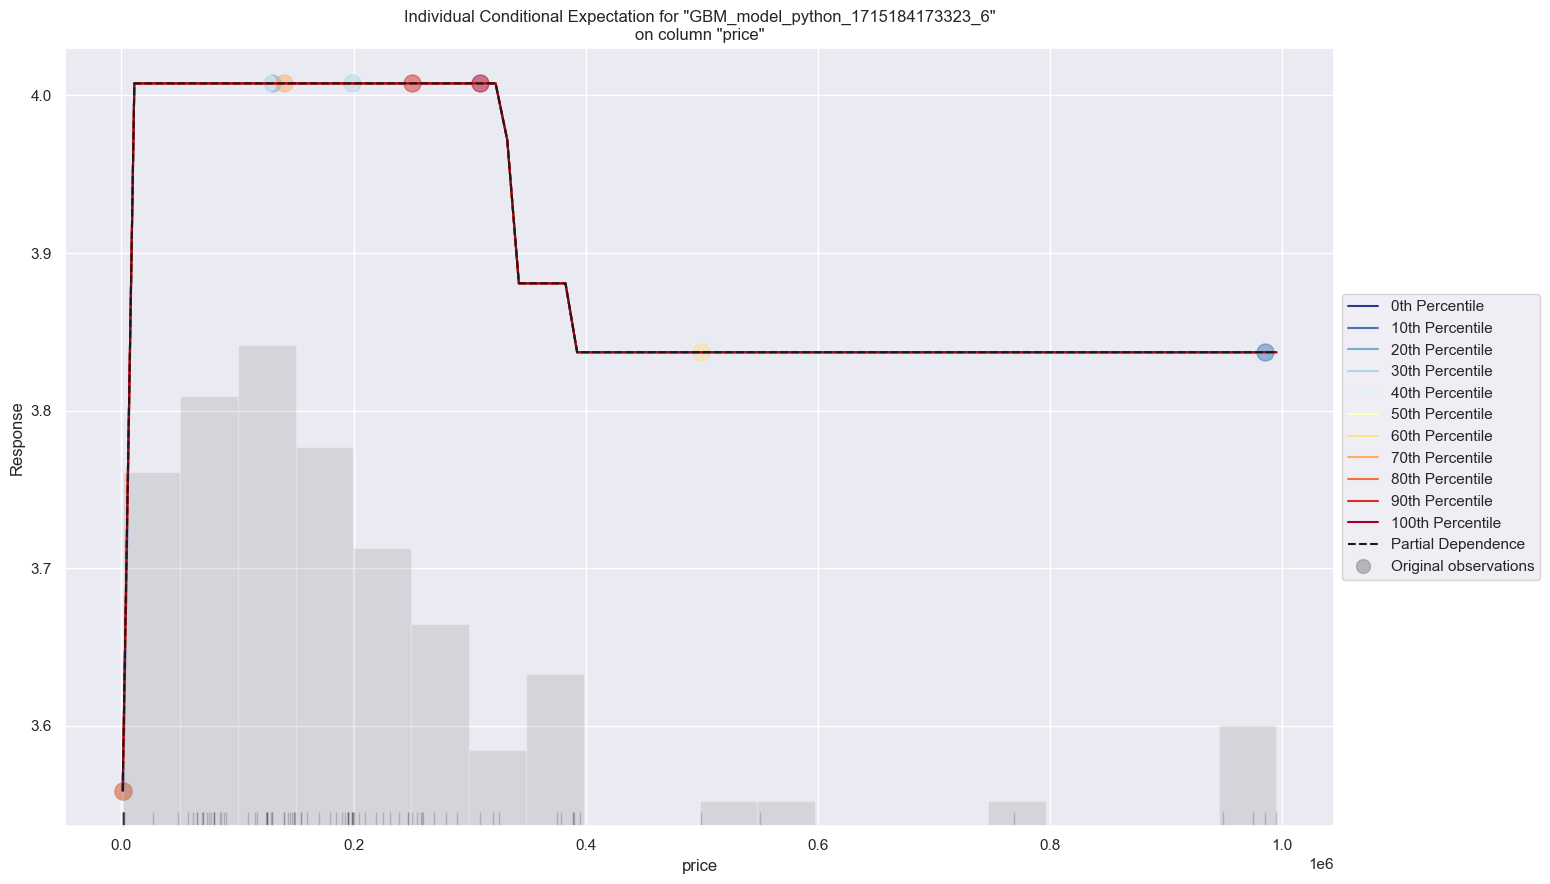

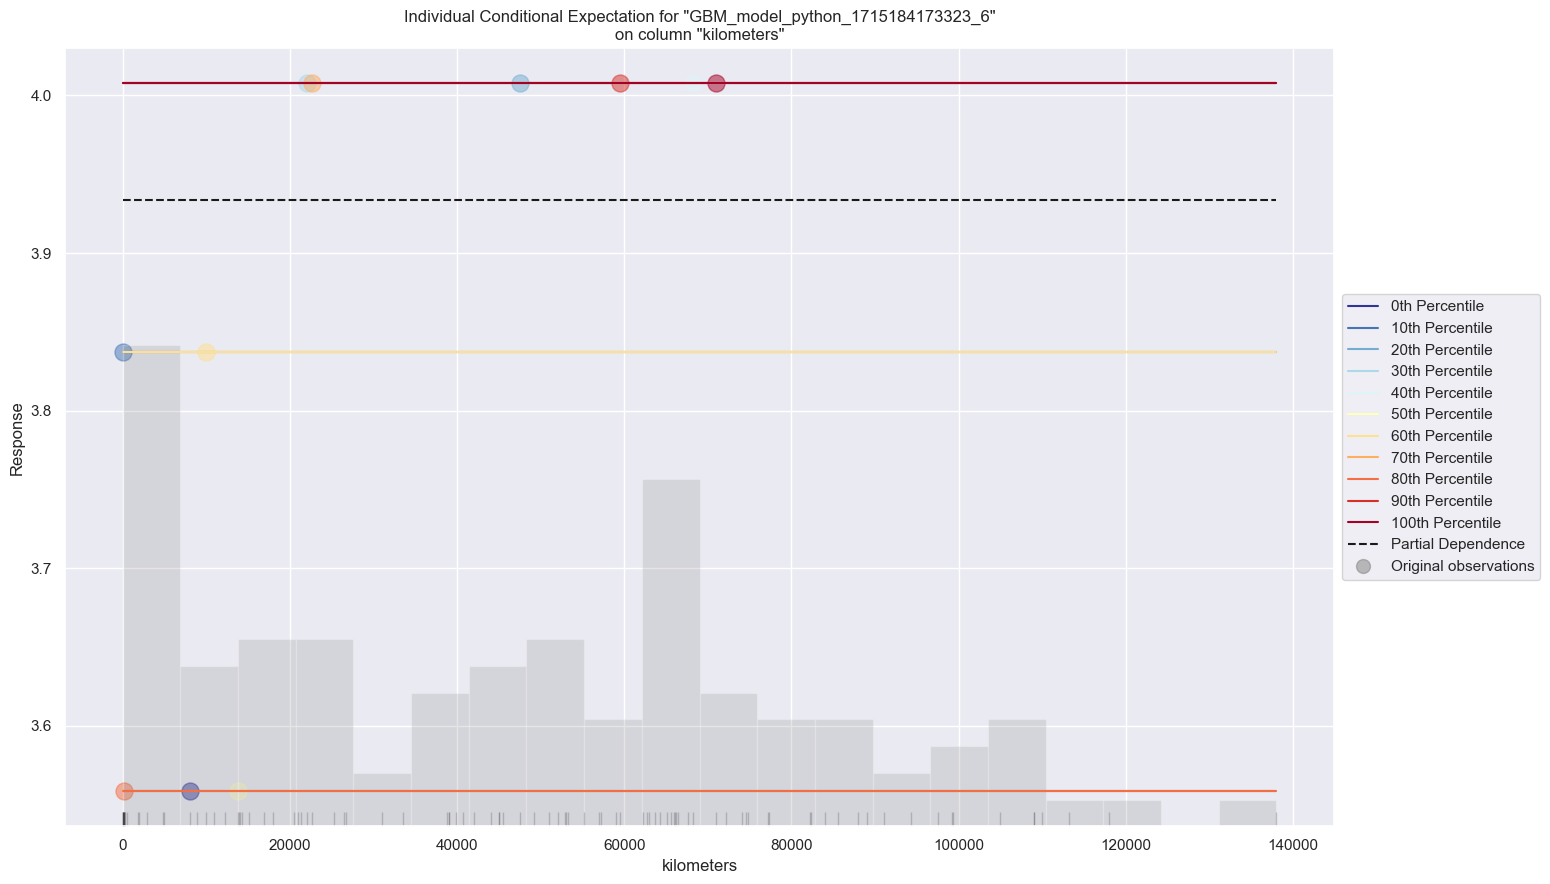

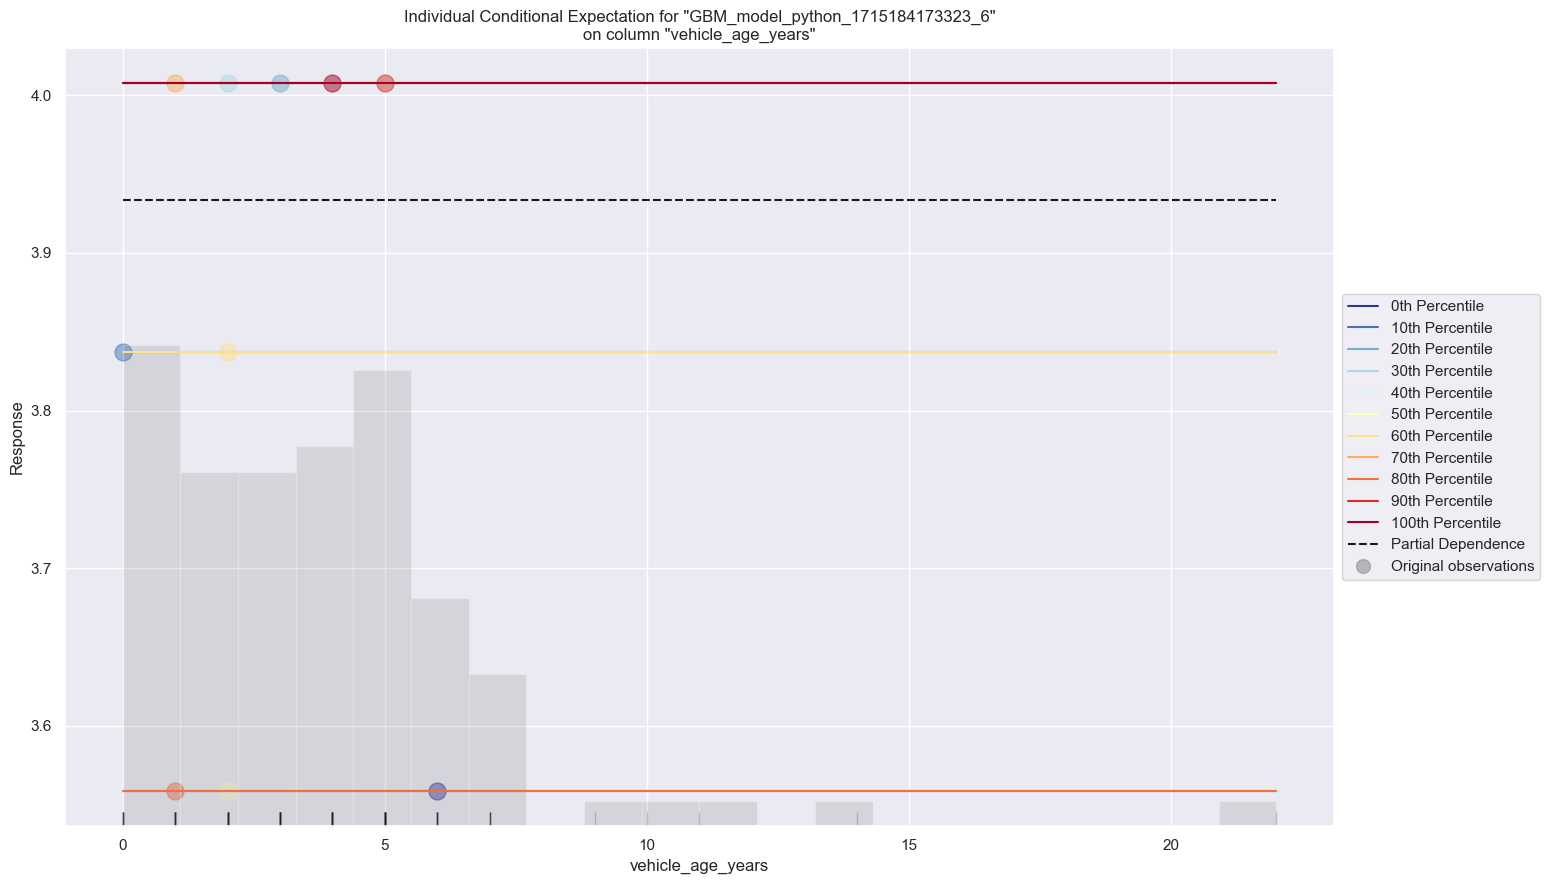

# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

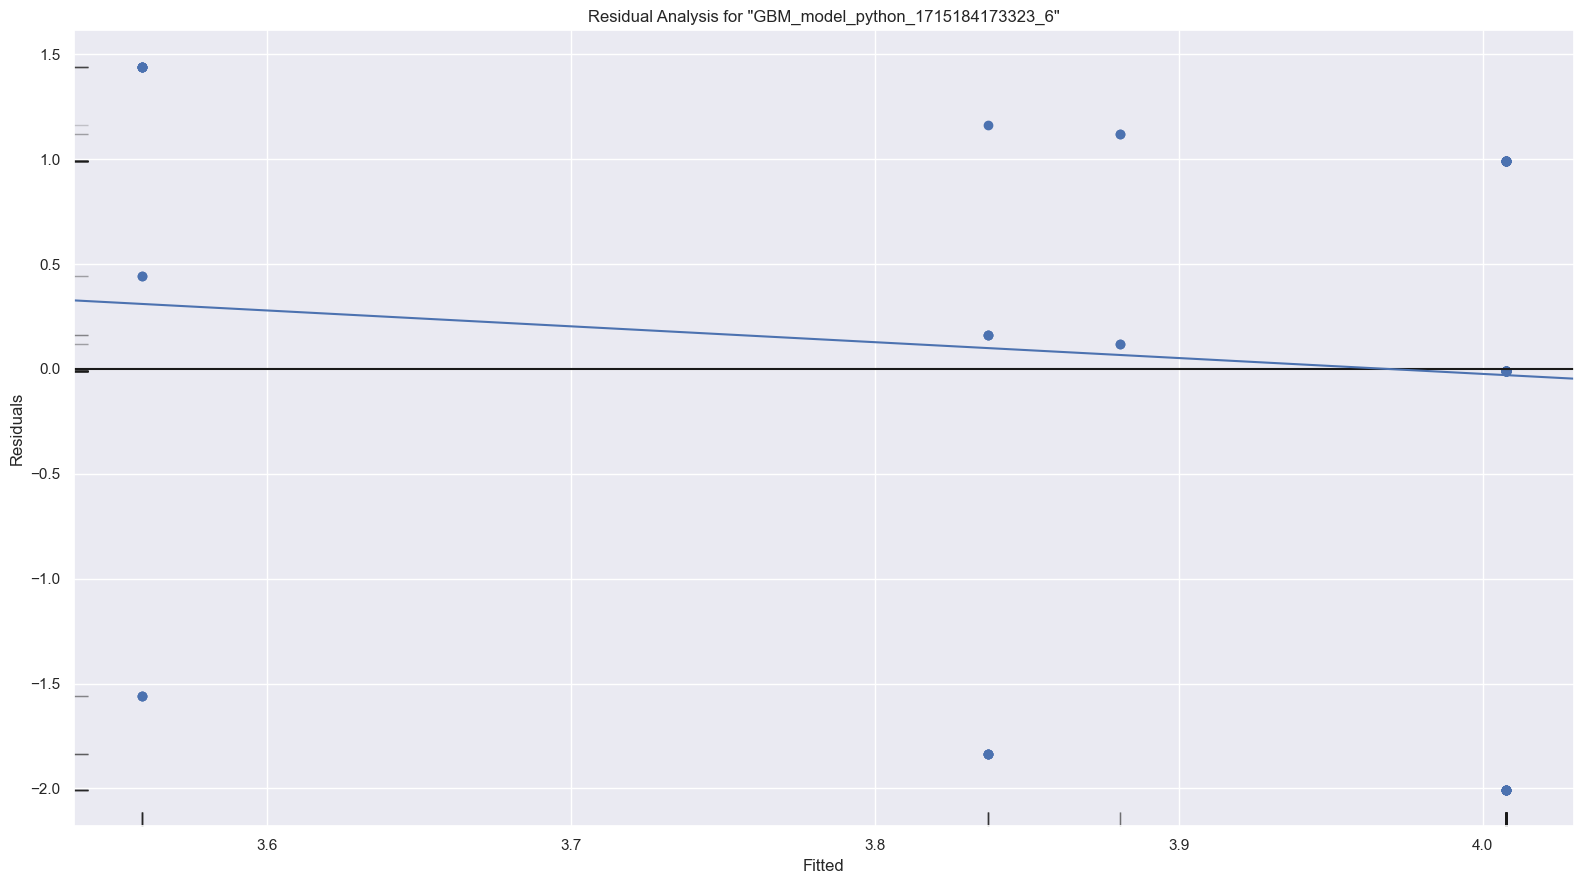

# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

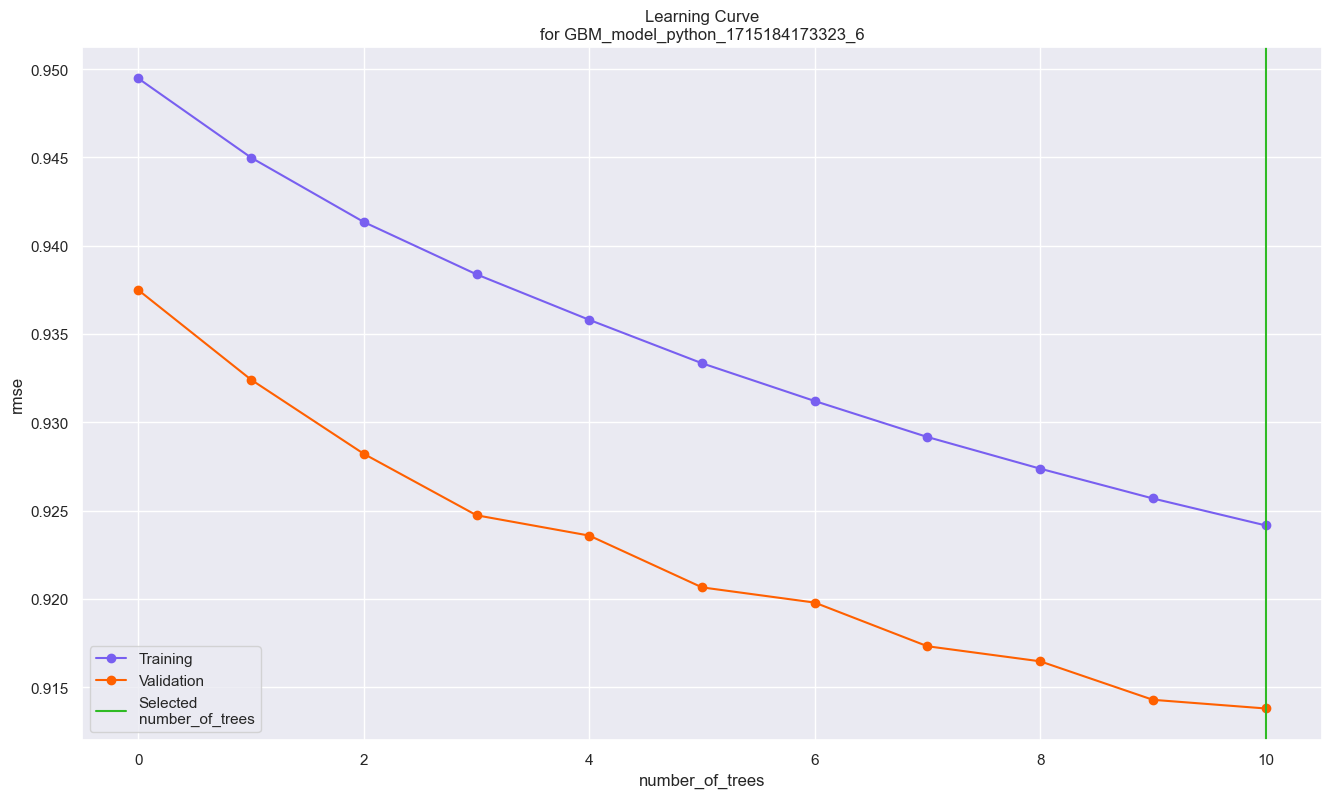

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

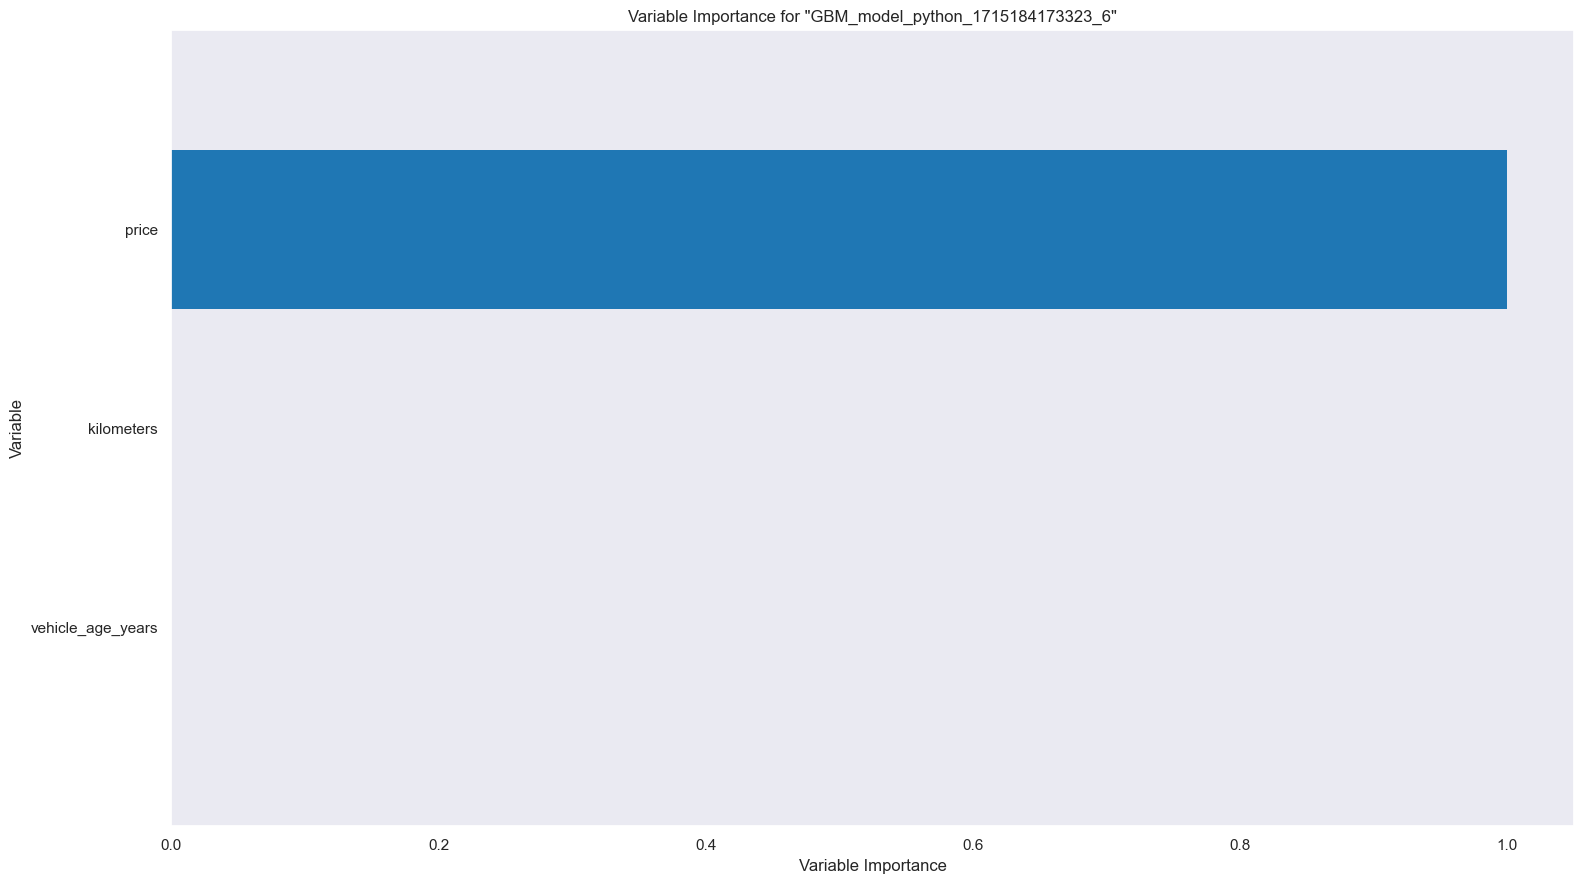

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

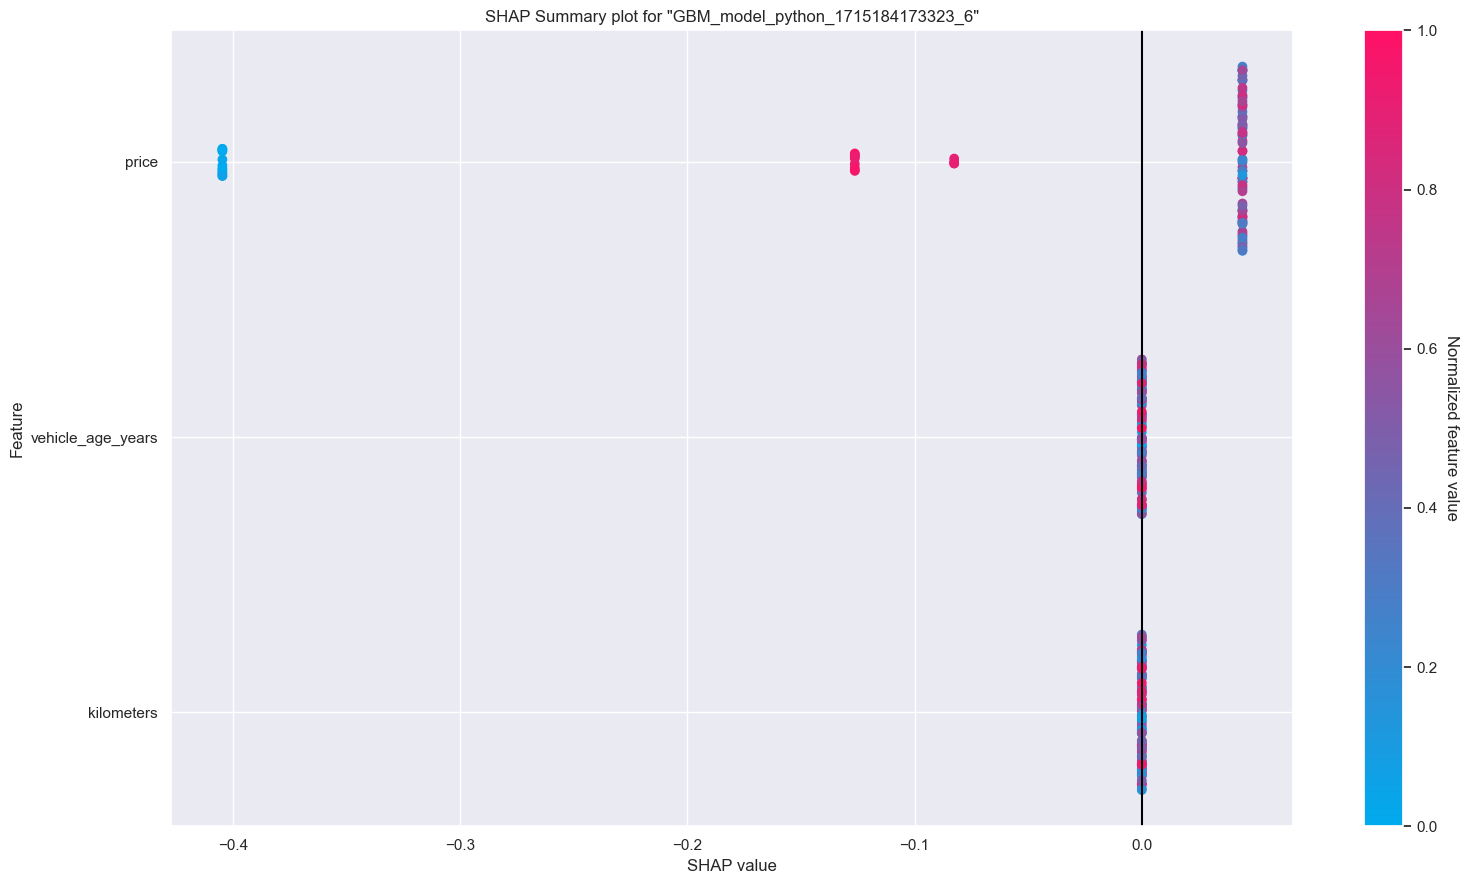

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

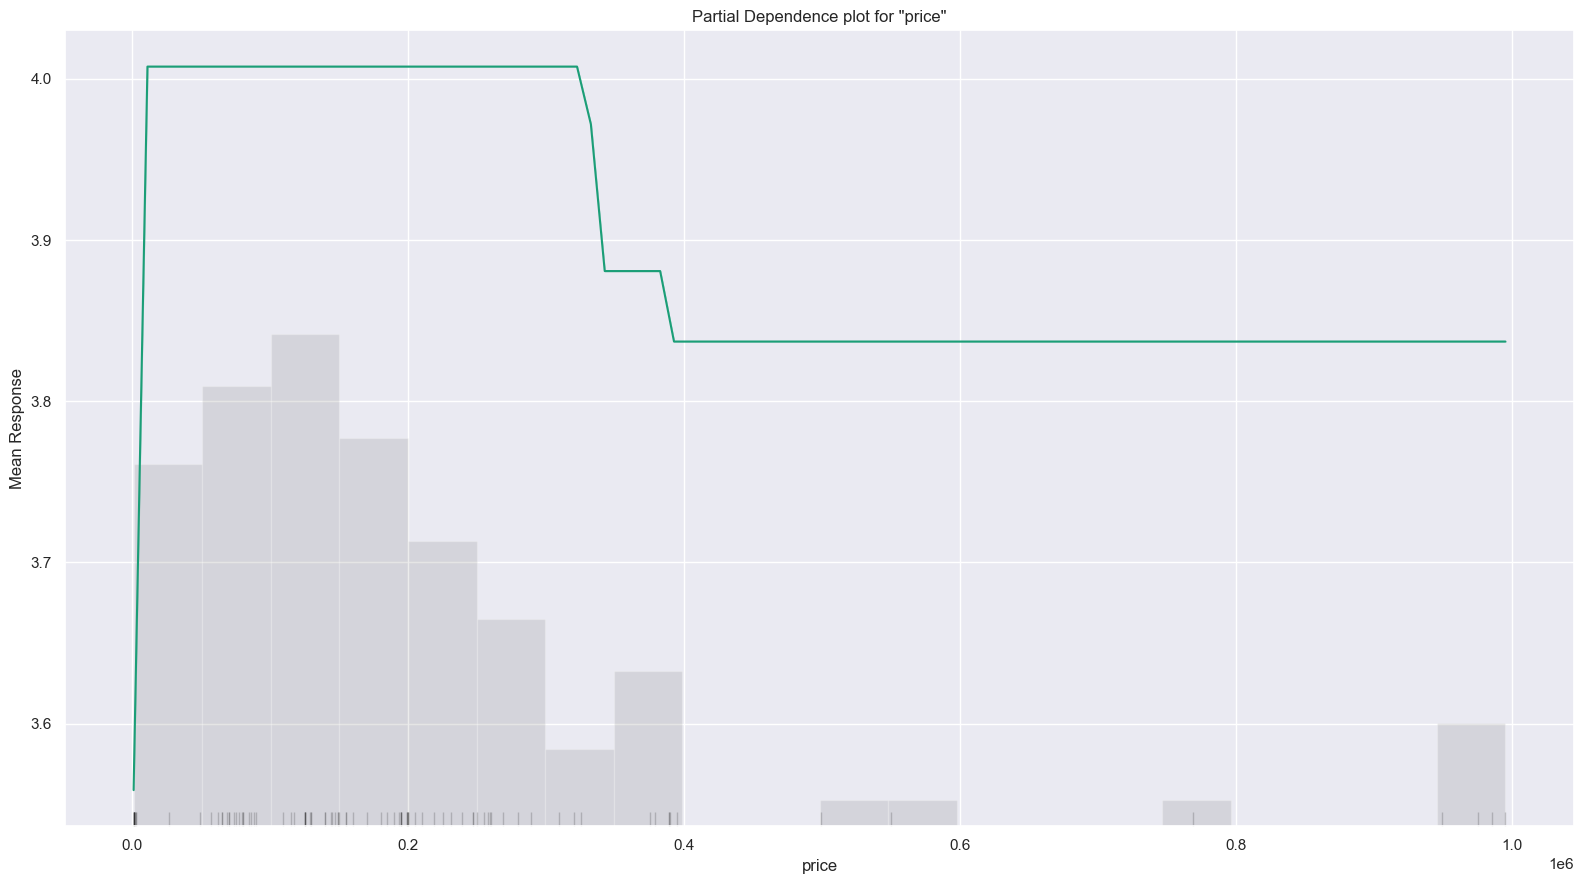

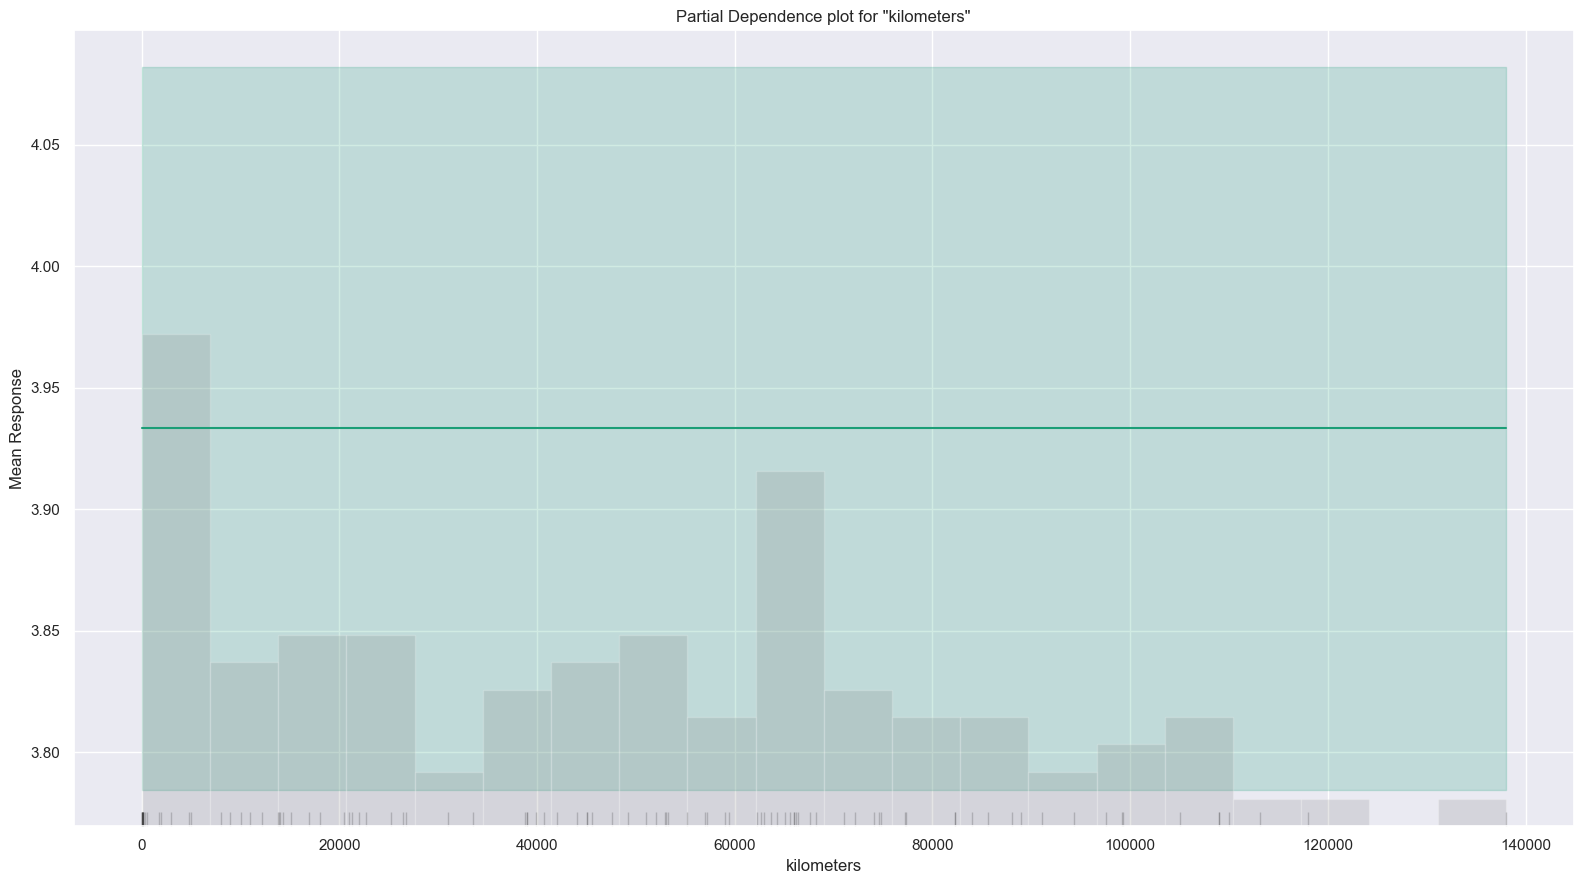

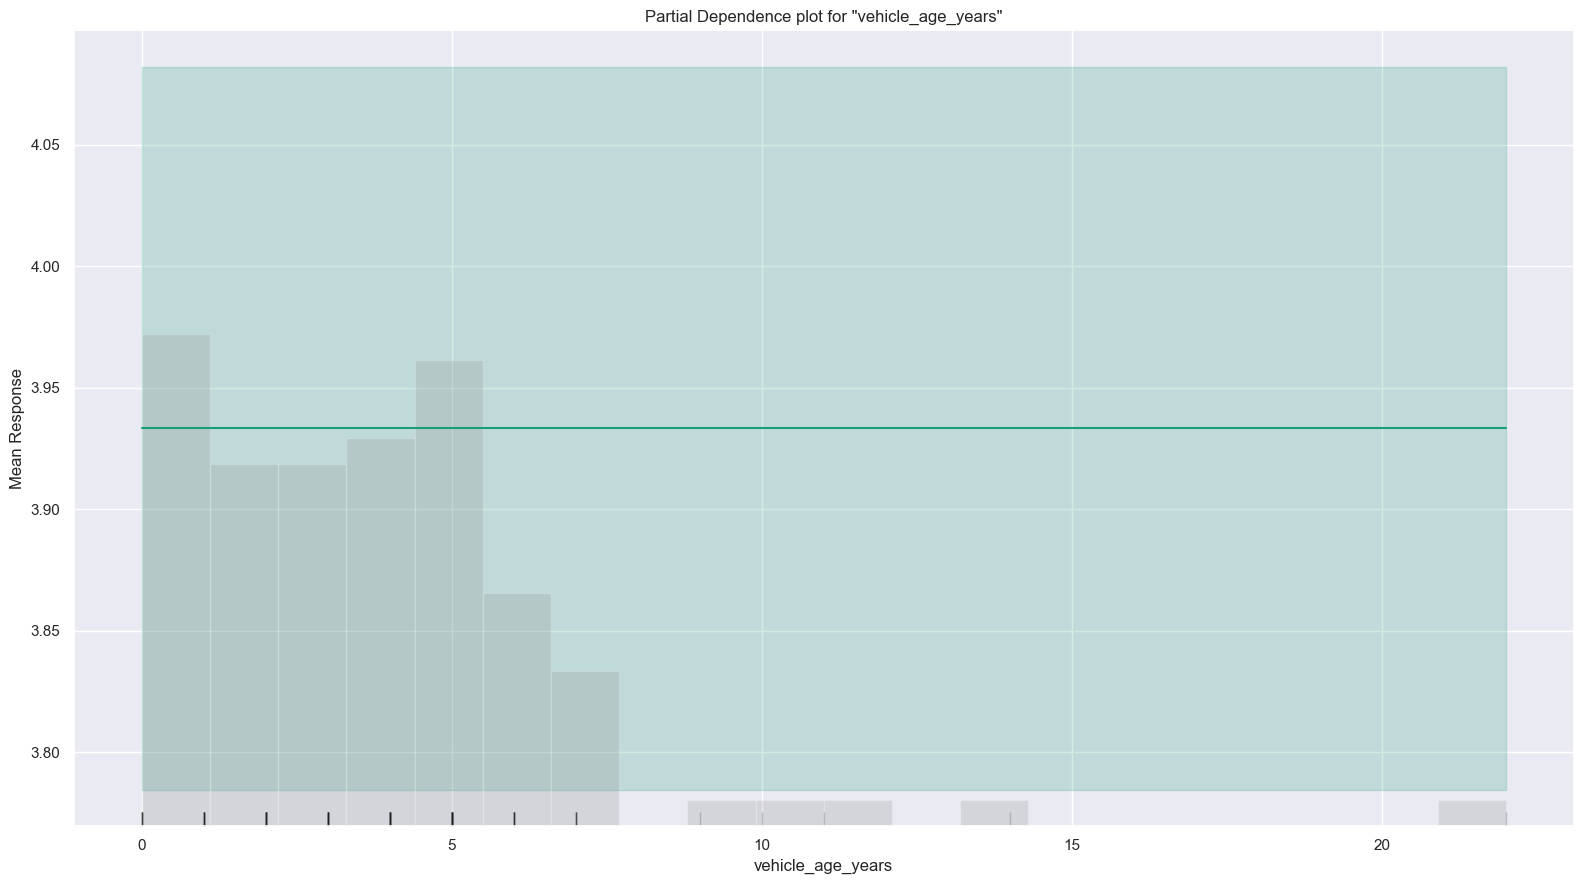

# Individual Conditional Expectation

> An Individual Conditional Expectation (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response. ICE plots are similar to partial dependence plots (PDP); PDP shows the average effect of a feature while ICE plot shows the effect for a single instance. This function will plot the effect for each decile. In contrast to the PDP, ICE plots can provide more insight, especially when there is stronger feature interaction.

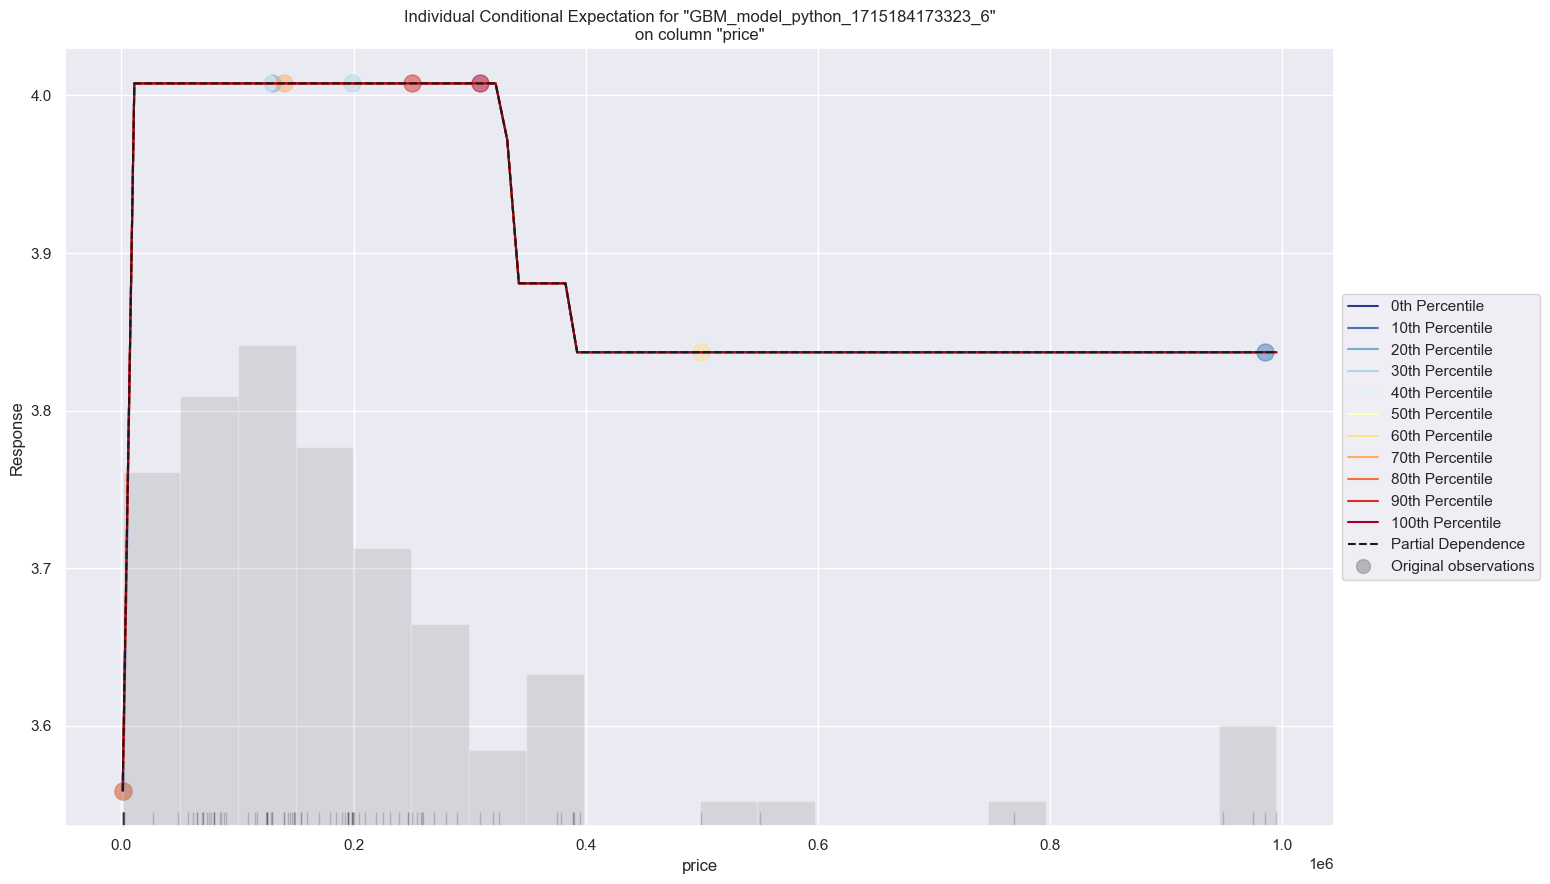

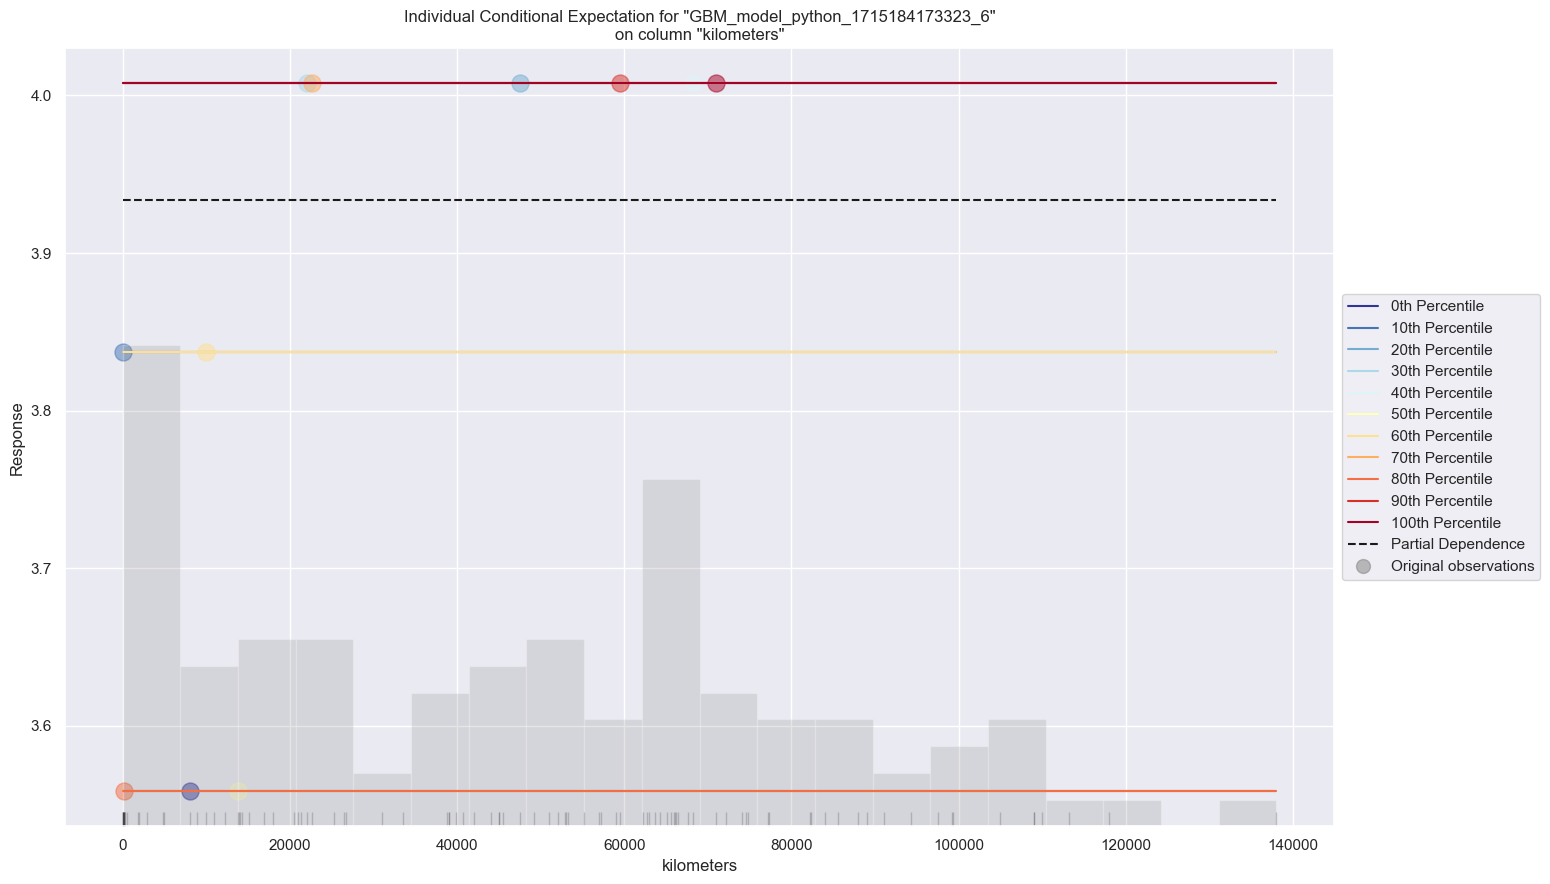

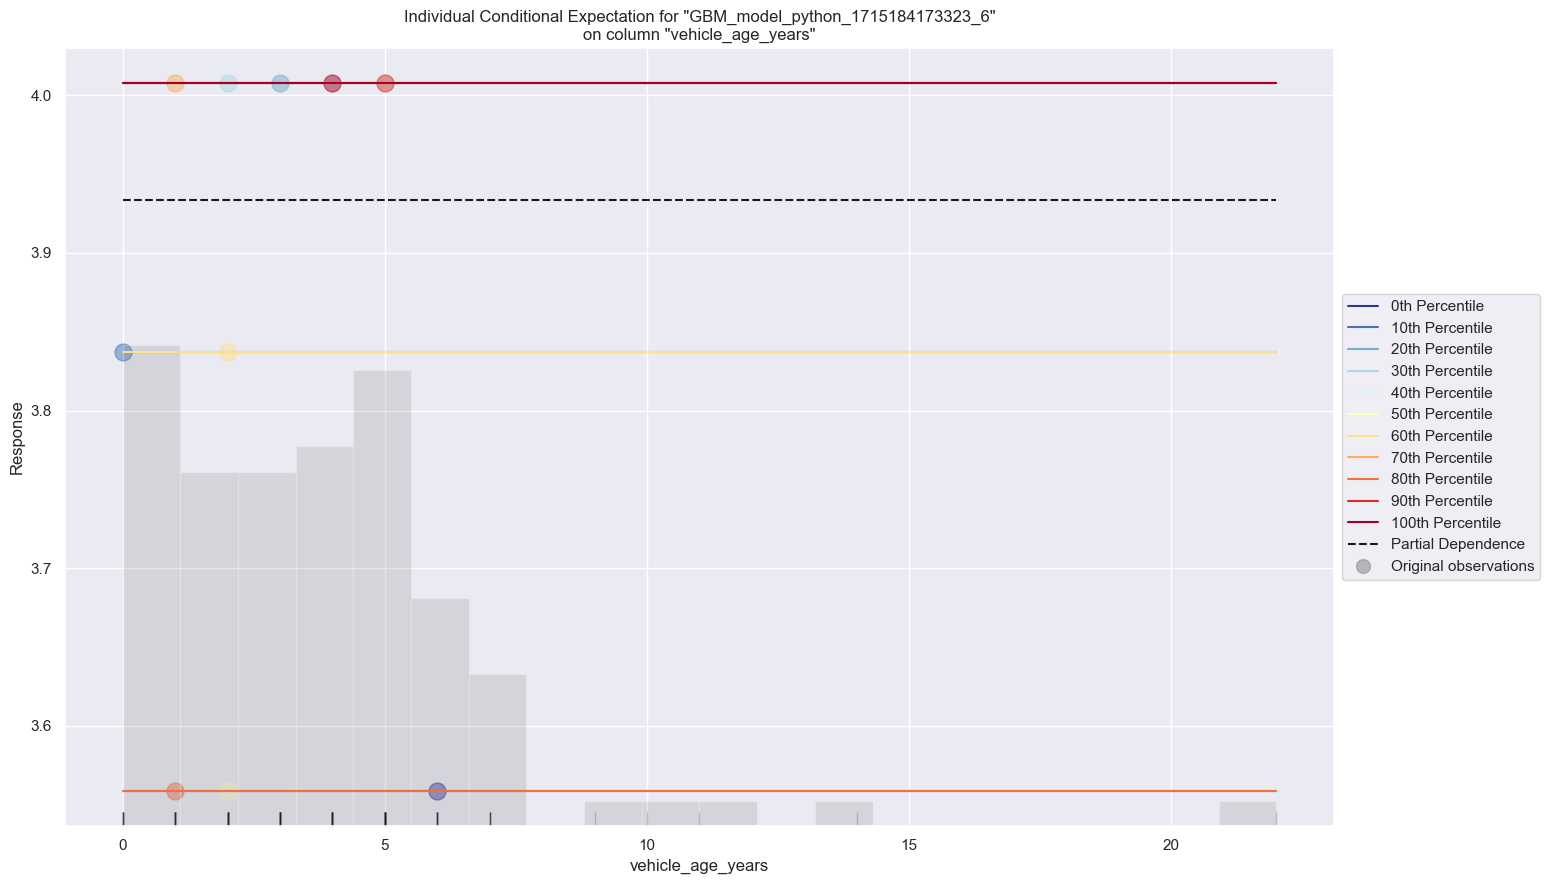

In [130]:
data_gbm.explain(train[0:100,:])

In [128]:
# Build simple GLM model
# Build simple GLM model
data_glm = H2OGeneralizedLinearEstimator(family="gaussian", standardize=True)
data_glm.train(x               =myX,
               y               =myY,
               training_frame  =train,
               validation_frame=test)

glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGeneralizedLinearEstimator : Generalized Linear Modeling
Model Key: GLM_model_python_1715184173323_7


GLM Model: summary
    family    link      regularization                                 number_of_predictors_total    number_of_active_predictors    number_of_iterations    training_frame
--  --------  --------  ---------------------------------------------  ----------------------------  -----------------------------  ----------------------  ----------------
    gaussian  identity  Elastic Net (alpha = 0.5, lambda = 2.606E-4 )  3                             3                              1                       py_23_sid_9ad9

ModelMetricsRegressionGLM: glm
** Reported on train data. **

MSE: 0.8406880073188979
RMSE: 0.9168904009307208
MAE: 0.6404441023279892
RMSLE: 0.2134830674870645
Mean Residual Deviance: 0.8406880073188979
R^2: 0.06745382792984655
Null degrees of freedom: 8974
Residual degrees of freedom: 8971
Null deviance: 8090.939721448488
Residual deviance: 7545.174865687109
AIC: 23922.473043168127

ModelMetricsRegressionGLM: glm
** Reported on validation data. **

MSE: 0.8389469132479863
RMSE: 0.9159404528941749
MAE: 0.6357925925827018
RMSLE: 0.21327658353338622
Mean Residual Deviance: 0.8389469132479863
R^2: 0.045287947028107456
Null degrees of freedom: 977
Residual degrees of freedom: 974
Null deviance: 859.554646509571
Residual deviance: 820.4900811565307
AIC: 2613.699295255089

Scoring History: 
    timestamp            duration    iterations    negative_log_likelihood    objective           training_rmse       training_deviance    training_mae        training_r2          validation_rmse     validation_deviance    validation_mae      validation_r2
--  -------------------  ----------  ------------  -------------------------  ------------------  ------------------  -------------------  ------------------  -------------------  ------------------  ---------------------  ------------------  --------------------
    2024-05-08 13:18:46  0.000 sec   0             8090.939721448488          0.9014974619998315
    2024-05-08 13:18:46  0.021 sec   1                                                            0.9168904009307208  0.8406880073188979   0.6404441023279892  0.06745382792984655  0.9159404528941749  0.8389469132479863     0.6357925925827018  0.045287947028107456

Variable Importances: 
variable           relative_importance    scaled_importance    percentage
-----------------  ---------------------  -------------------  ------------
vehicle_age_years  0.225714               1                    0.423784
kilometers         0.178078               0.788956             0.334347
price              0.128823               0.570736             0.241869

[tips]
Use `model.explain()` to inspect the model.
--
Use `h2o.display.toggle_user_tips()` to switch on/off this section.

# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

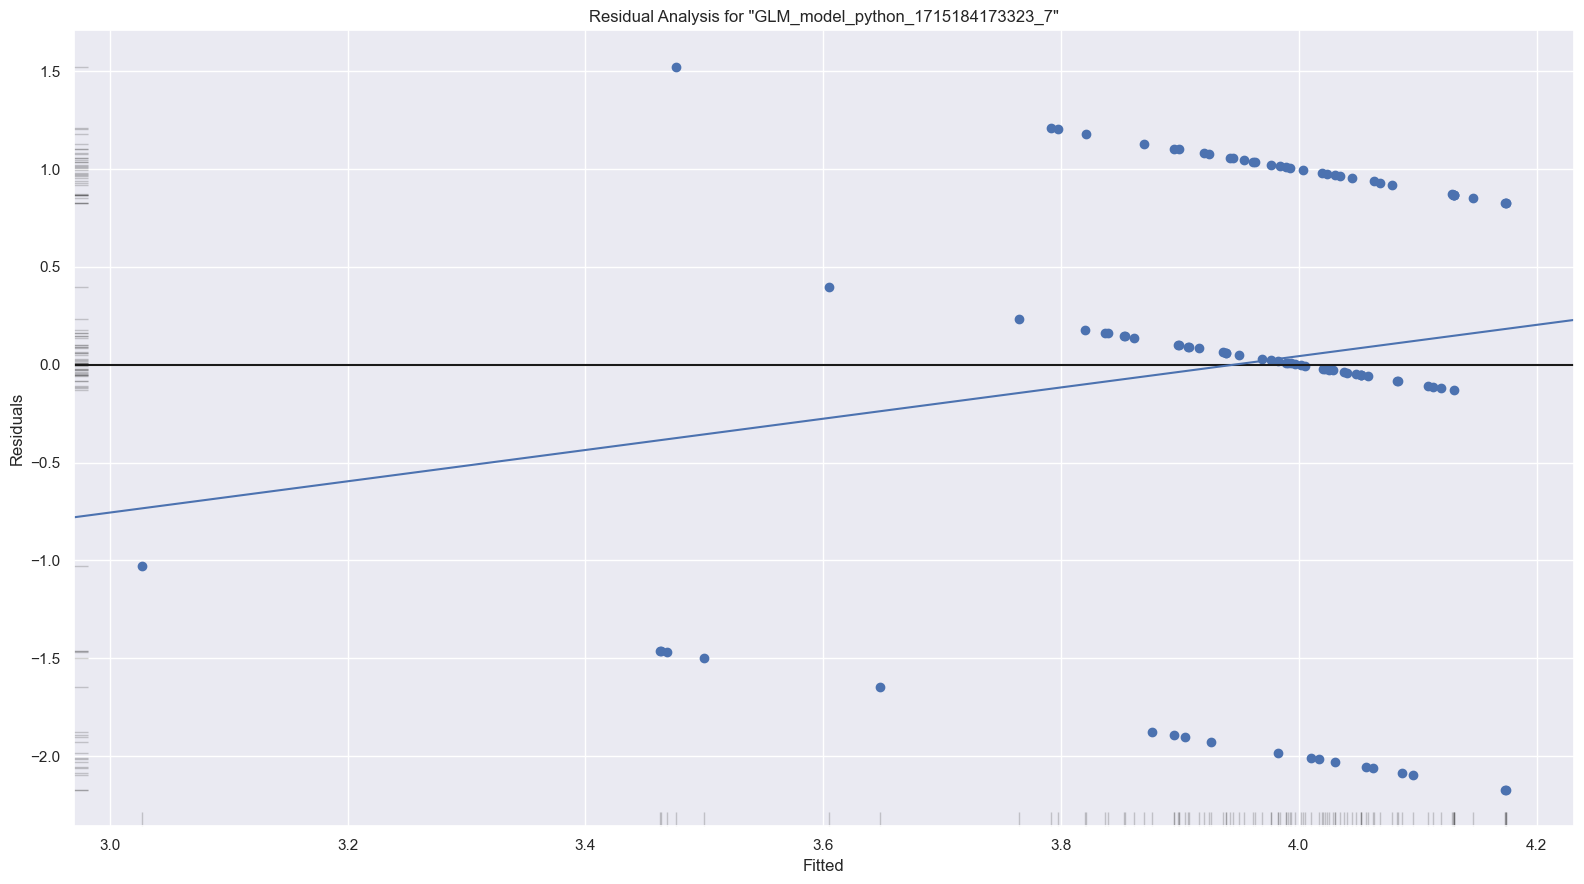

# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

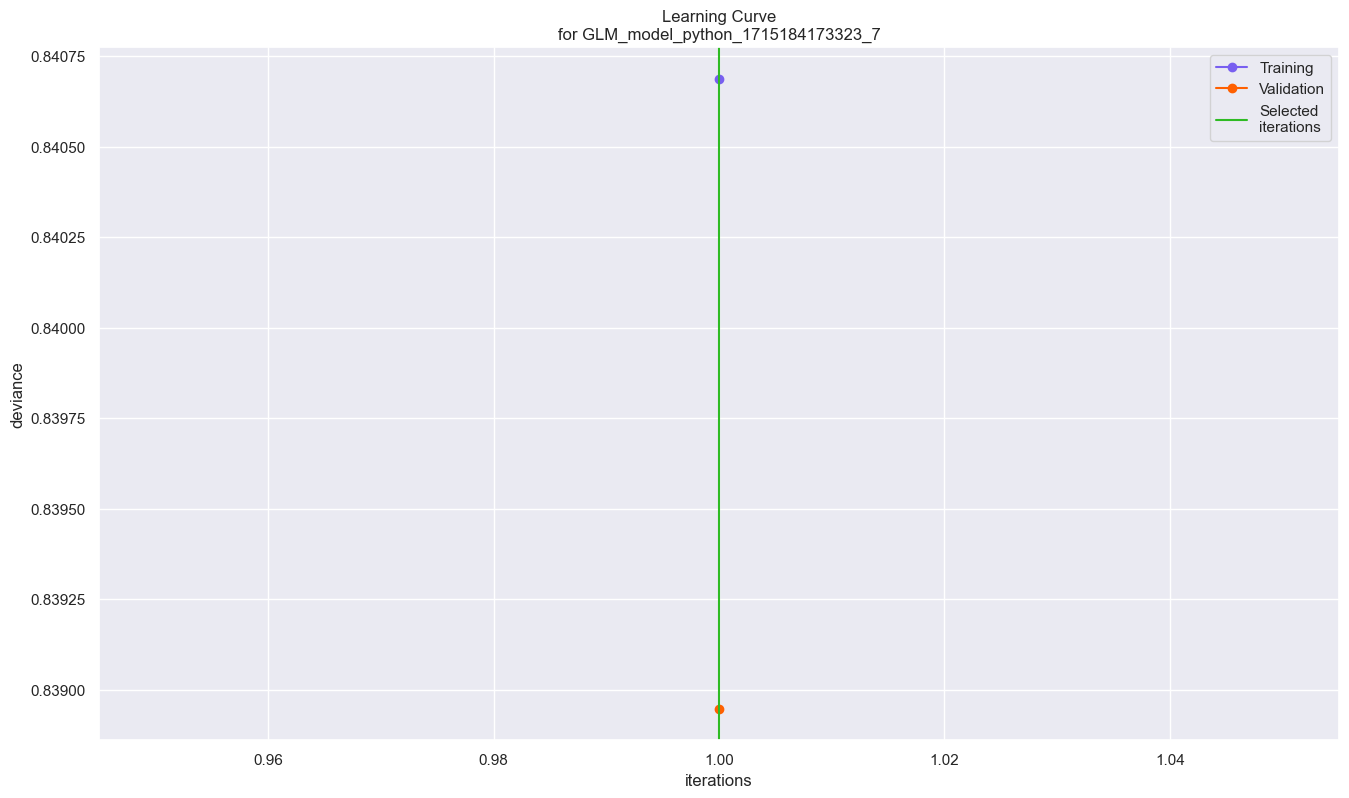

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

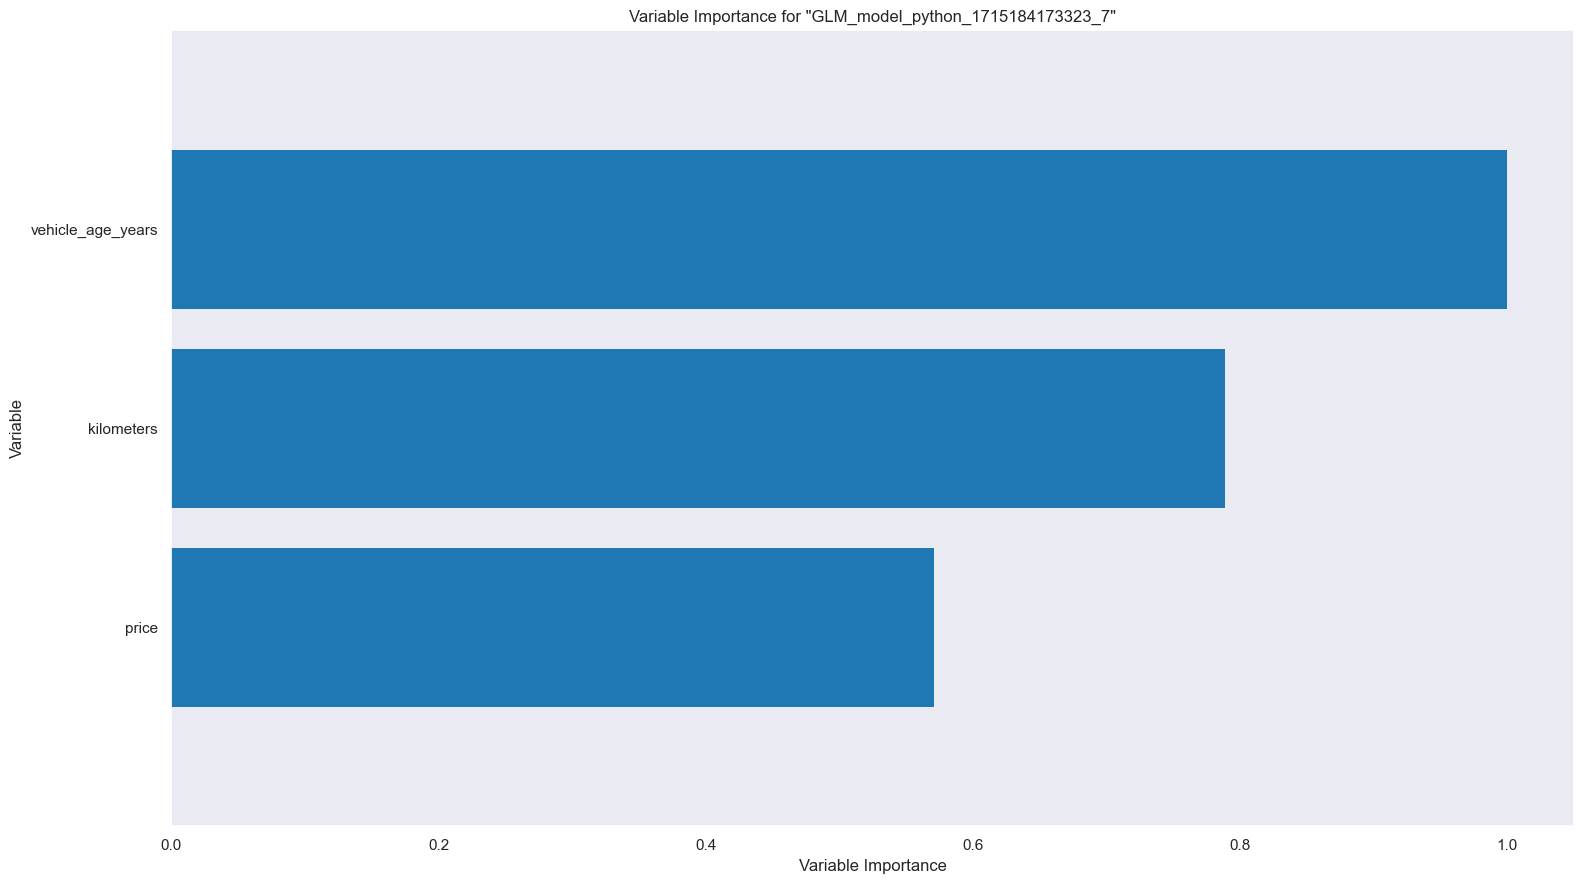

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

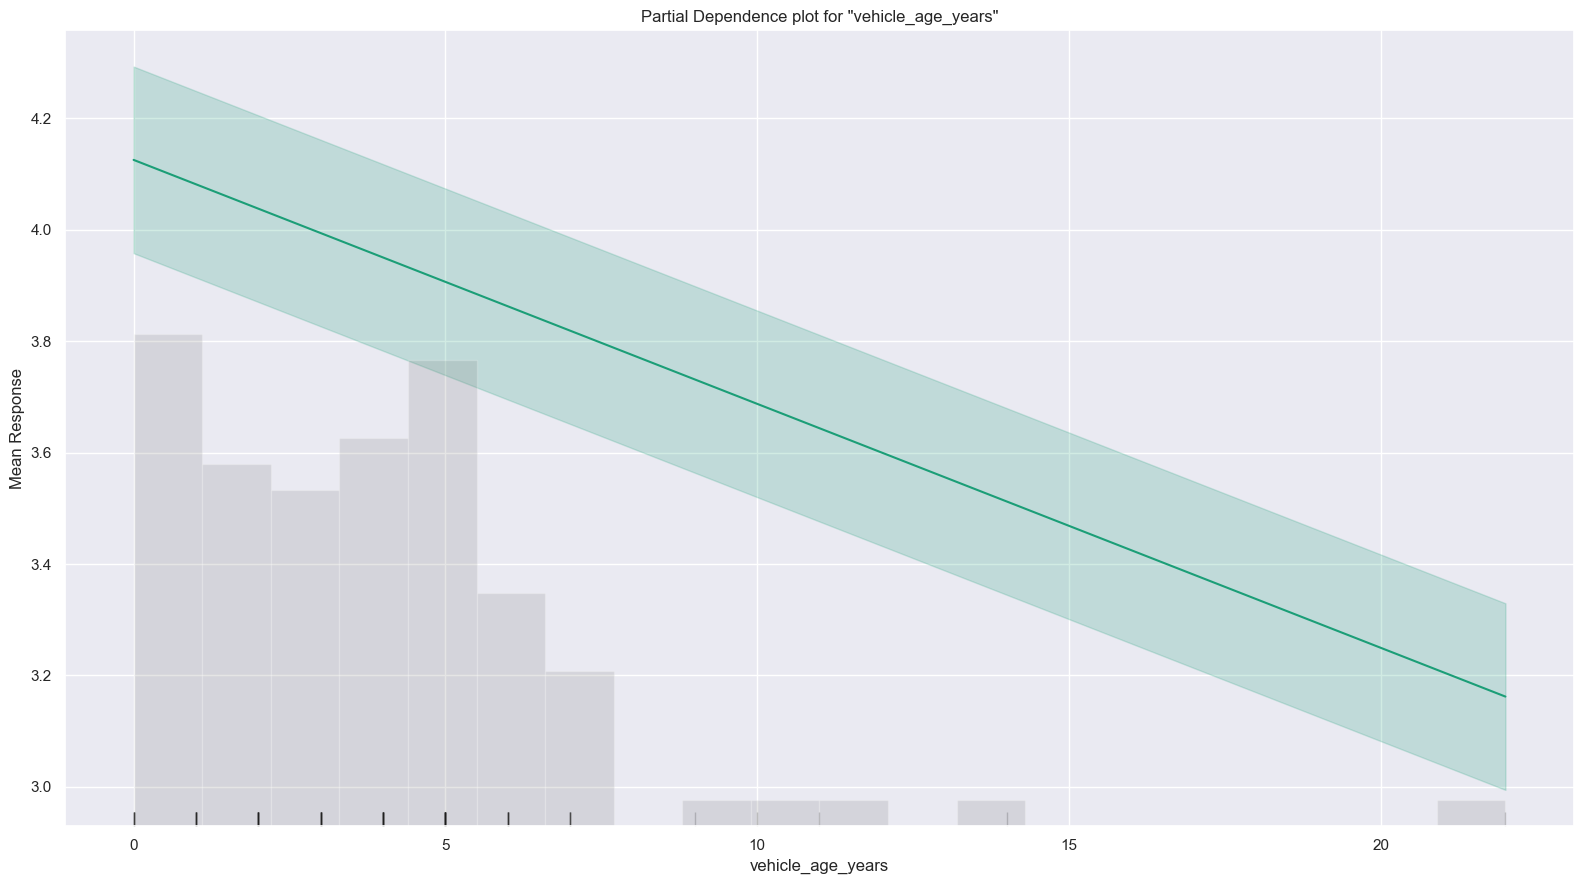

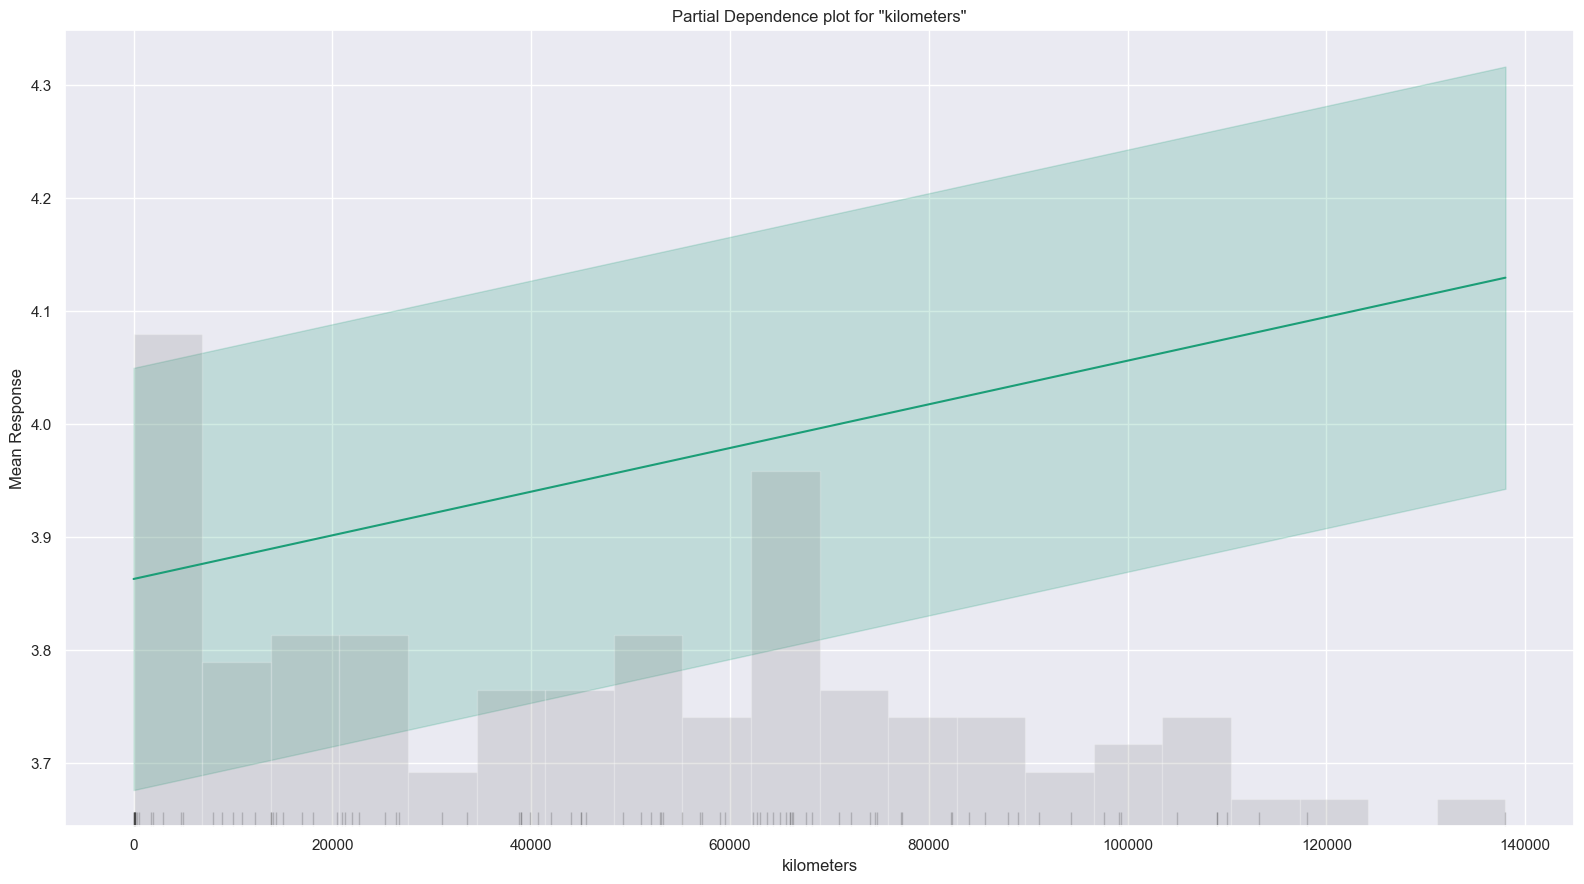

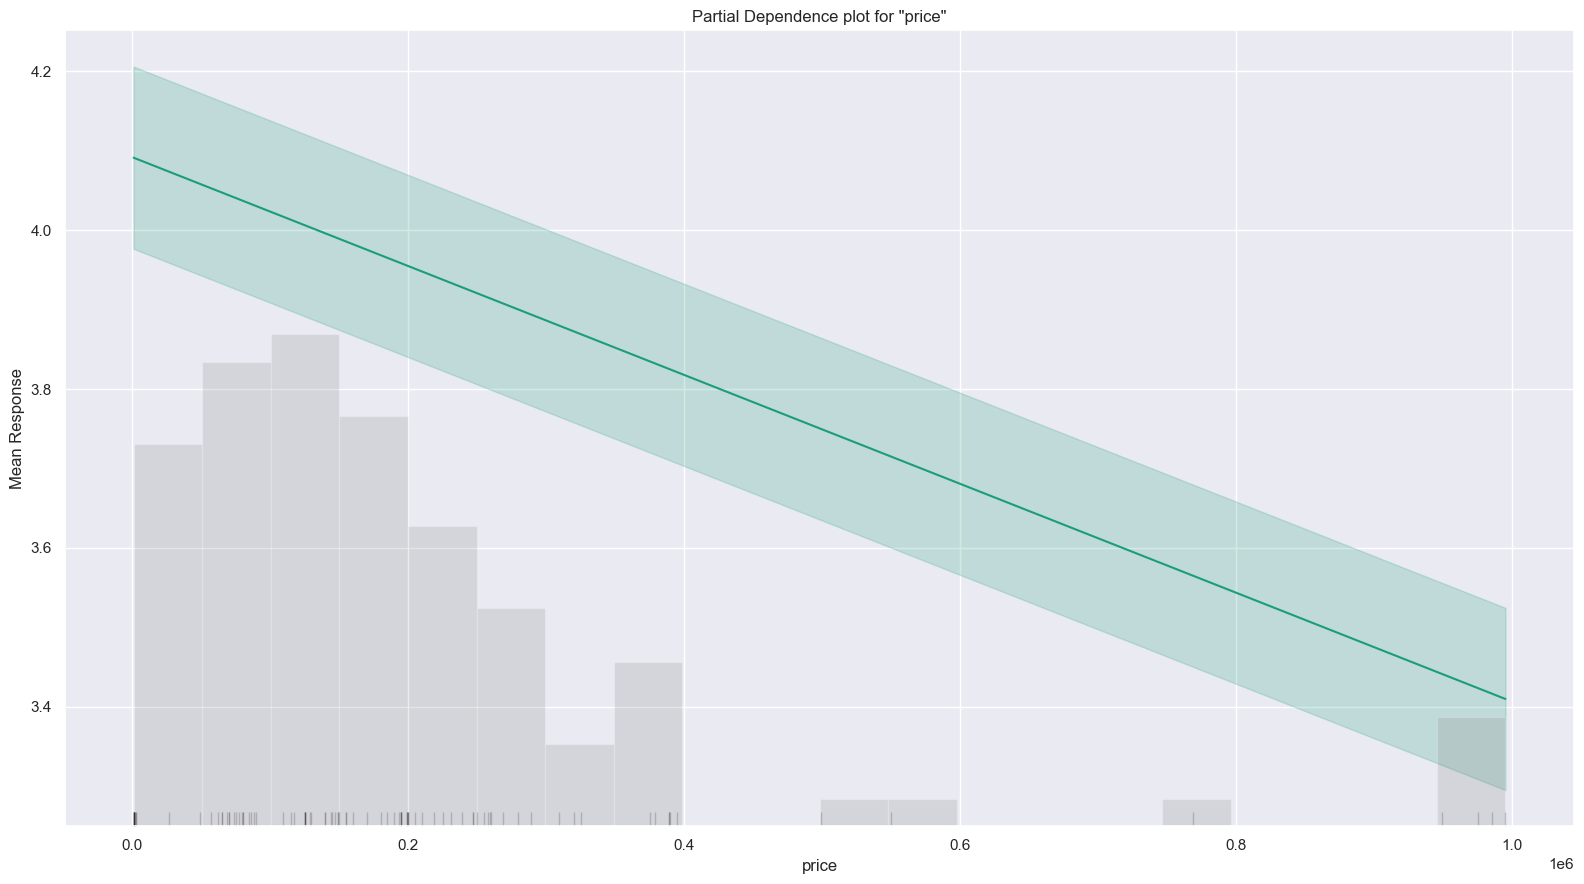

# Individual Conditional Expectation

> An Individual Conditional Expectation (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response. ICE plots are similar to partial dependence plots (PDP); PDP shows the average effect of a feature while ICE plot shows the effect for a single instance. This function will plot the effect for each decile. In contrast to the PDP, ICE plots can provide more insight, especially when there is stronger feature interaction.

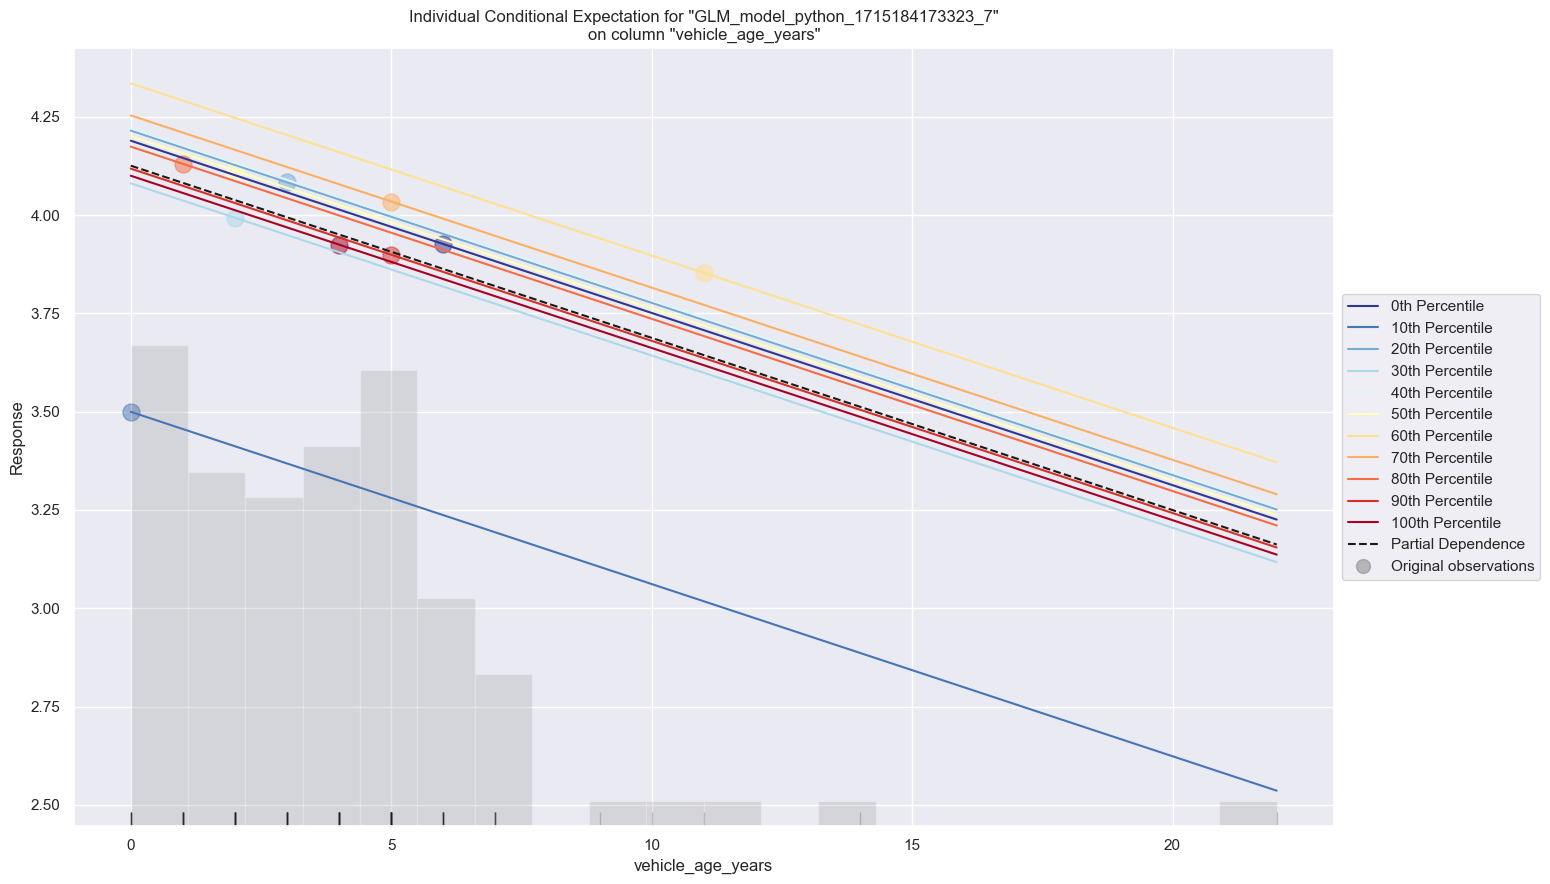

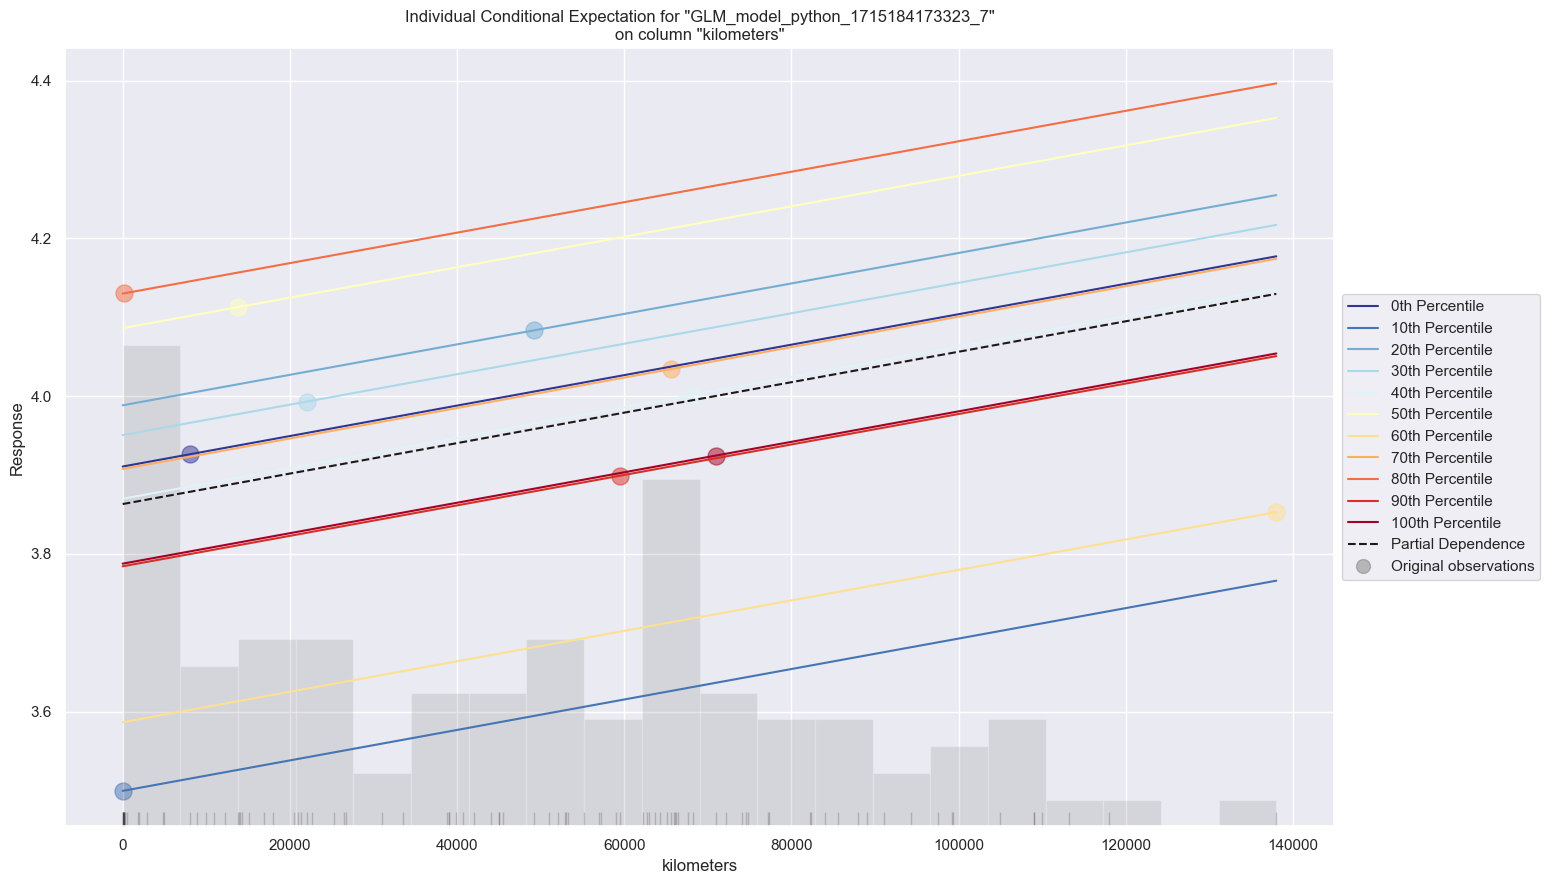

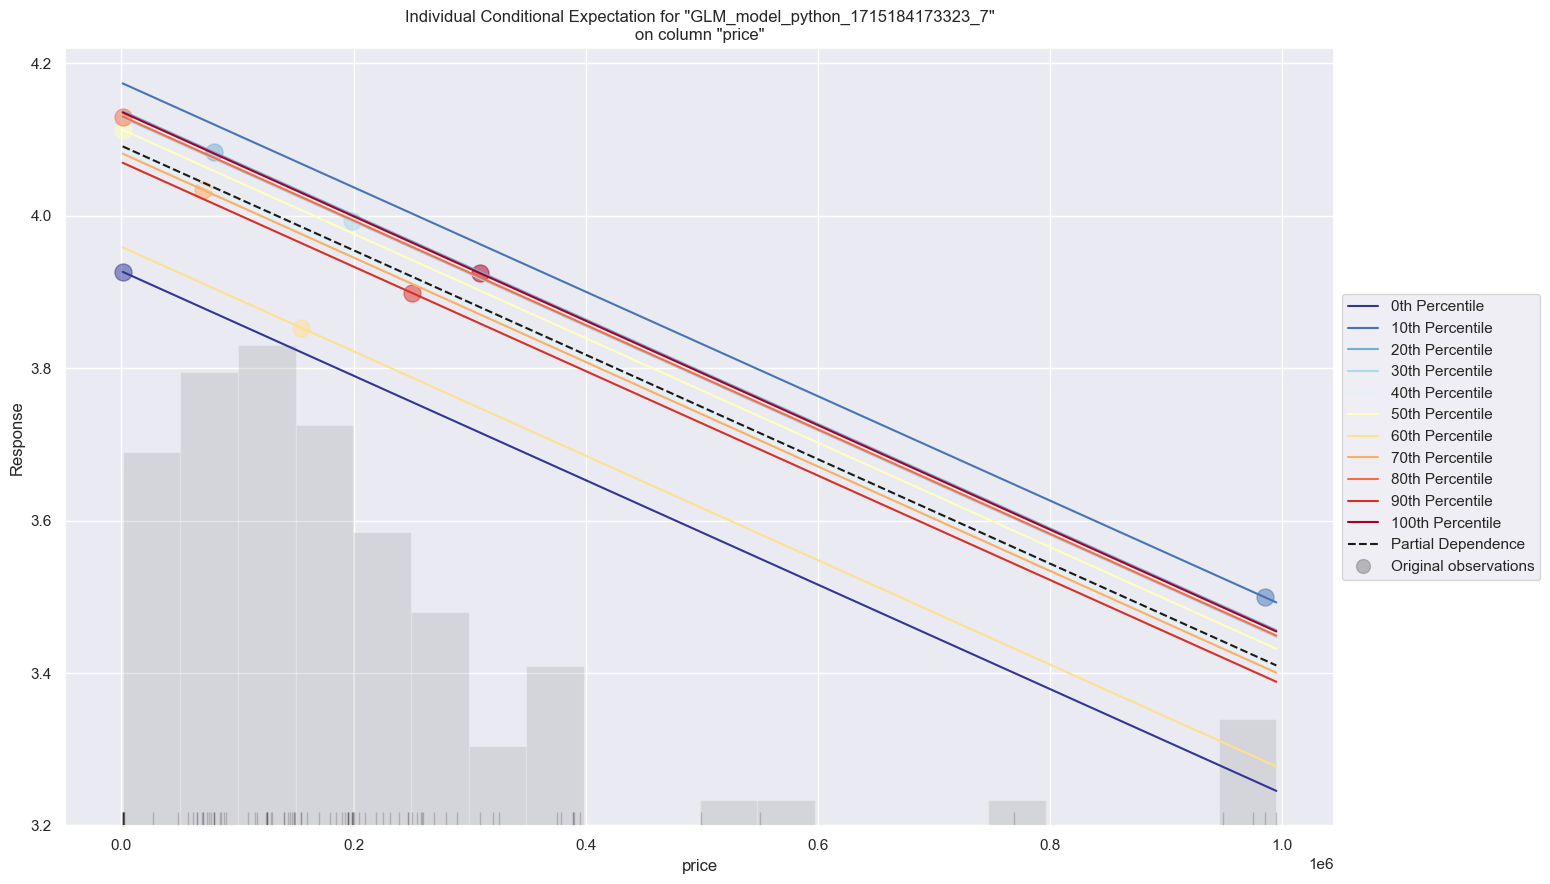

# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

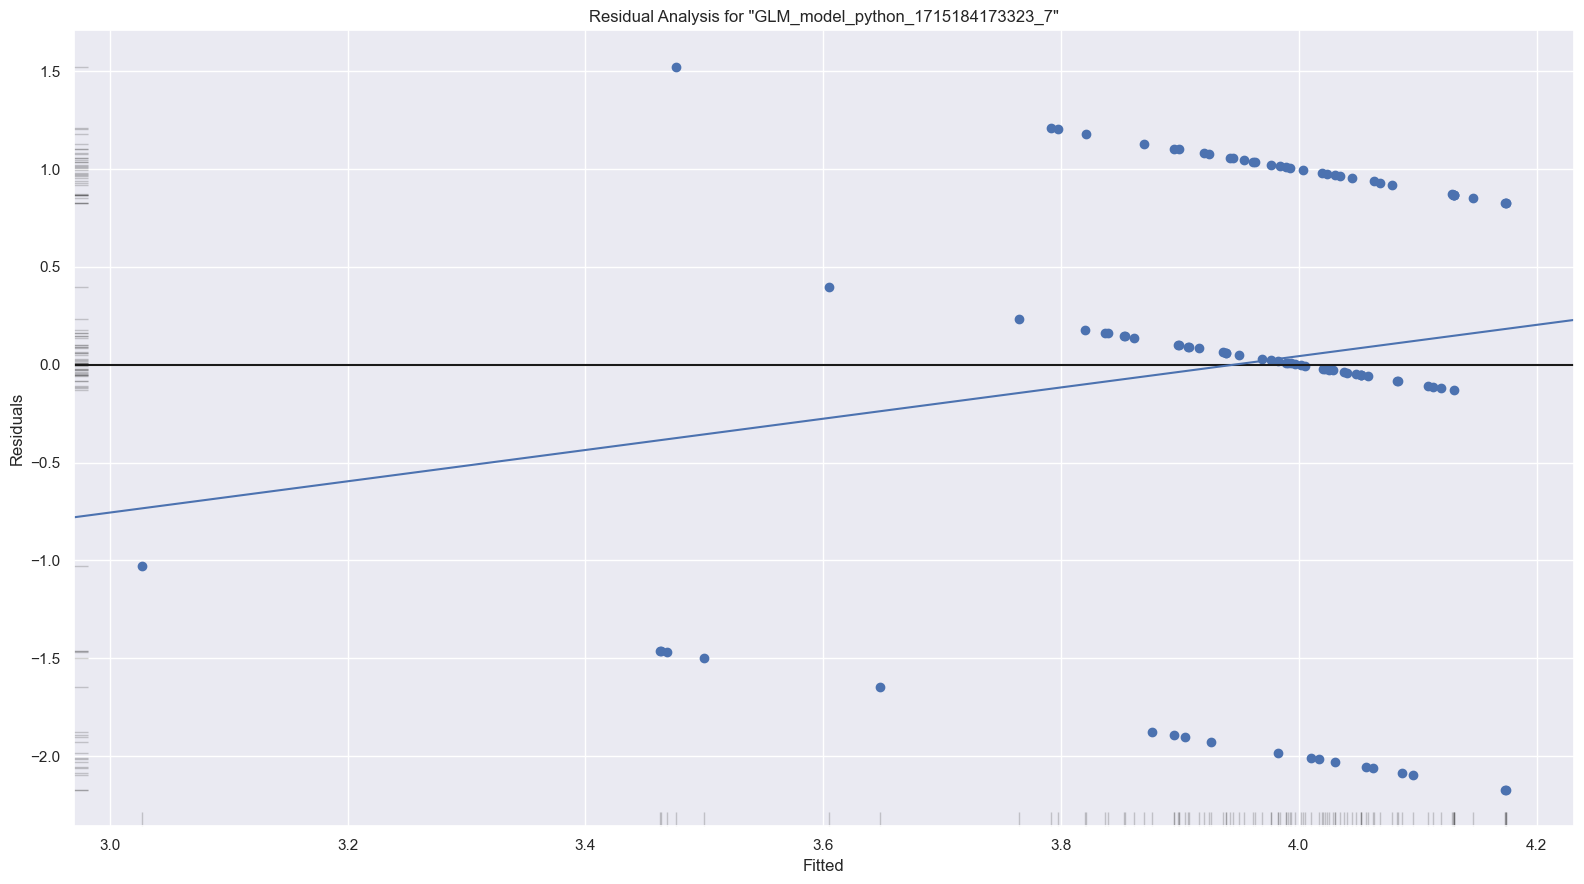

# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

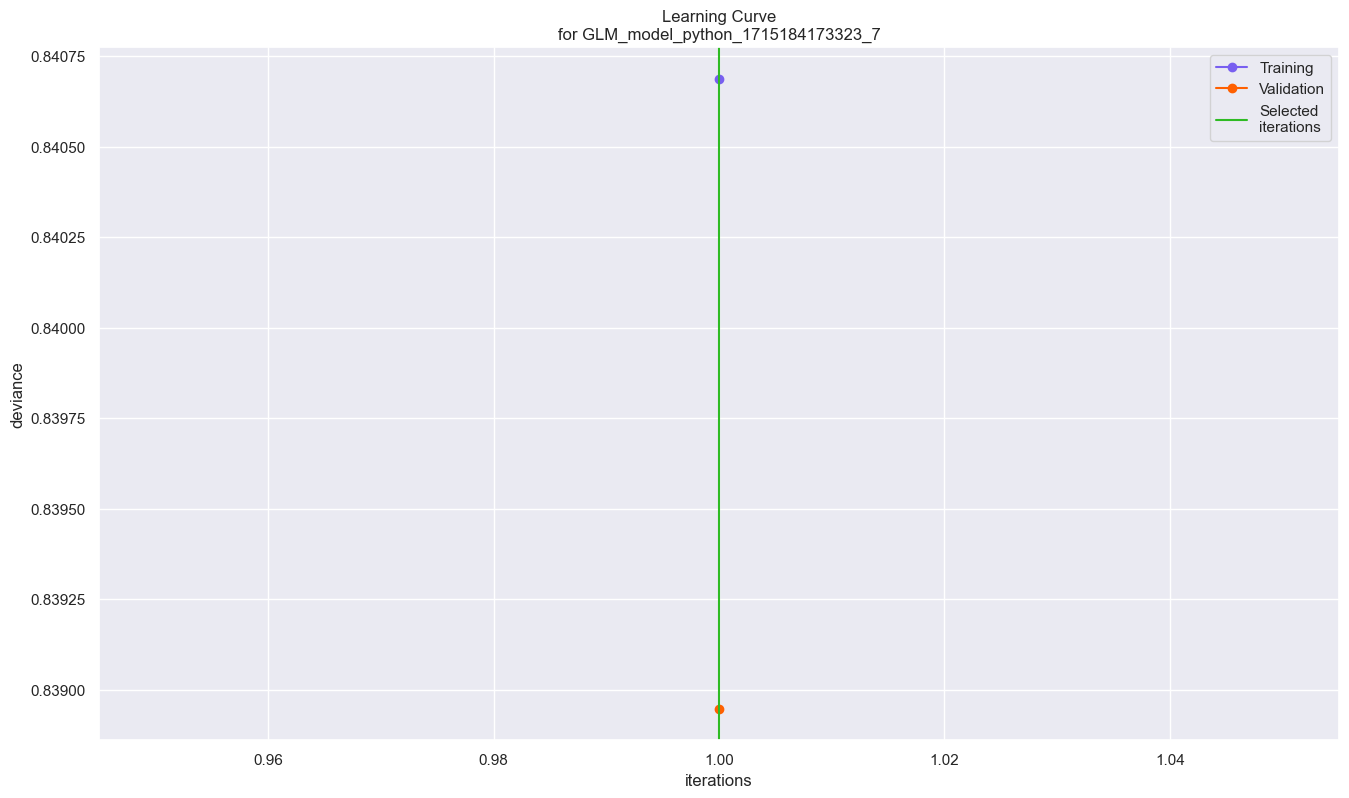

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

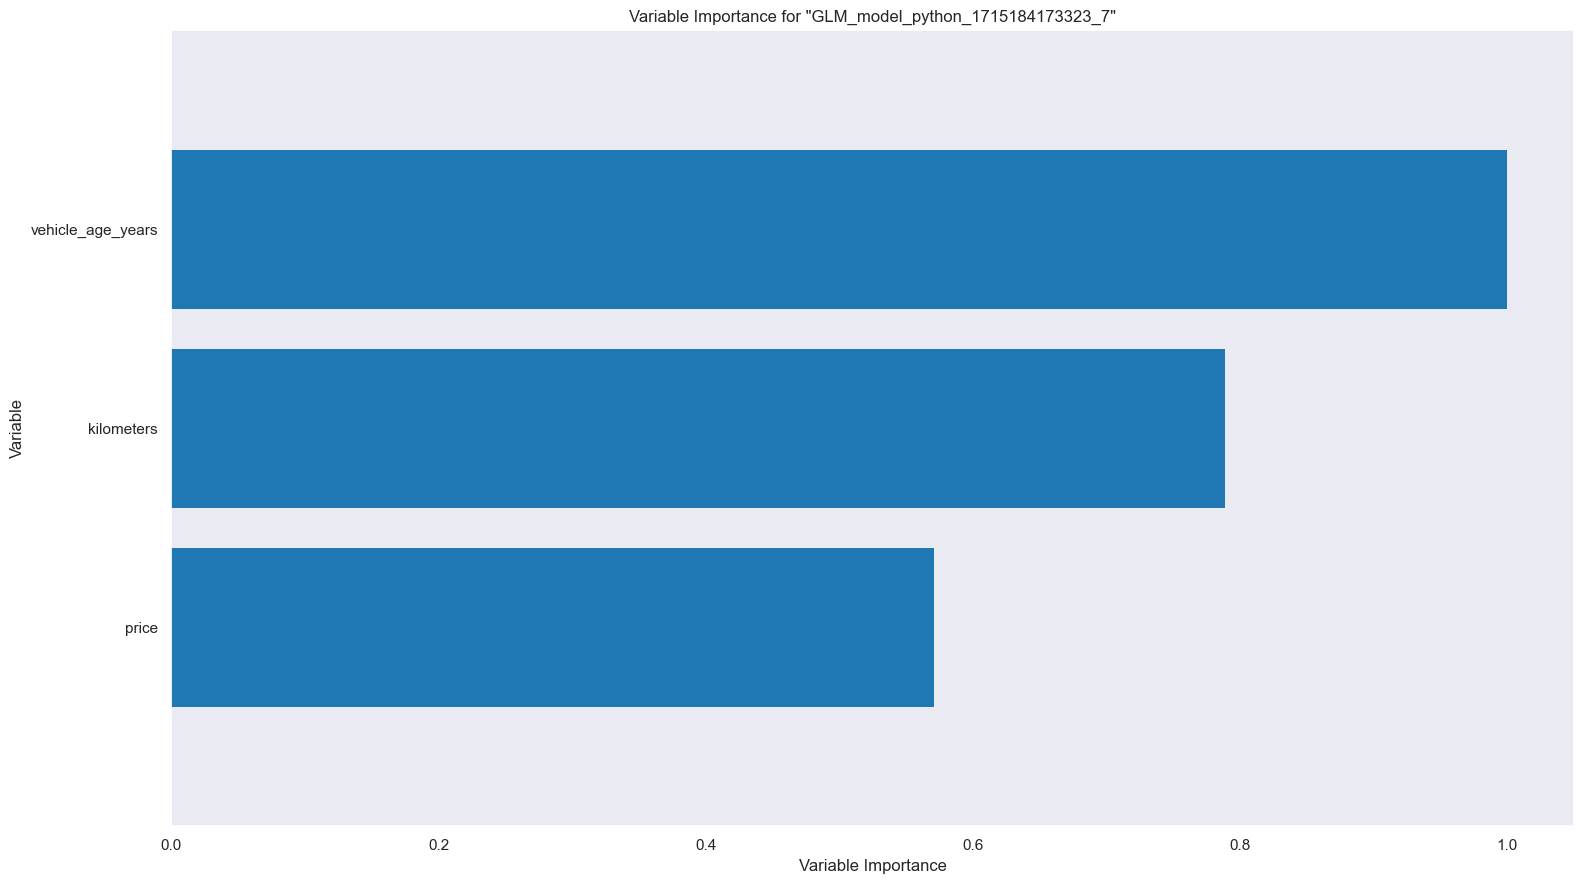

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

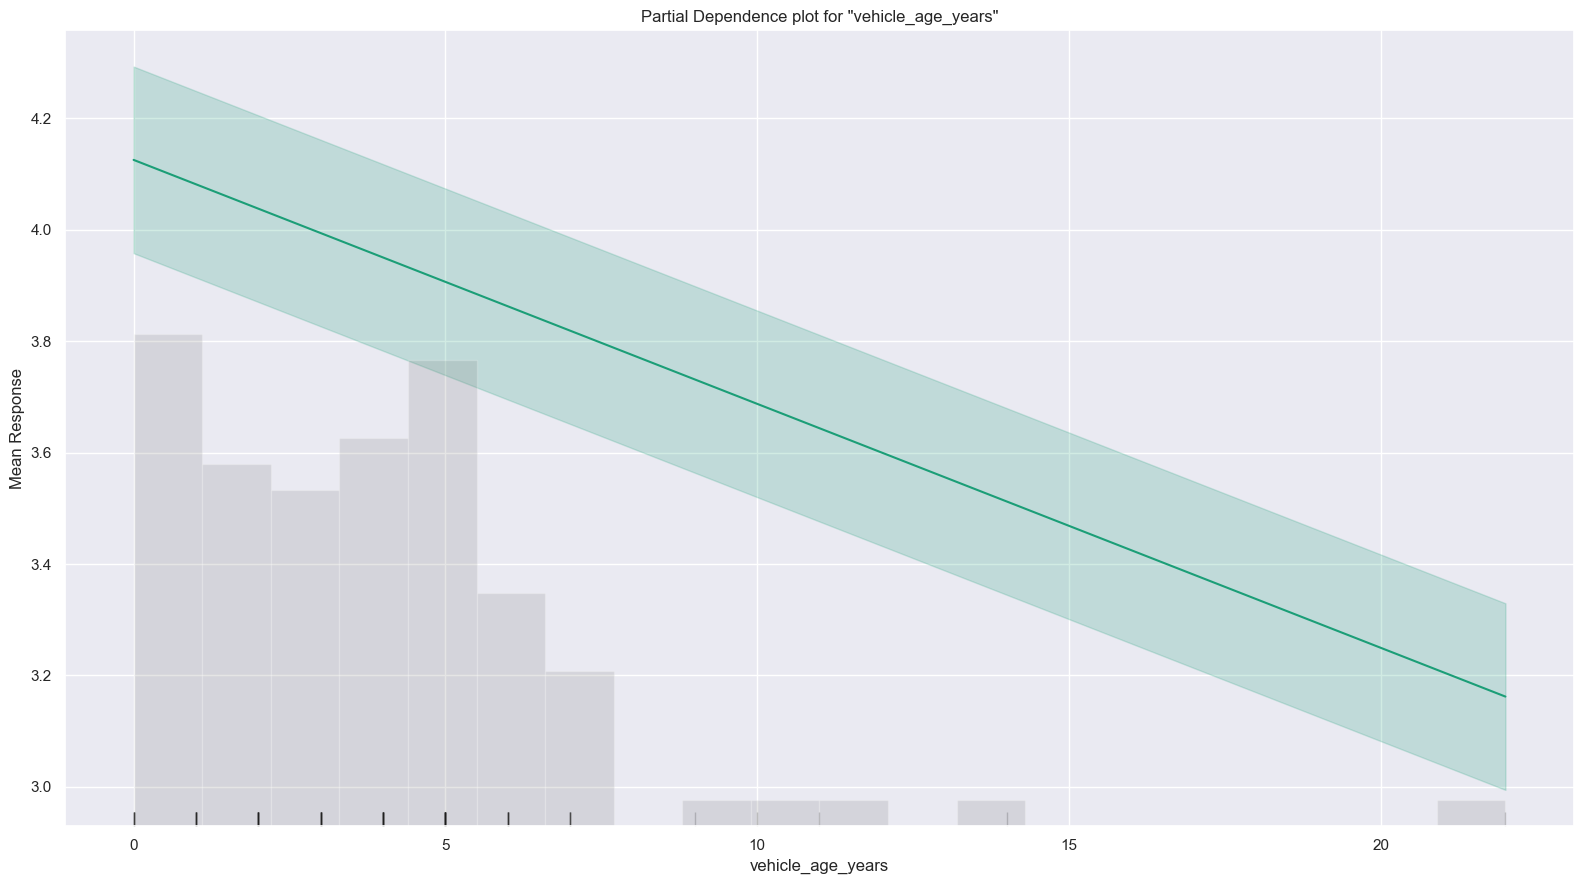

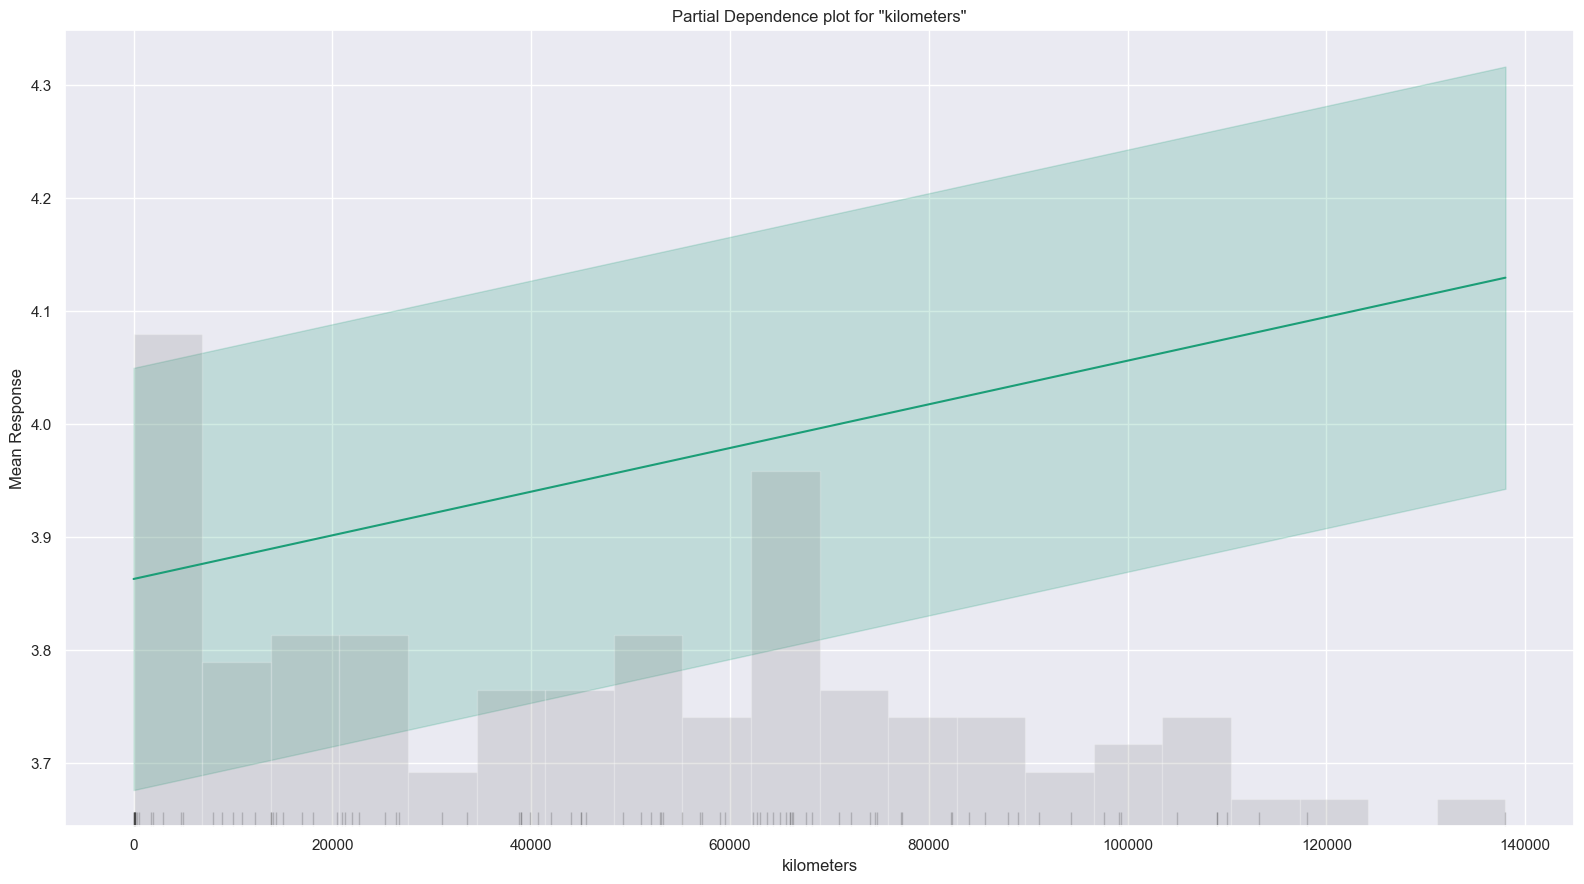

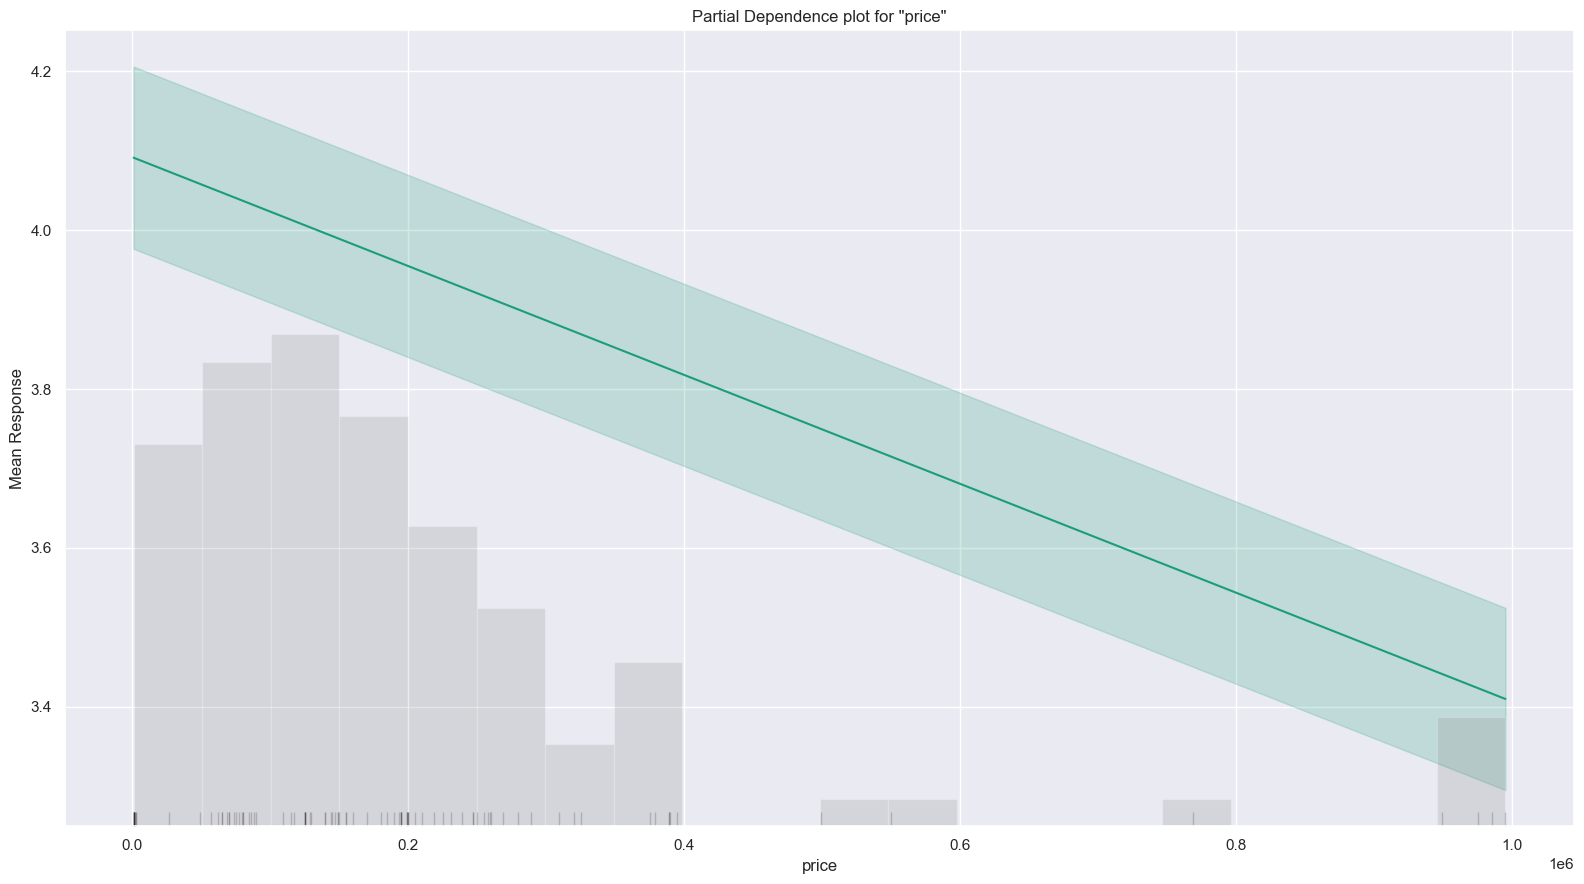

# Individual Conditional Expectation

> An Individual Conditional Expectation (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response. ICE plots are similar to partial dependence plots (PDP); PDP shows the average effect of a feature while ICE plot shows the effect for a single instance. This function will plot the effect for each decile. In contrast to the PDP, ICE plots can provide more insight, especially when there is stronger feature interaction.

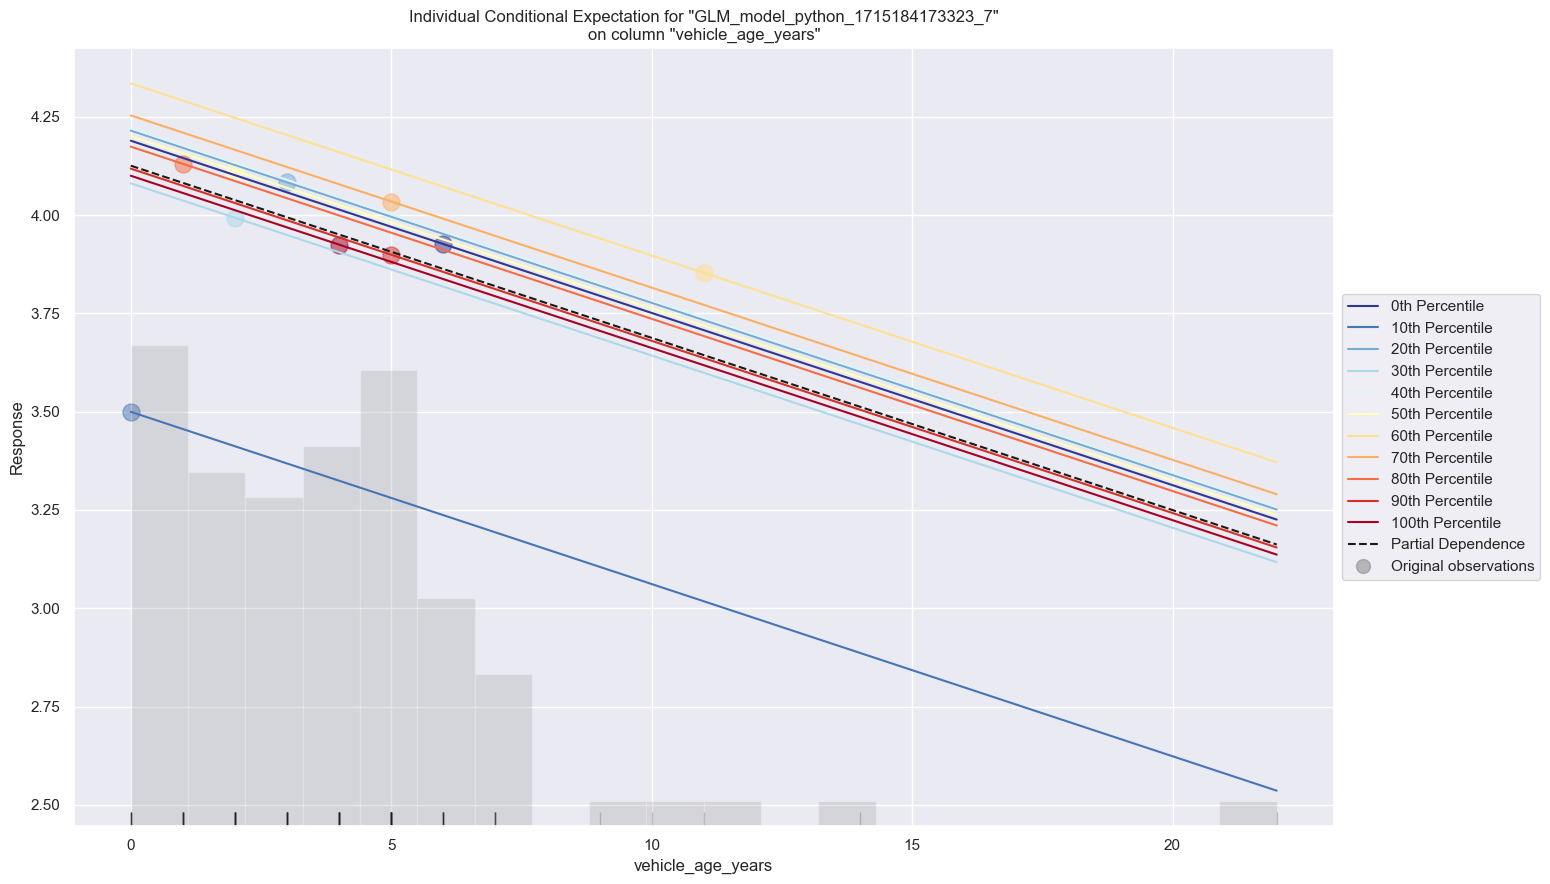

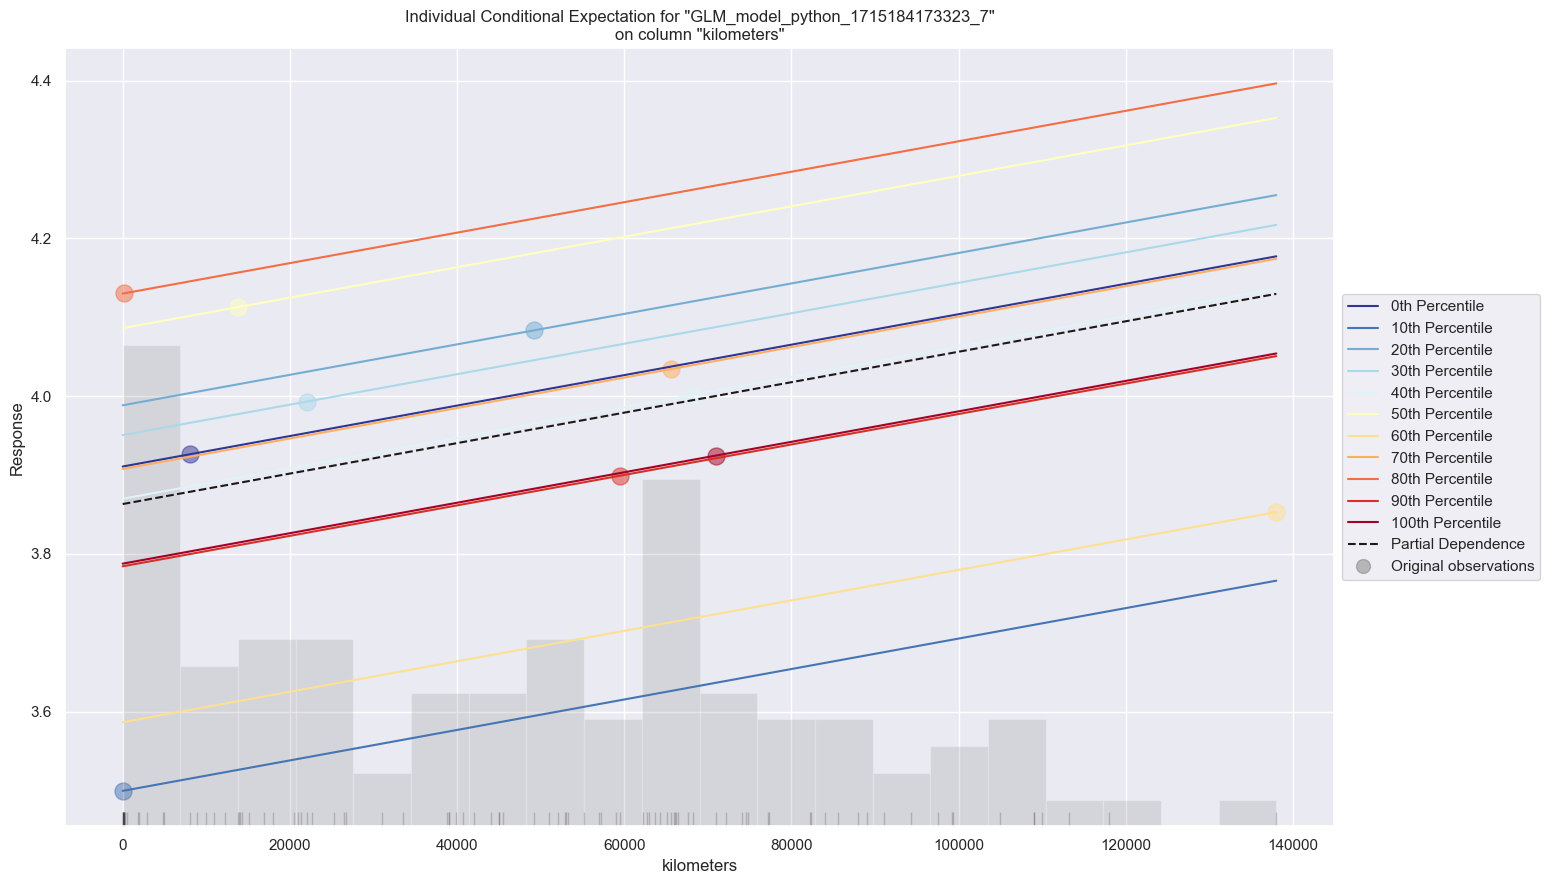

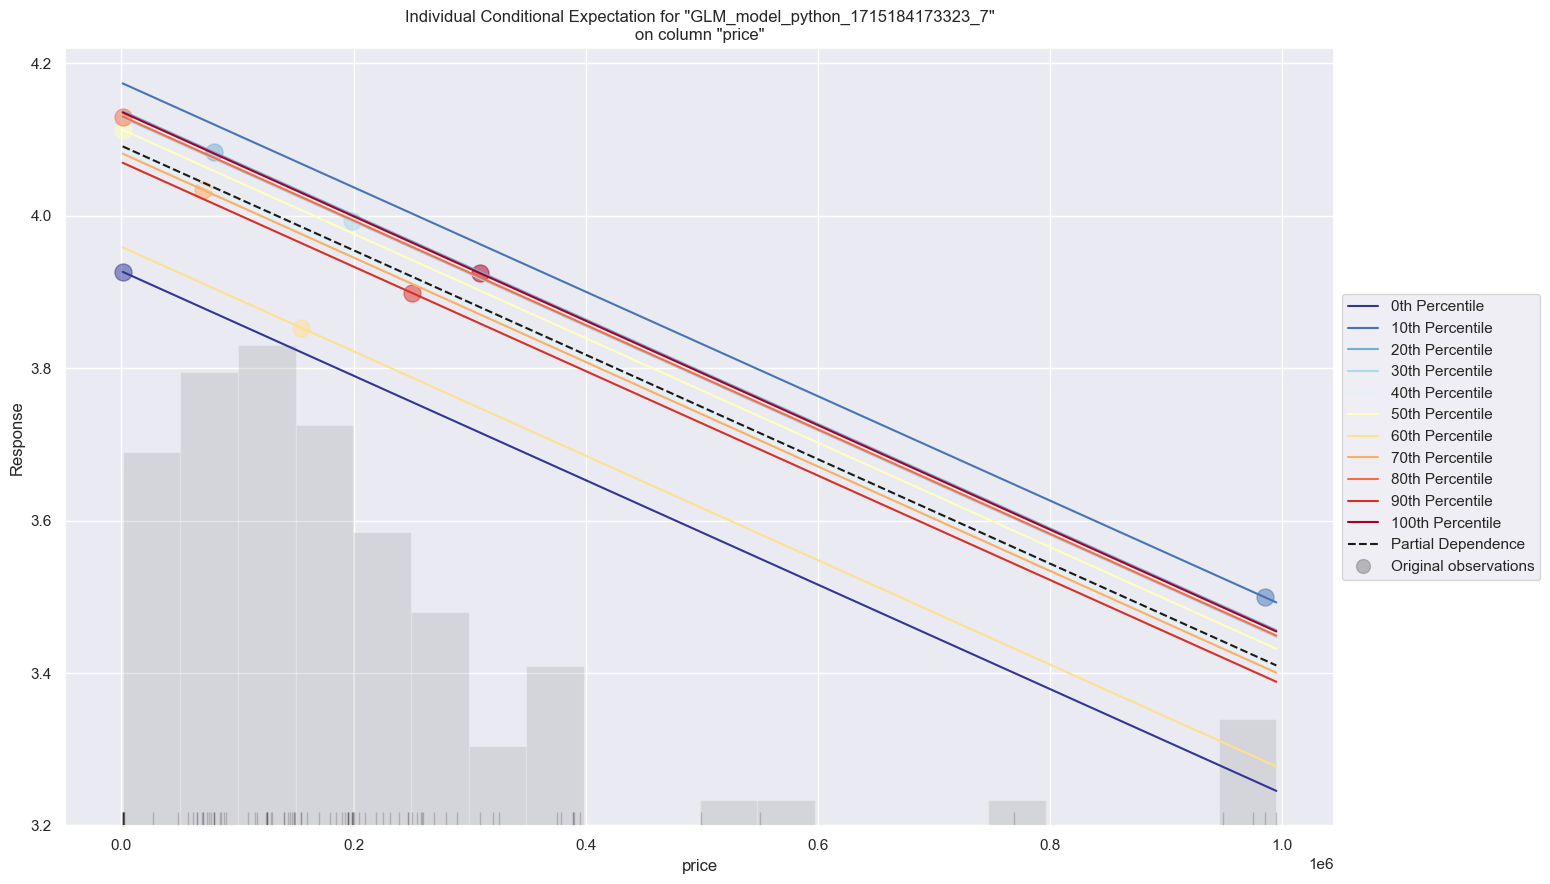

In [129]:
data_glm.explain(train[1:100,:])

In [131]:
# Build simple GBM model

data_gbm = H2OGradientBoostingEstimator(balance_classes=True,
                                        ntrees         =10,
                                        max_depth      =1,
                                        learn_rate     =0.1,
                                        min_rows       =2)

data_gbm.train(x               =myX,
               y               =myY,
               training_frame  =train,
               validation_frame=test)

gbm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: GBM_model_python_1715184173323_8


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    10                 10                          830                    1            1            1             2             2             2

ModelMetricsRegression: gbm
** Reported on train data. **

MSE: 0.8540908075872063
RMSE: 0.9241703347258049
MAE: 0.608699946708998
RMSLE: 0.21608137527457932
Mean Residual Deviance: 0.8540908075872063

ModelMetricsRegression: gbm
** Reported on validation data. **

MSE: 0.8350423315216108
RMSE: 0.9138065066093647
MAE: 0.5976563193985078
RMSLE: 0.21303412277568815
Mean Residual Deviance: 0.8350423315216108

Scoring History: 
    timestamp            duration    number_of_trees    training_rmse    training_mae    training_deviance    validation_rmse    validation_mae    validation_deviance
--  -------------------  ----------  -----------------  ---------------  --------------  -------------------  -----------------  ----------------  ---------------------
    2024-05-08 13:22:22  0.007 sec   0                  0.949472         0.626073        0.901497             0.937491           0.615665          0.87889
    2024-05-08 13:22:22  0.040 sec   1                  0.944991         0.622306        0.893008             0.932419           0.611363          0.869406
    2024-05-08 13:22:22  0.061 sec   2                  0.941346         0.618917        0.886131             0.928221           0.607491          0.861594
    2024-05-08 13:22:22  0.079 sec   3                  0.938382         0.615866        0.880561             0.924743           0.604006          0.85515
    2024-05-08 13:22:22  0.108 sec   4                  0.935808         0.613912        0.875736             0.923593           0.60254           0.853024
    2024-05-08 13:22:22  0.127 sec   5                  0.933349         0.611141        0.87114              0.920662           0.599375          0.847619
    2024-05-08 13:22:22  0.143 sec   6                  0.931212         0.609365        0.867155             0.9198             0.598043          0.846033
    2024-05-08 13:22:22  0.158 sec   7                  0.929174         0.606848        0.863364             0.917329           0.595168          0.841492
    2024-05-08 13:22:22  0.176 sec   8                  0.927382         0.605253        0.860037             0.916476           0.594046          0.839928
    2024-05-08 13:22:22  0.193 sec   9                  0.925695         0.605697        0.856912             0.914297           0.594206          0.835939
    2024-05-08 13:22:22  0.219 sec   10                 0.92417          0.6087          0.854091             0.913807           0.597656          0.835042

Variable Importances: 
variable           relative_importance    scaled_importance    percentage
-----------------  ---------------------  -------------------  ------------
price              2239.34                1                    1
kilometers         0                      0                    0
vehicle_age_years  0                      0                    0

[tips]
Use `model.explain()` to inspect the model.
--
Use `h2o.display.toggle_user_tips()` to switch on/off this section.

# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

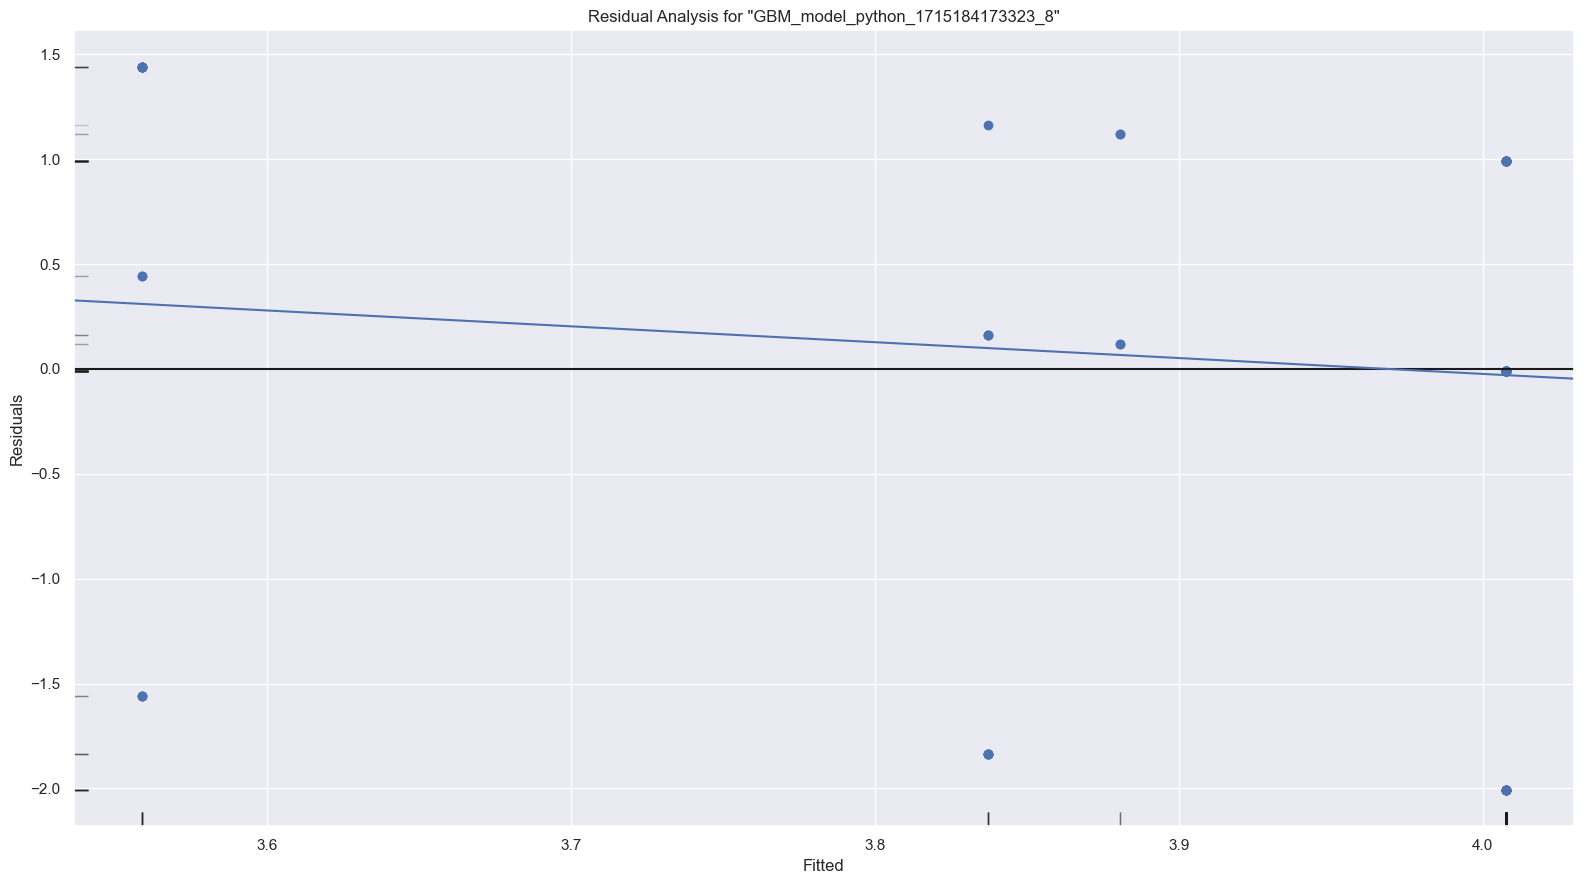

# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

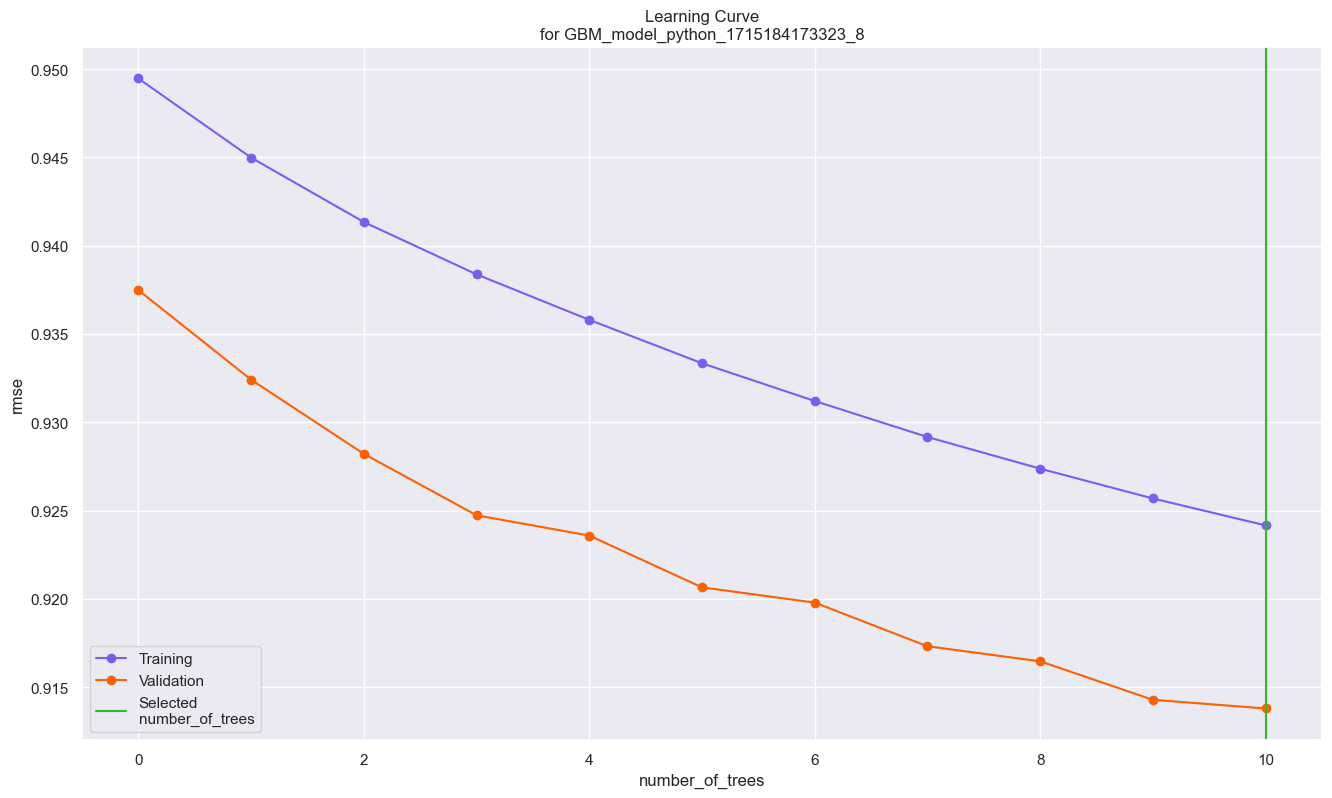

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

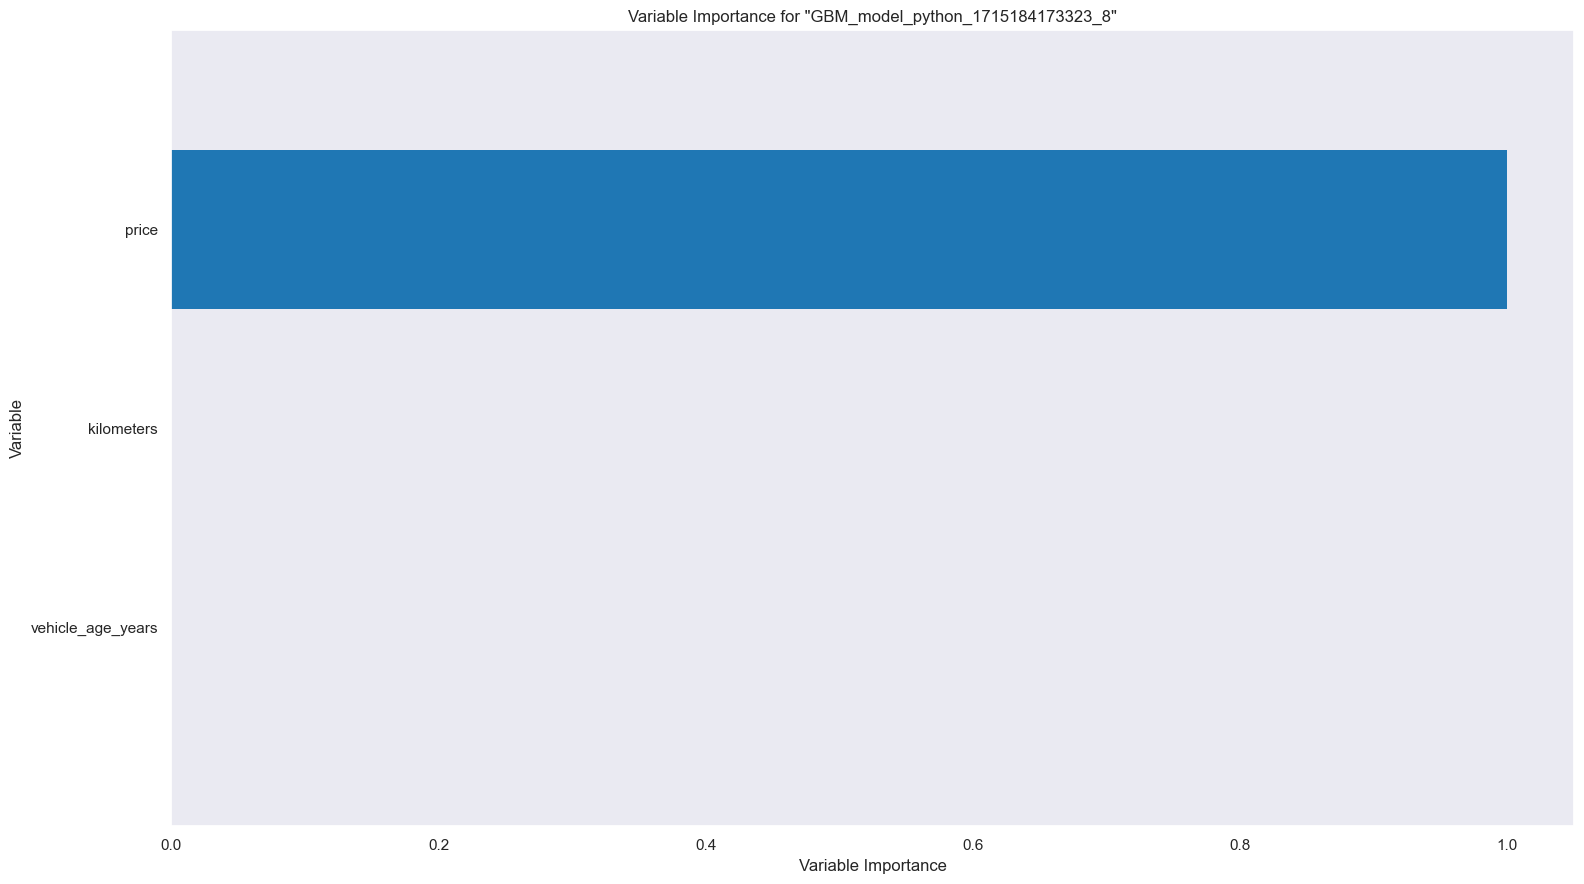

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

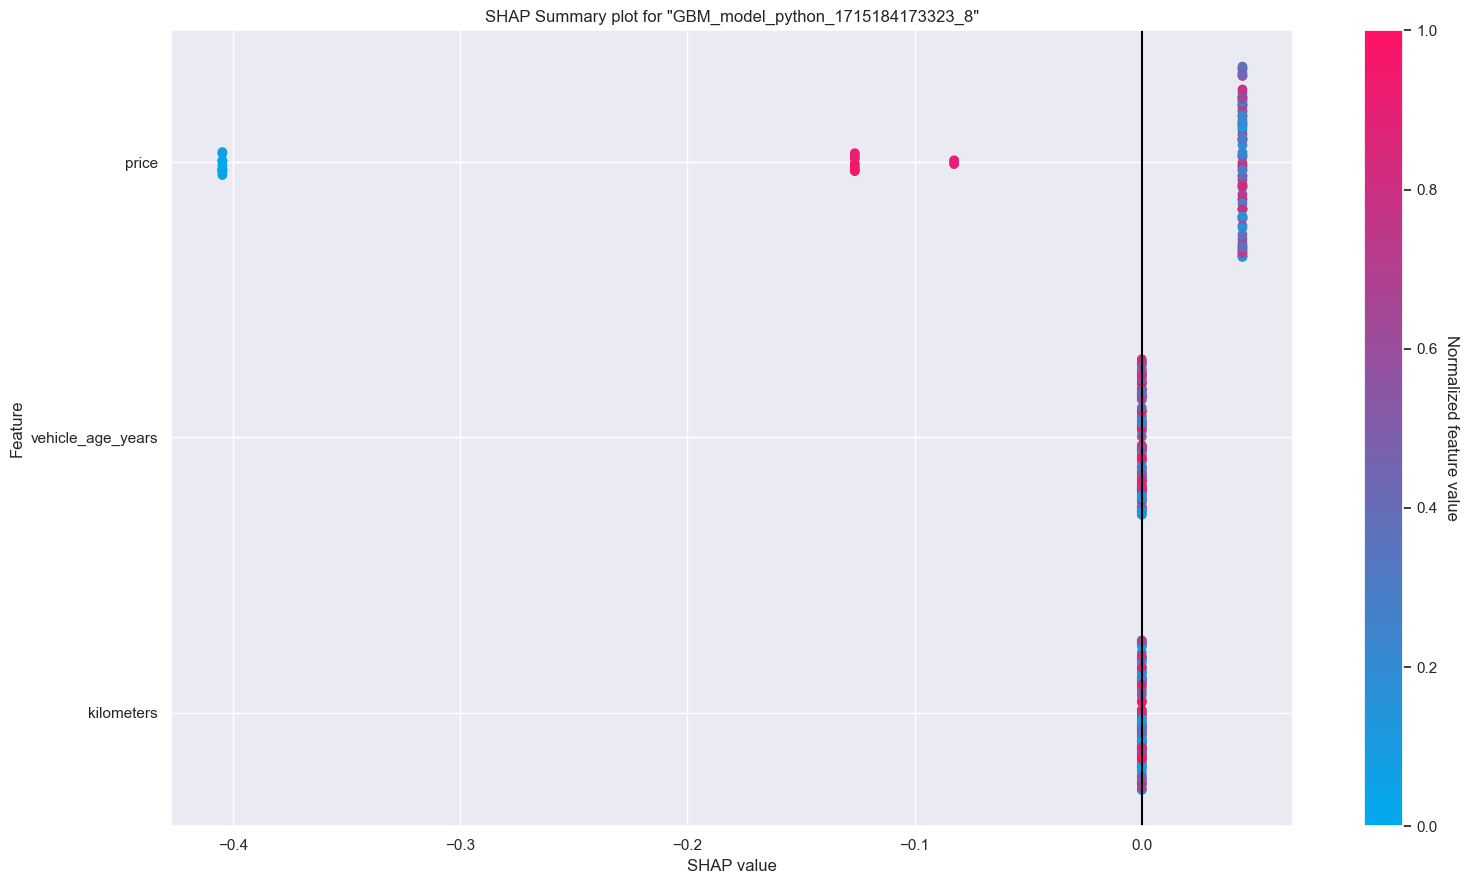

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

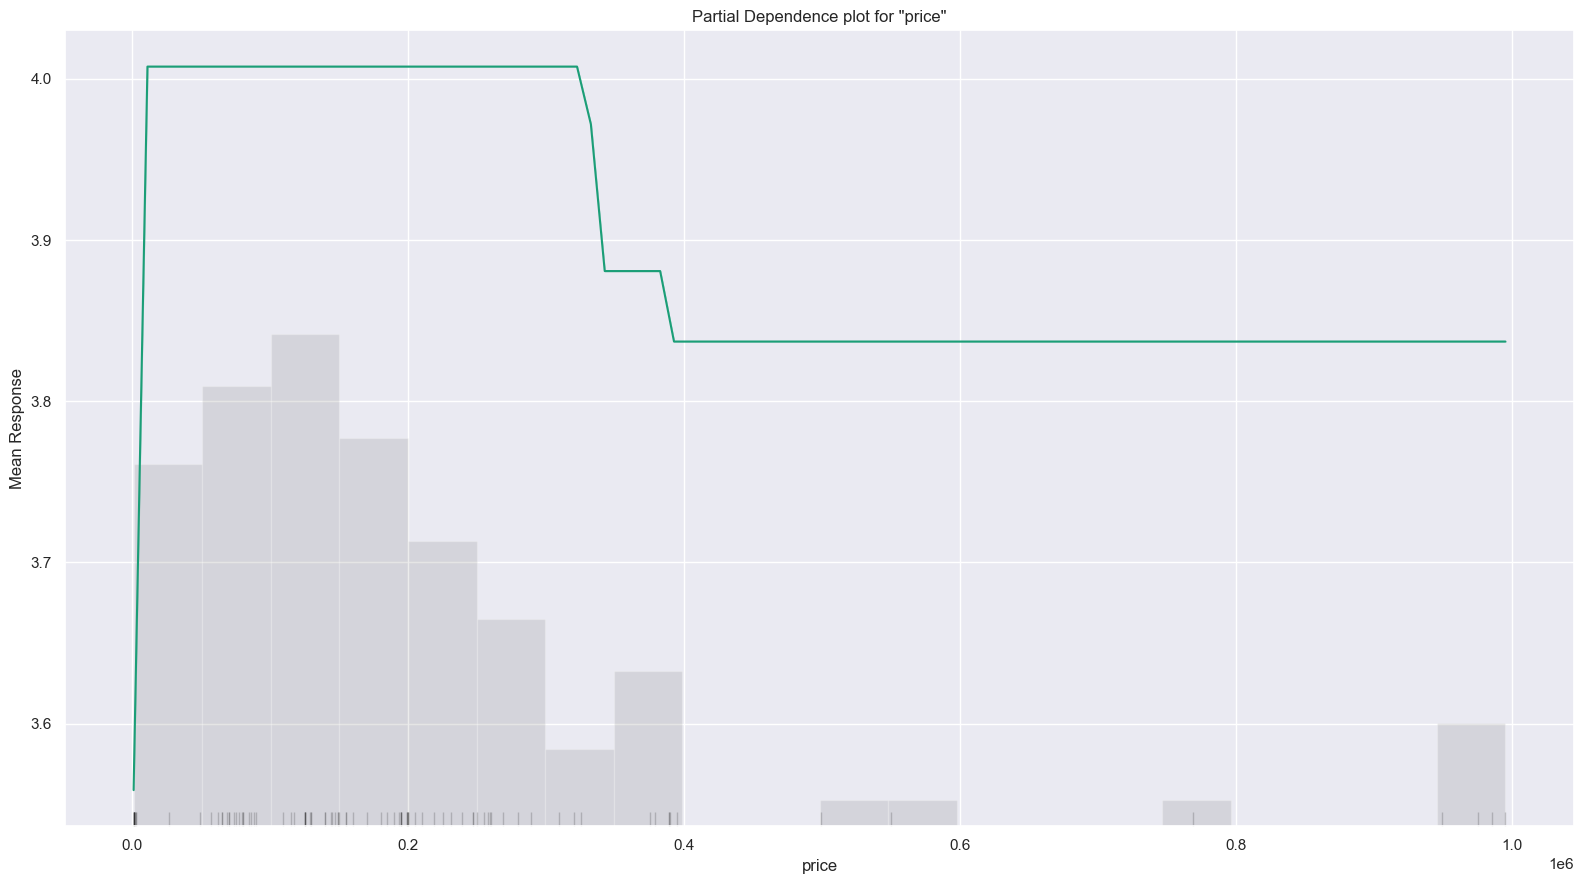

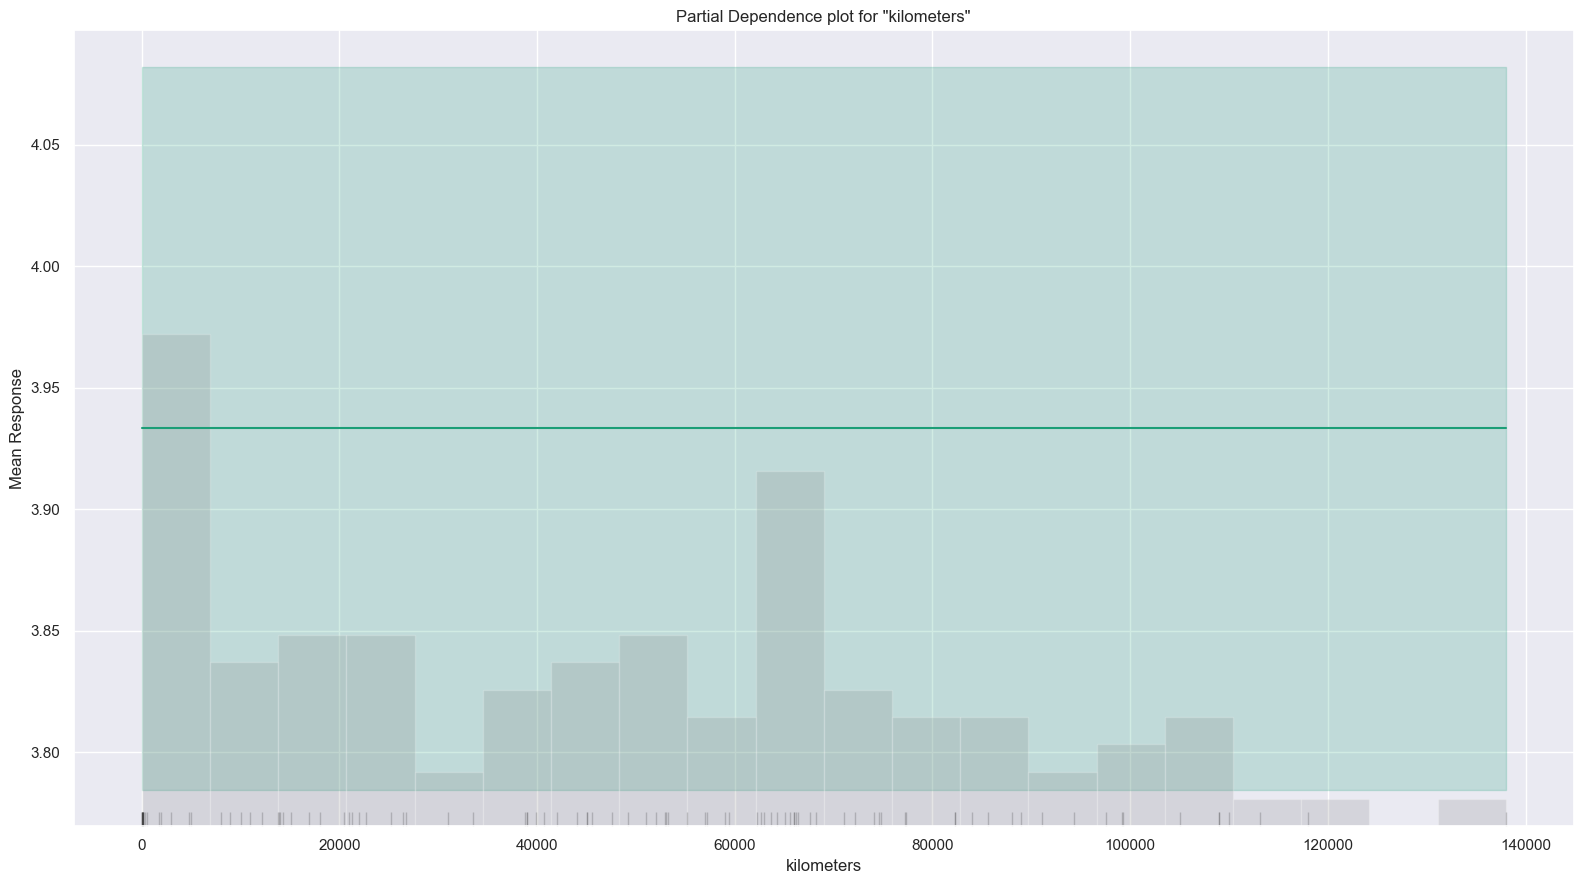

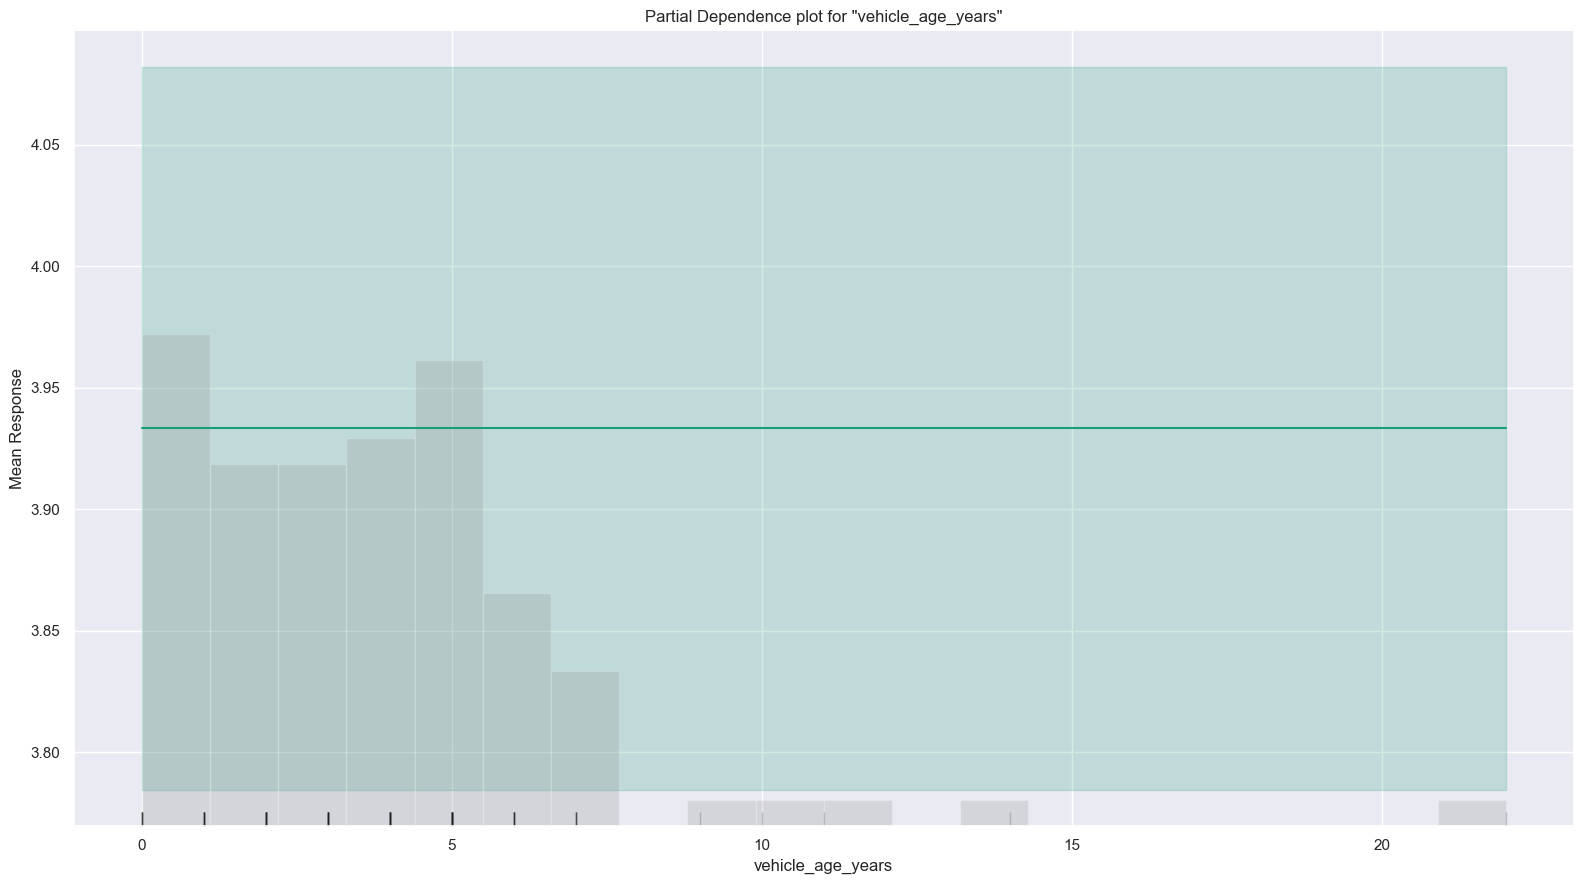

# Individual Conditional Expectation

> An Individual Conditional Expectation (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response. ICE plots are similar to partial dependence plots (PDP); PDP shows the average effect of a feature while ICE plot shows the effect for a single instance. This function will plot the effect for each decile. In contrast to the PDP, ICE plots can provide more insight, especially when there is stronger feature interaction.

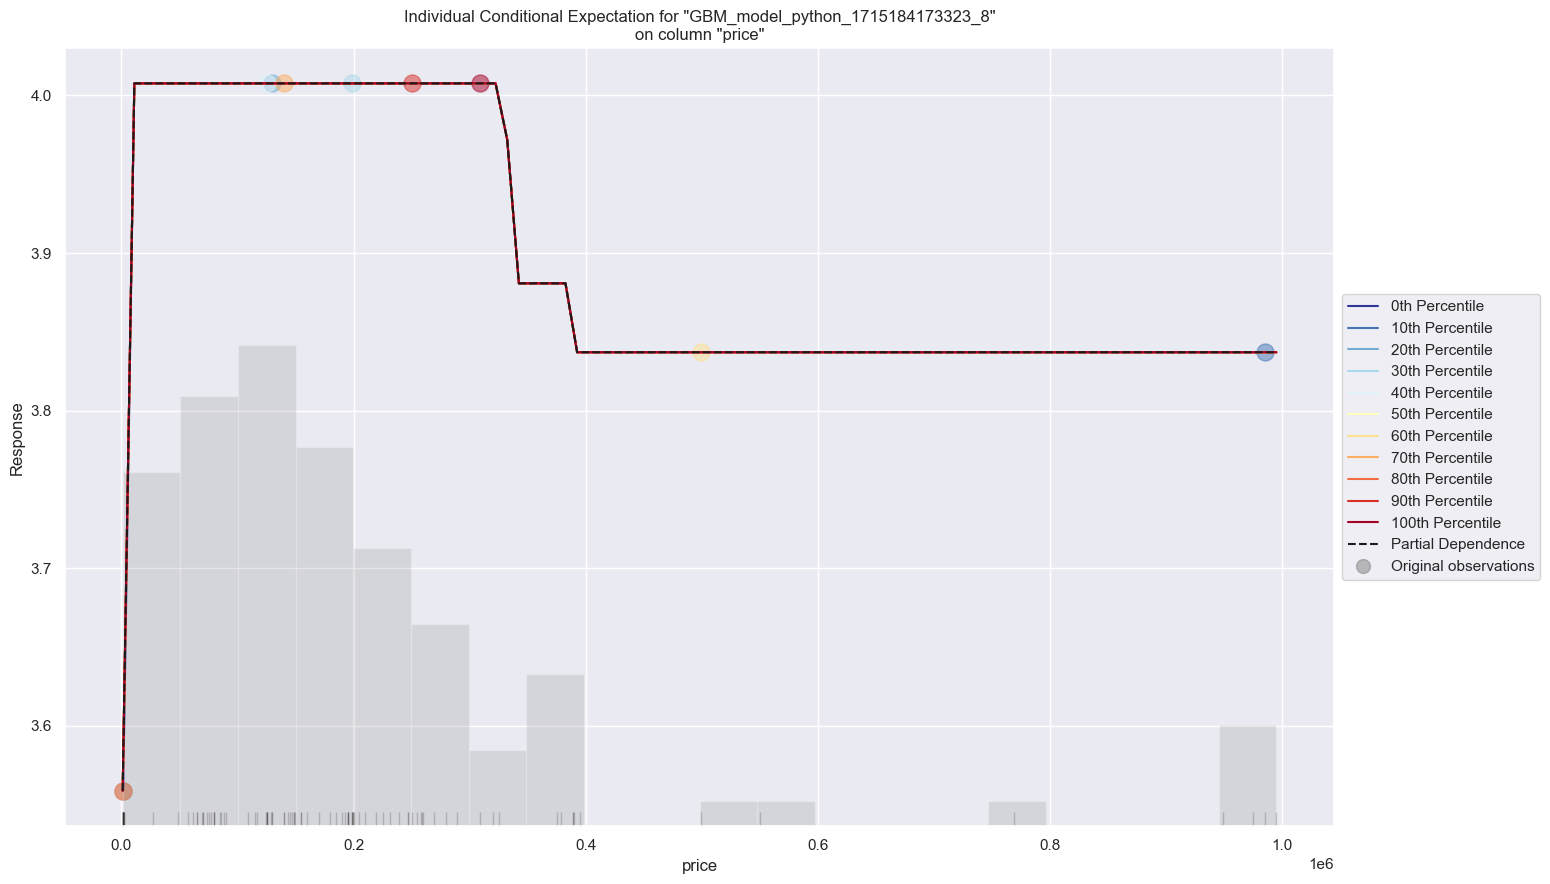

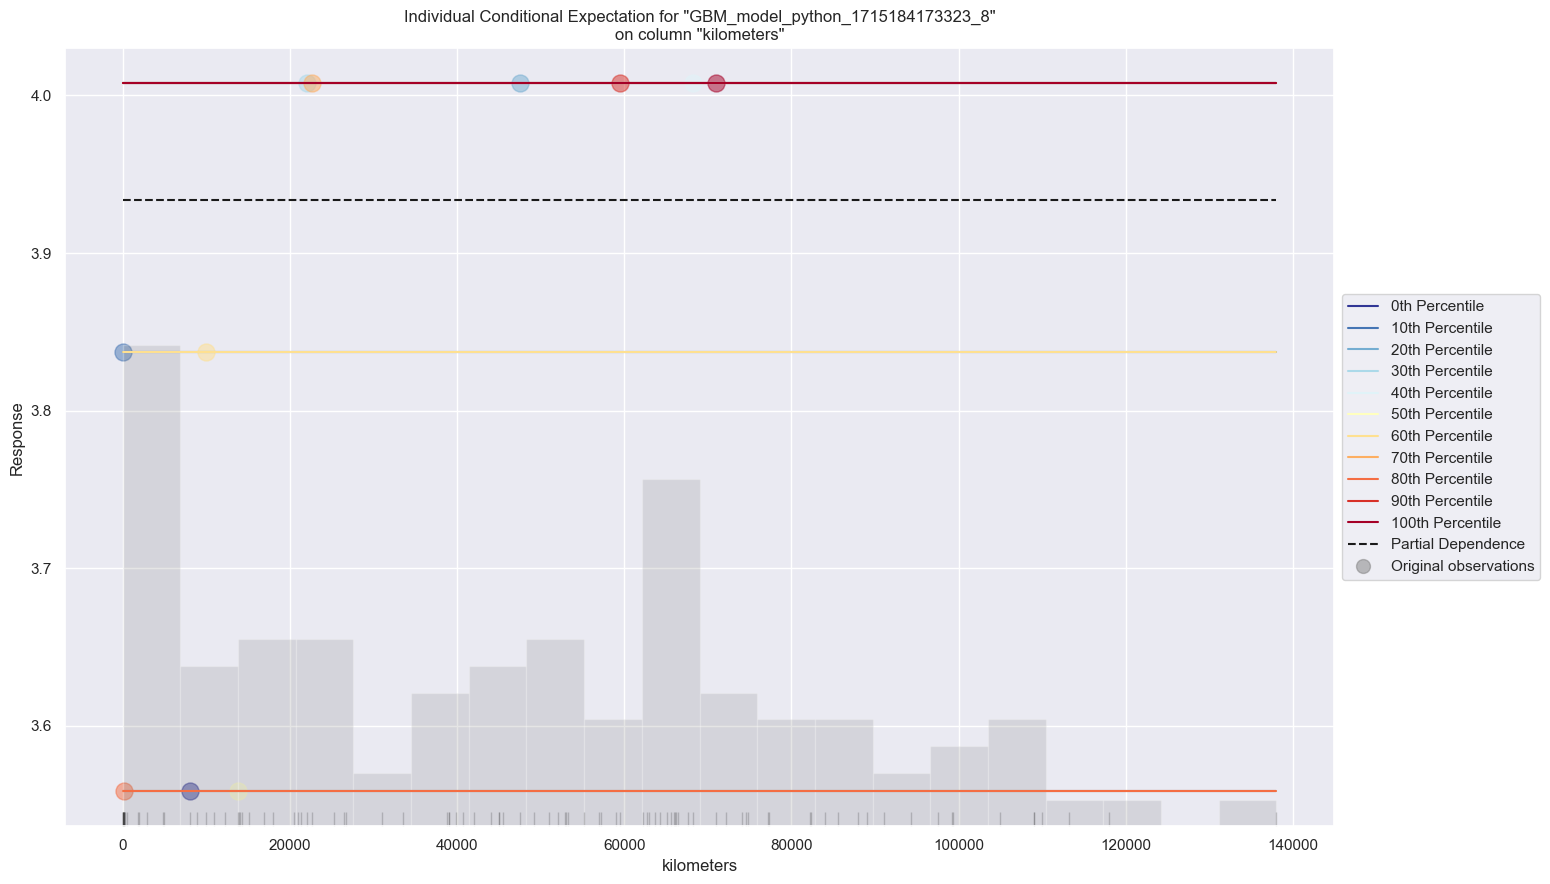

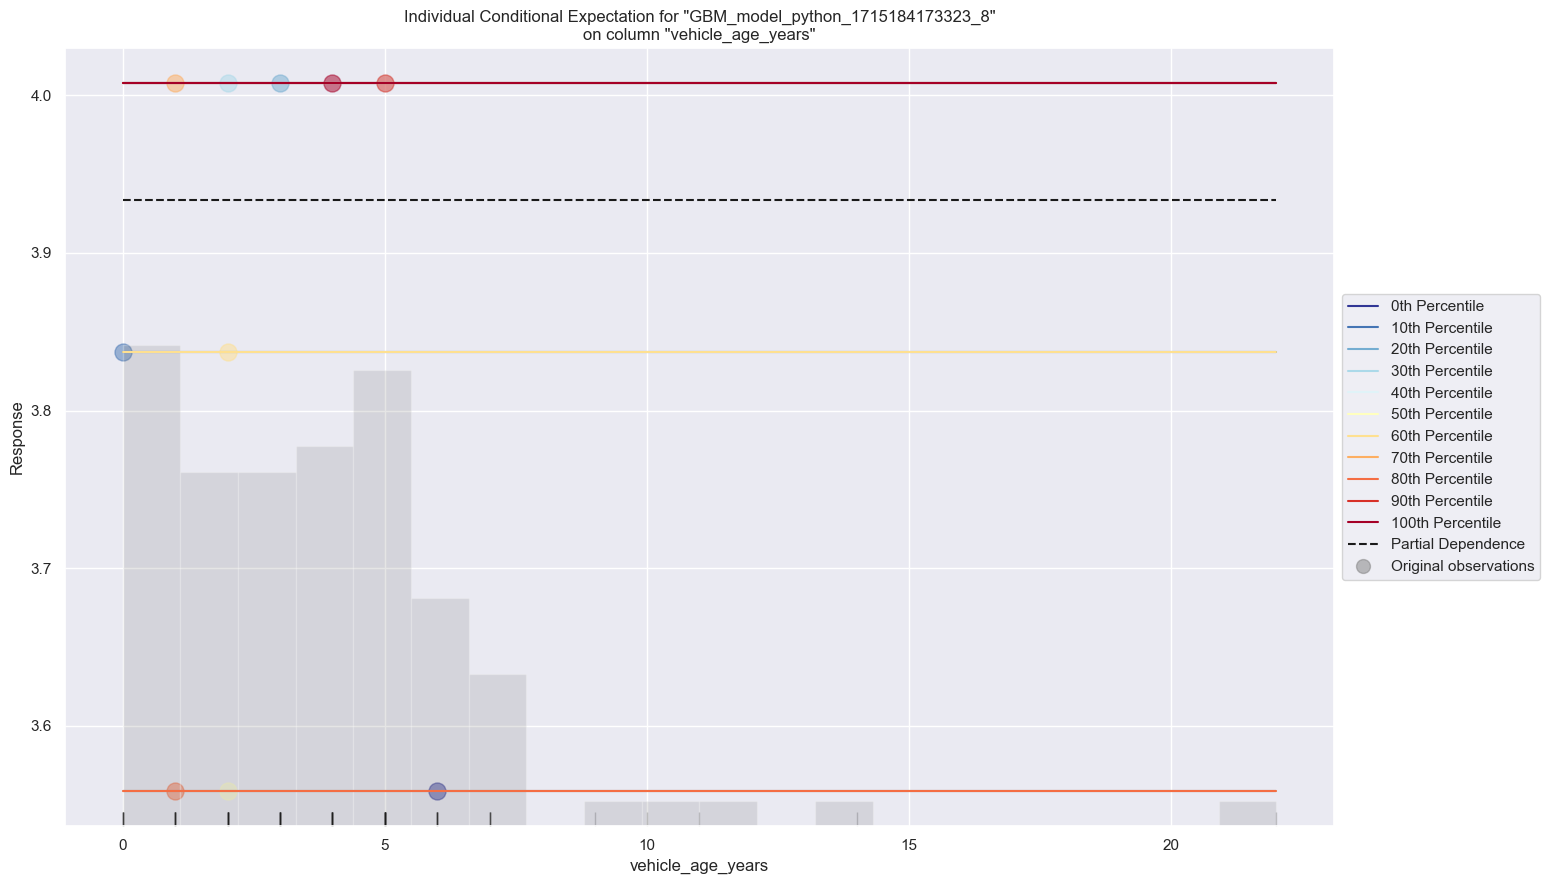

# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

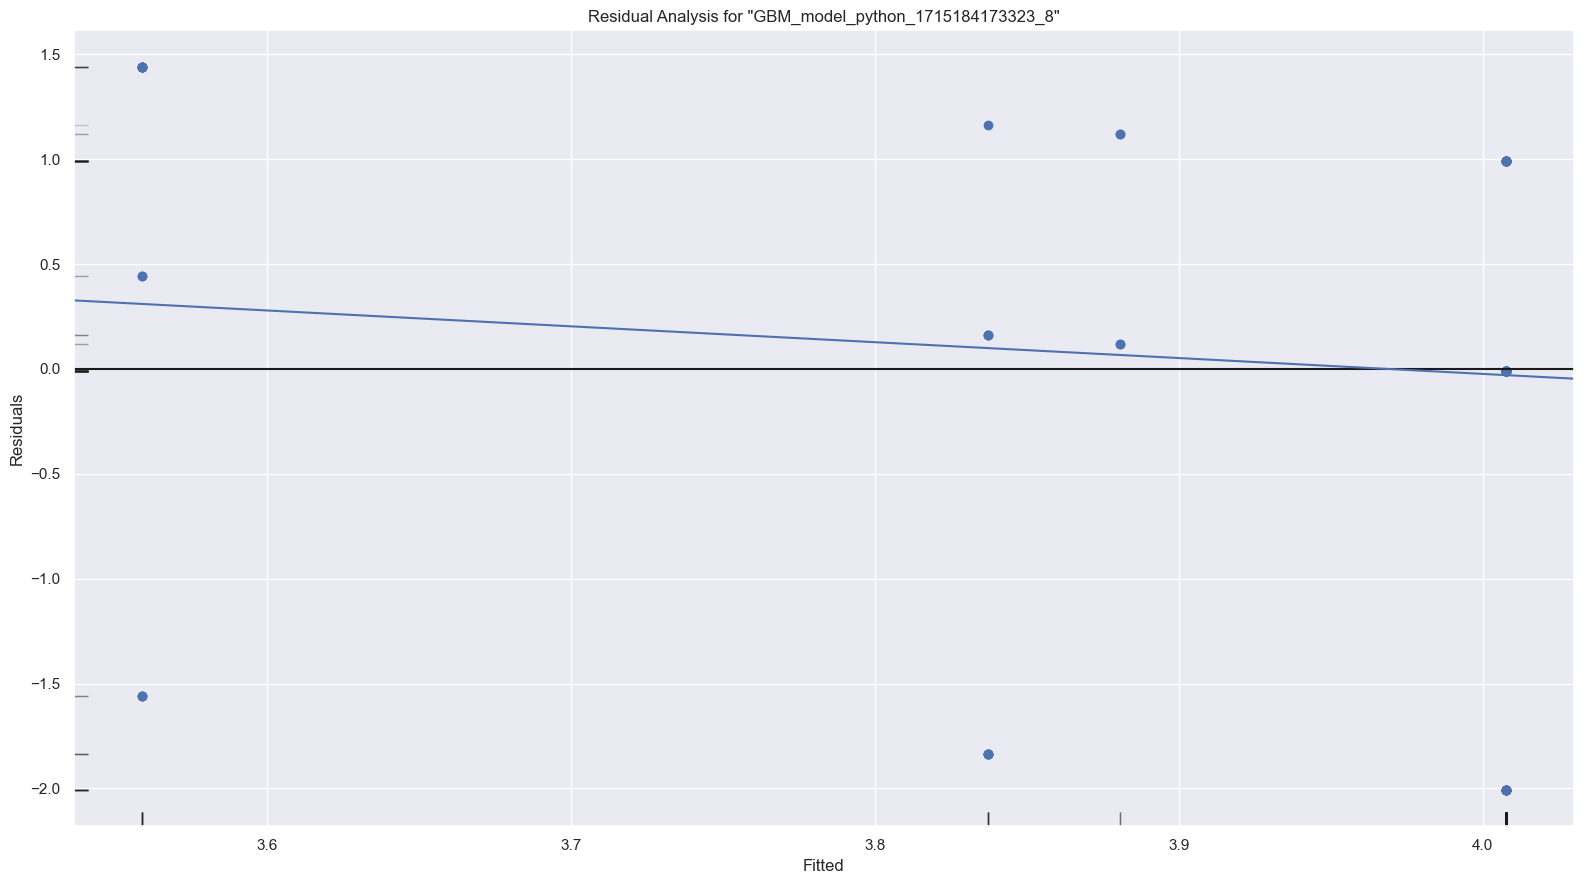

# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

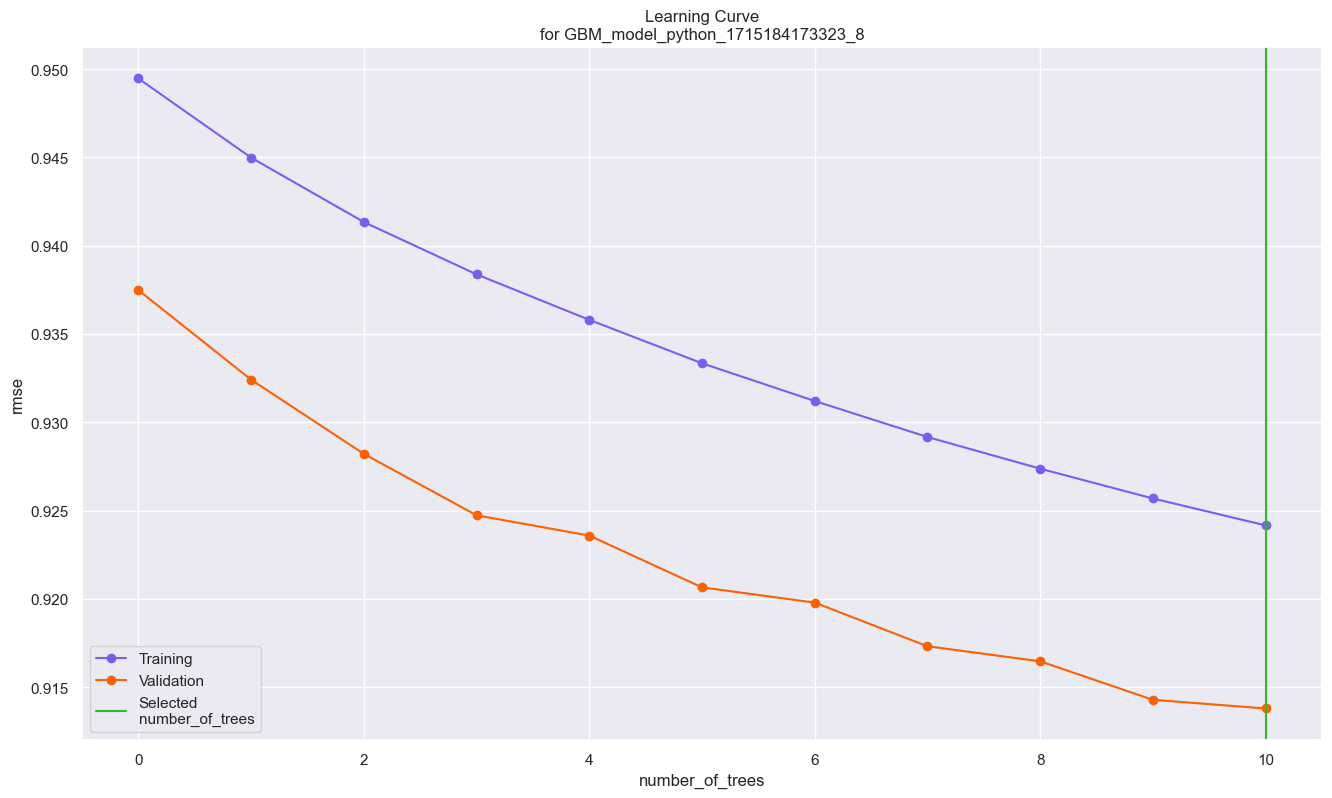

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

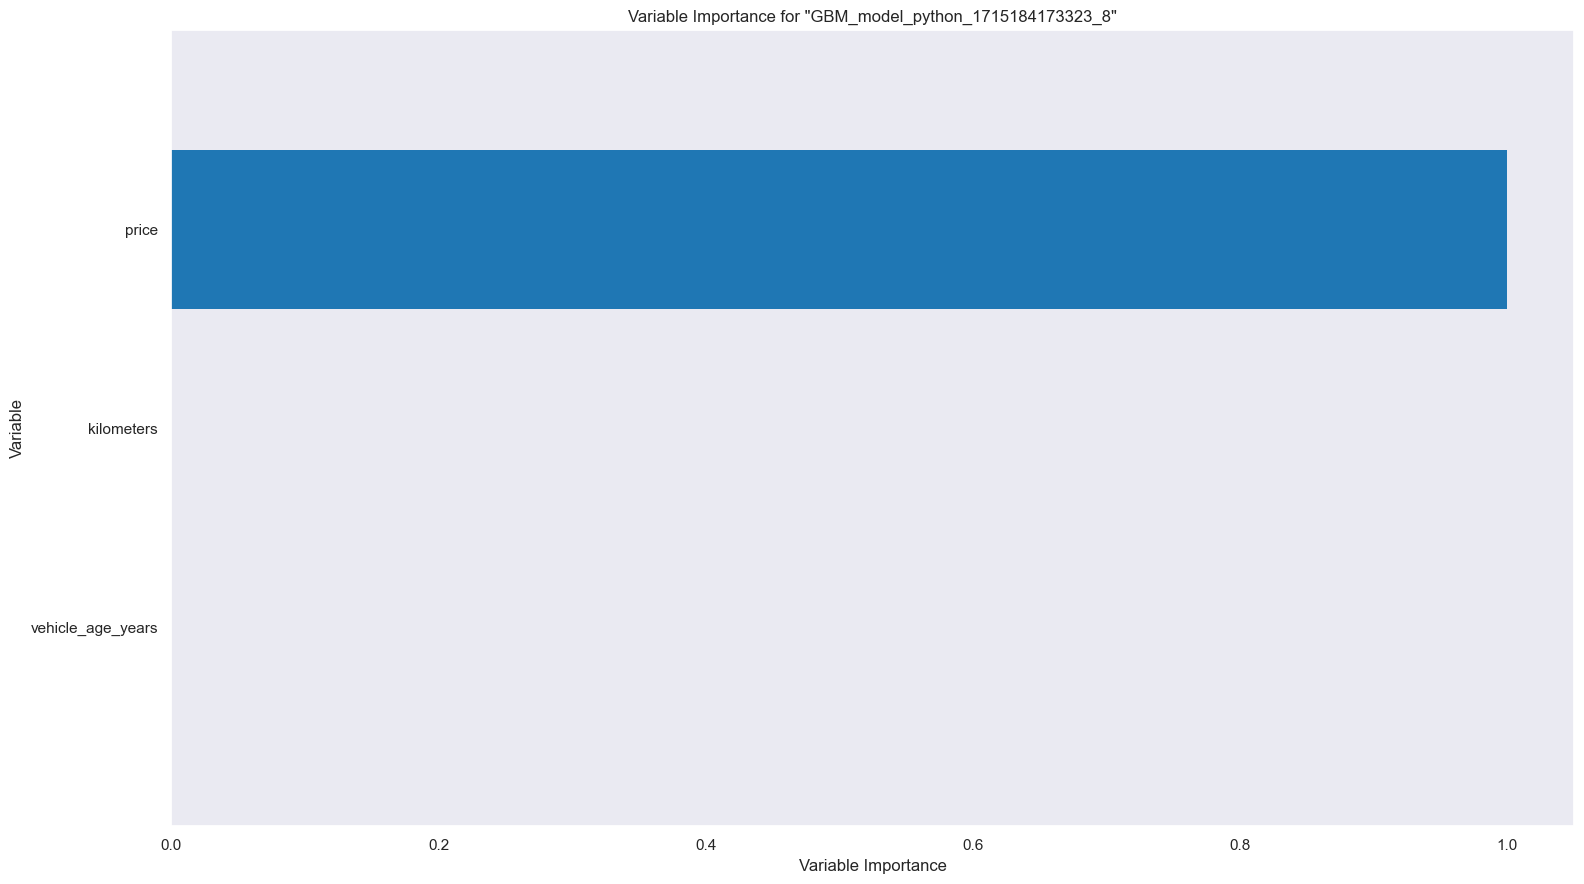

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

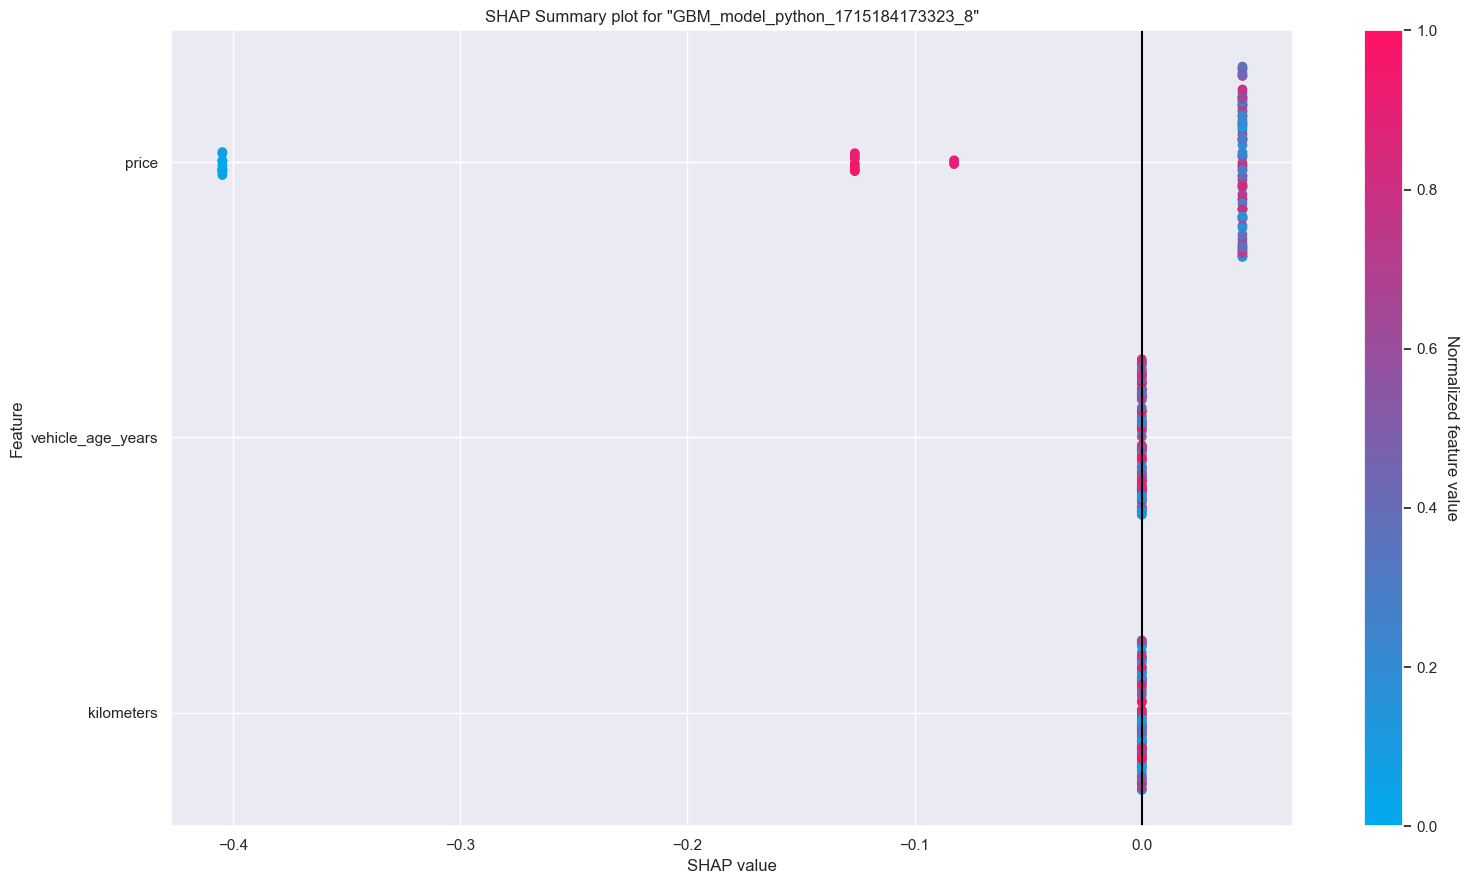

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

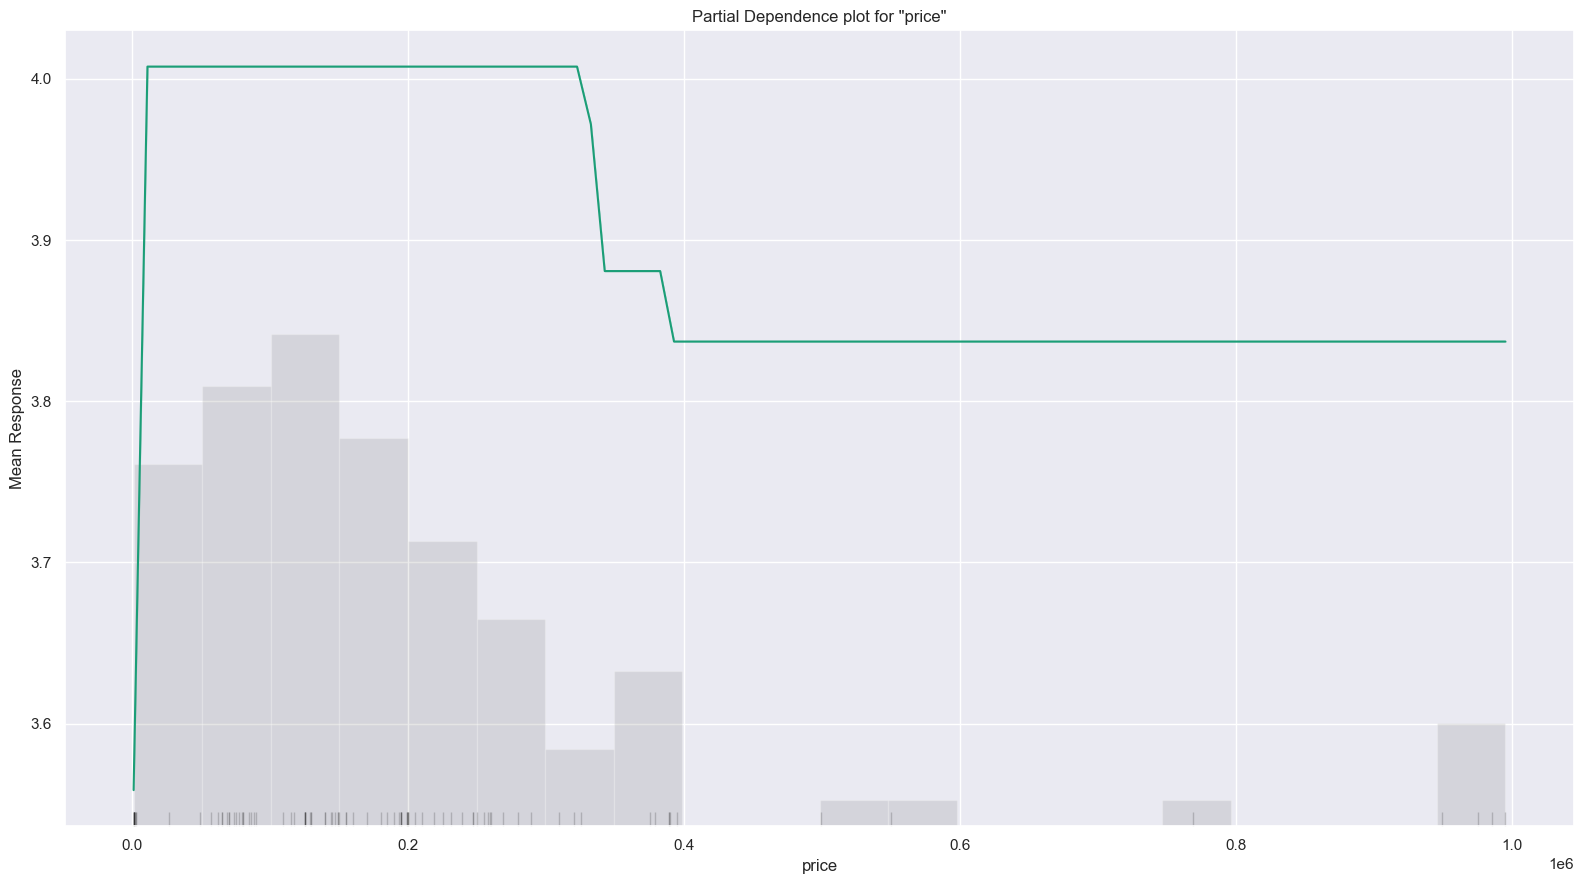

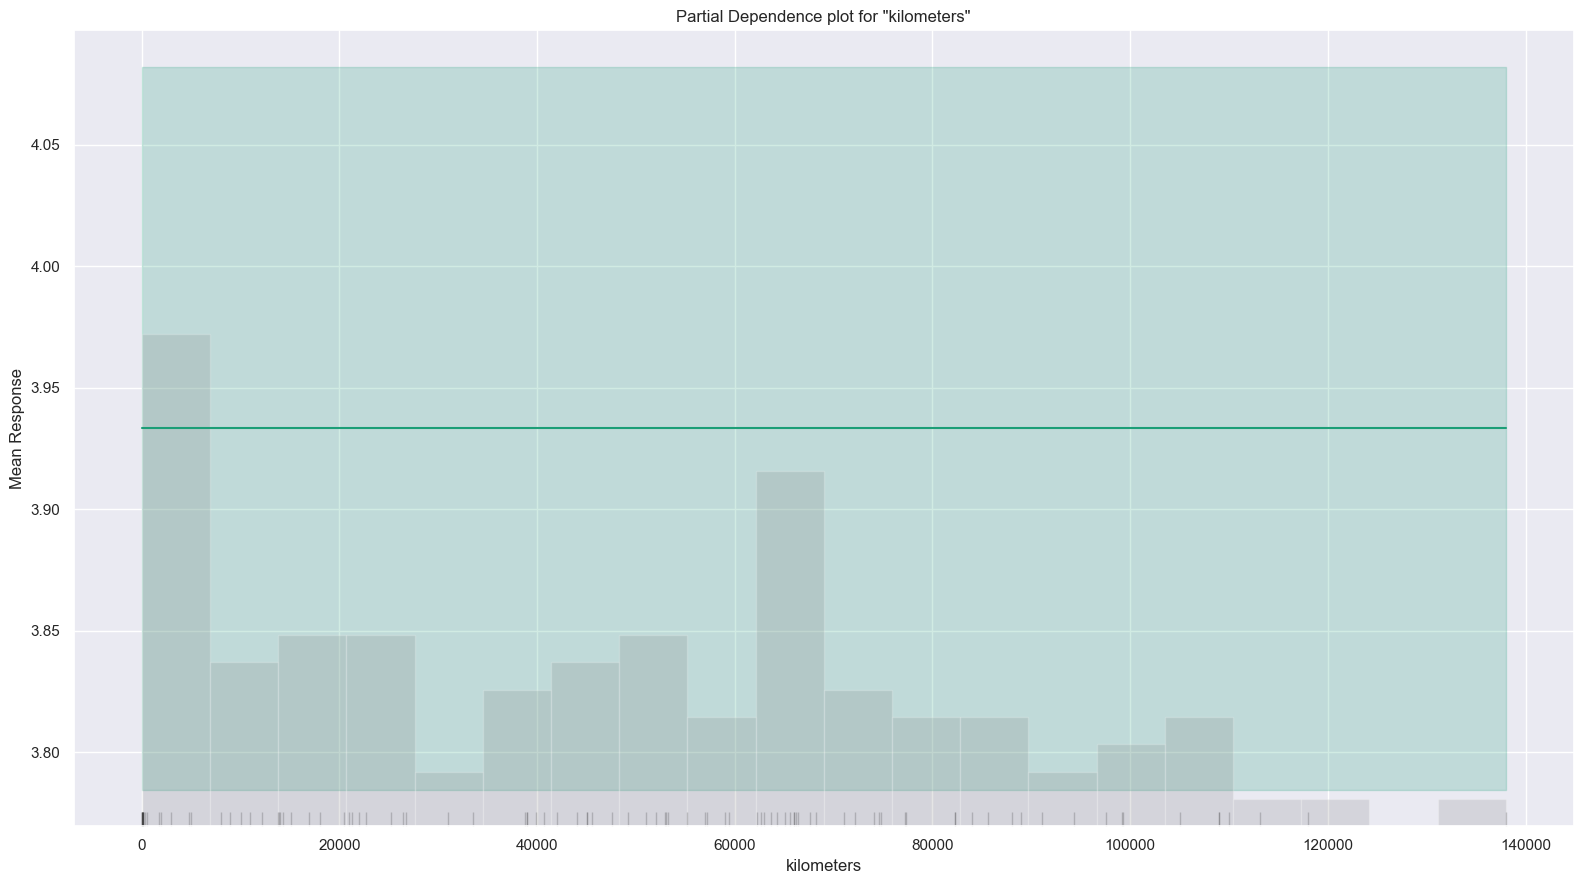

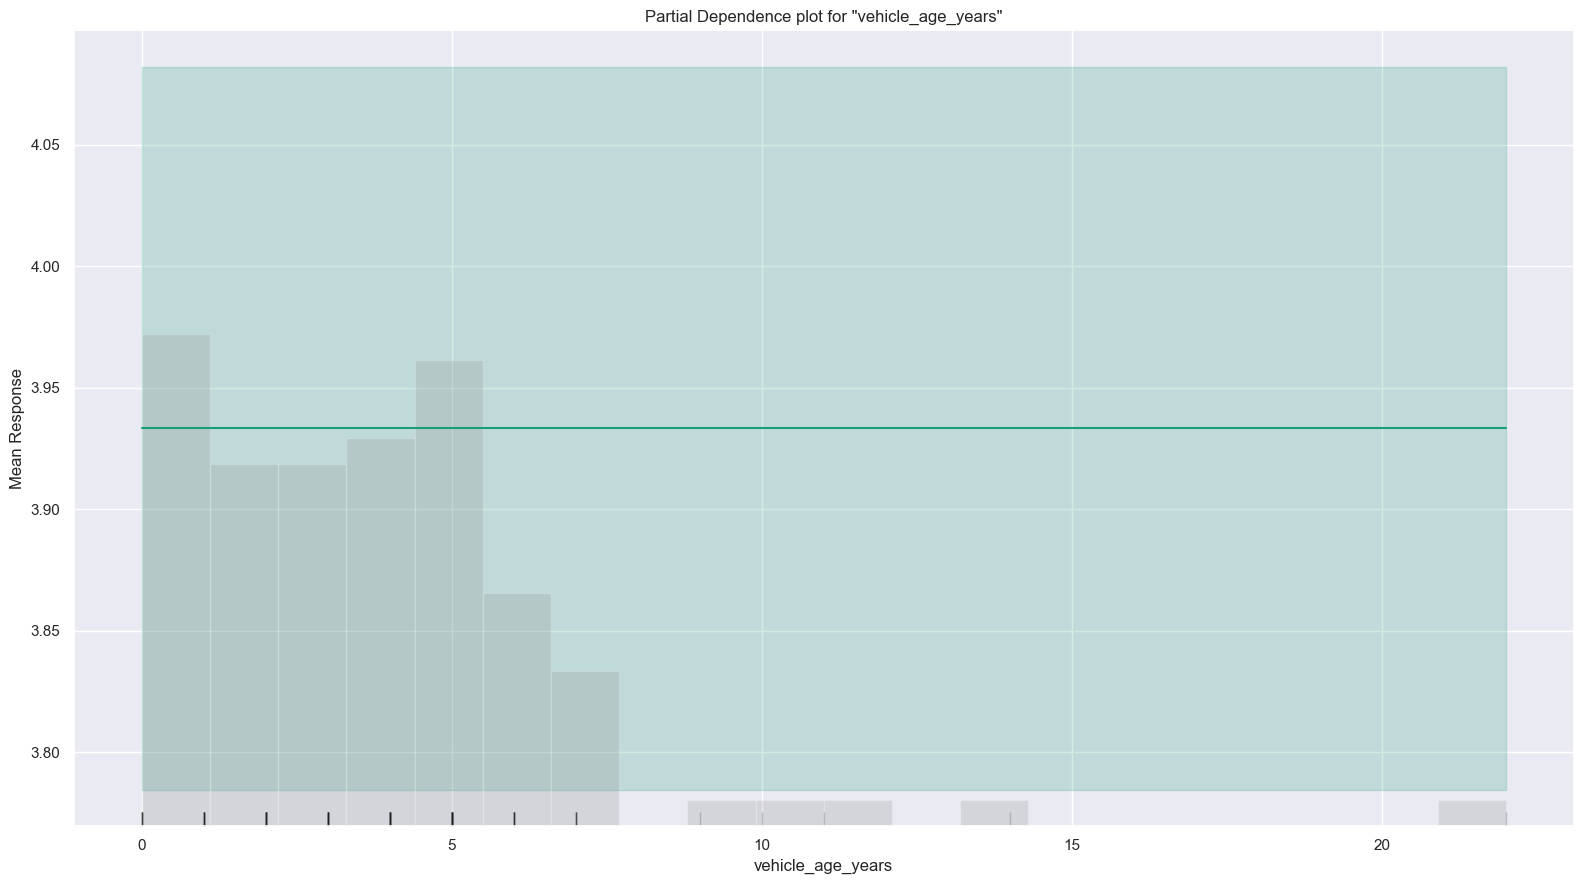

# Individual Conditional Expectation

> An Individual Conditional Expectation (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response. ICE plots are similar to partial dependence plots (PDP); PDP shows the average effect of a feature while ICE plot shows the effect for a single instance. This function will plot the effect for each decile. In contrast to the PDP, ICE plots can provide more insight, especially when there is stronger feature interaction.

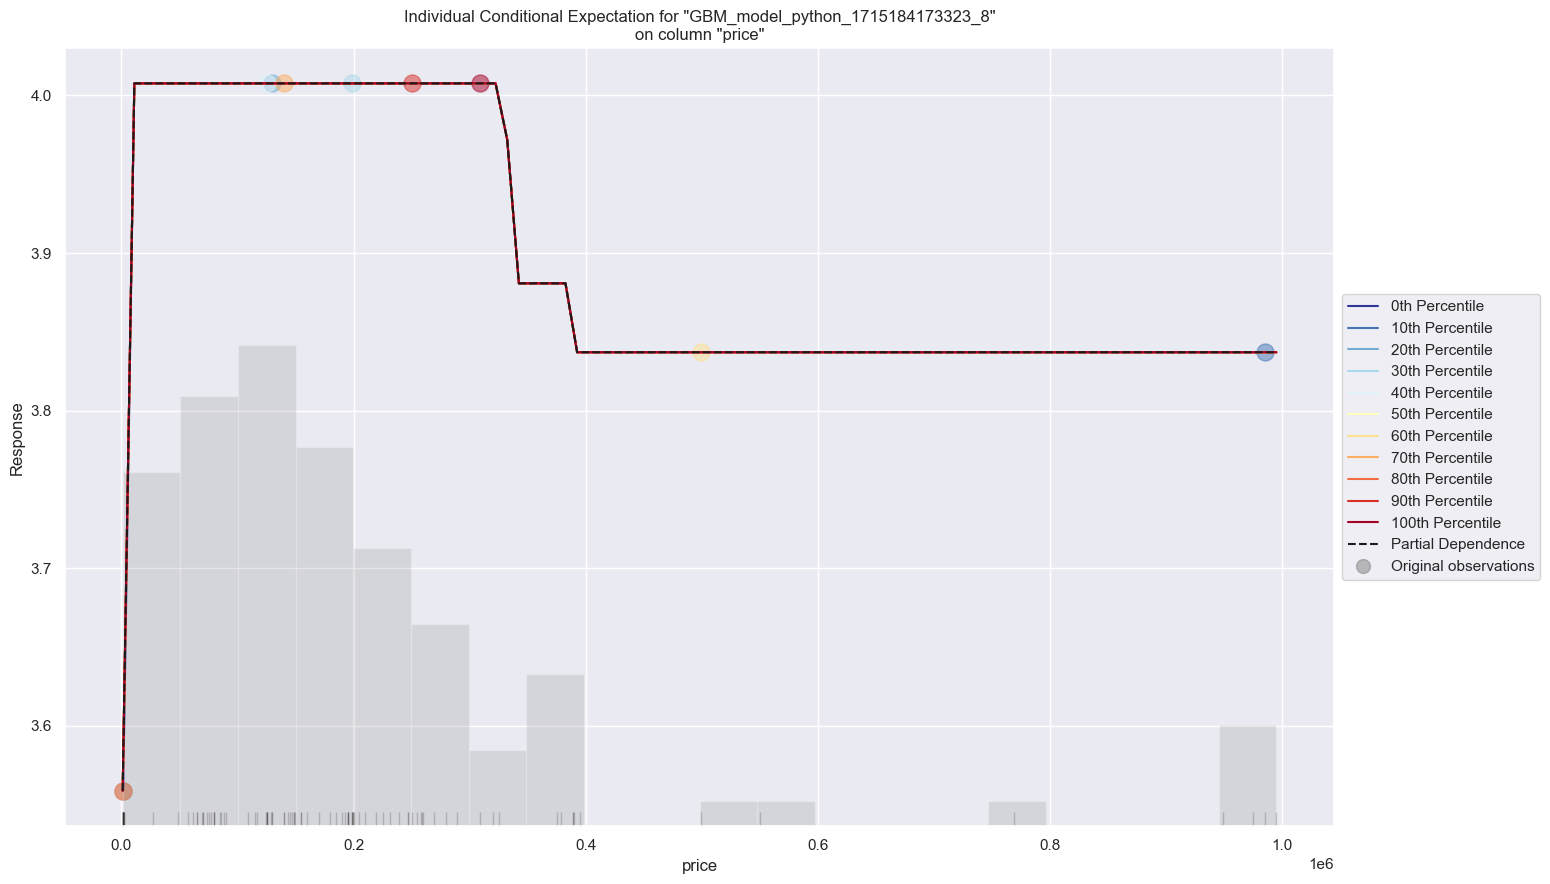

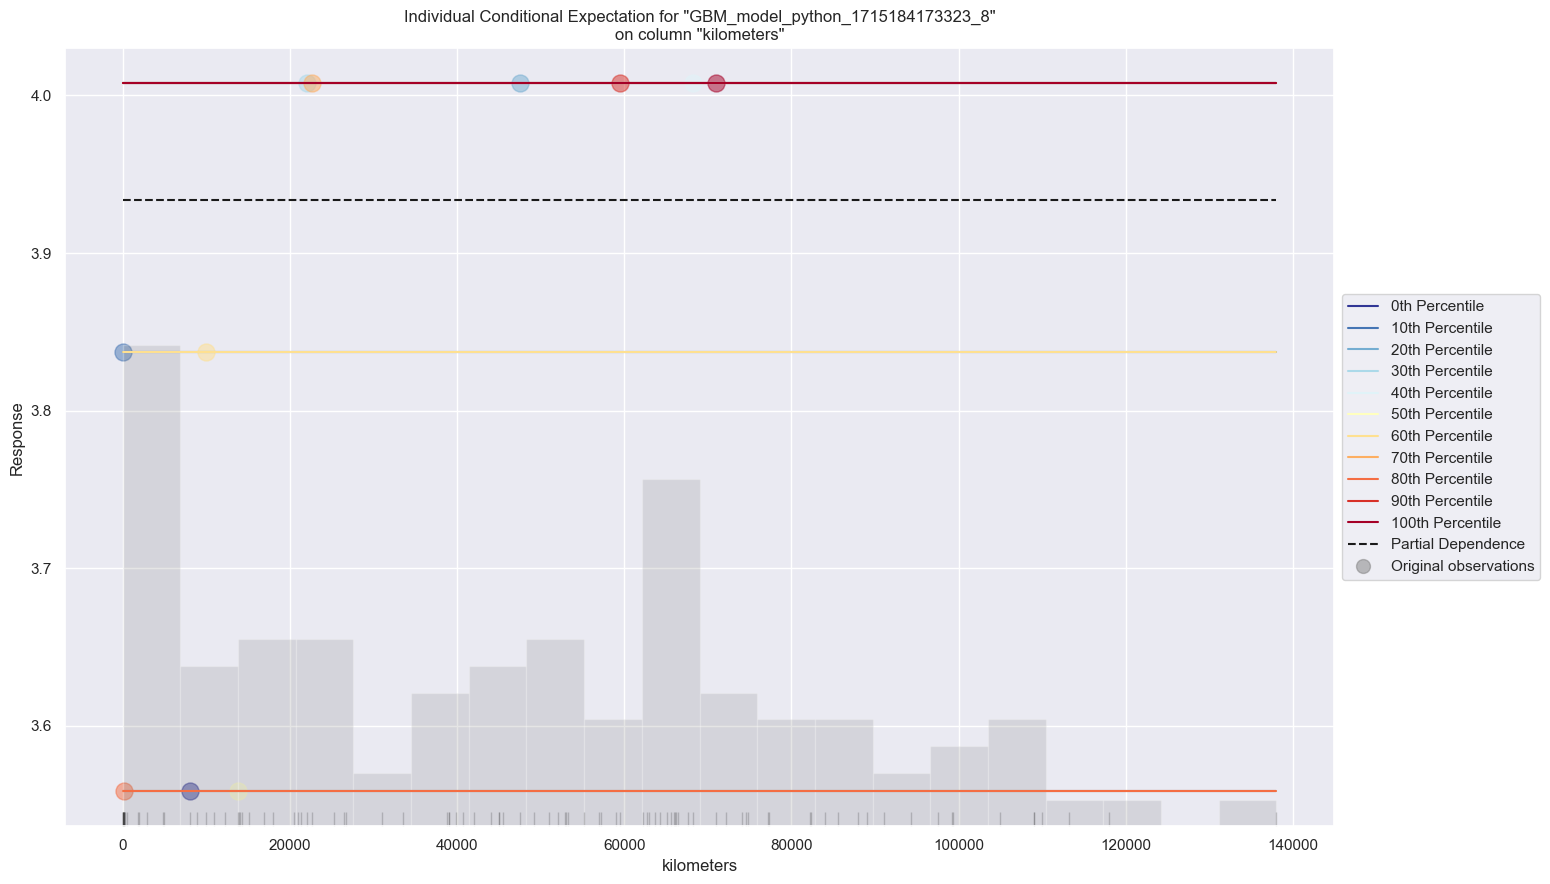

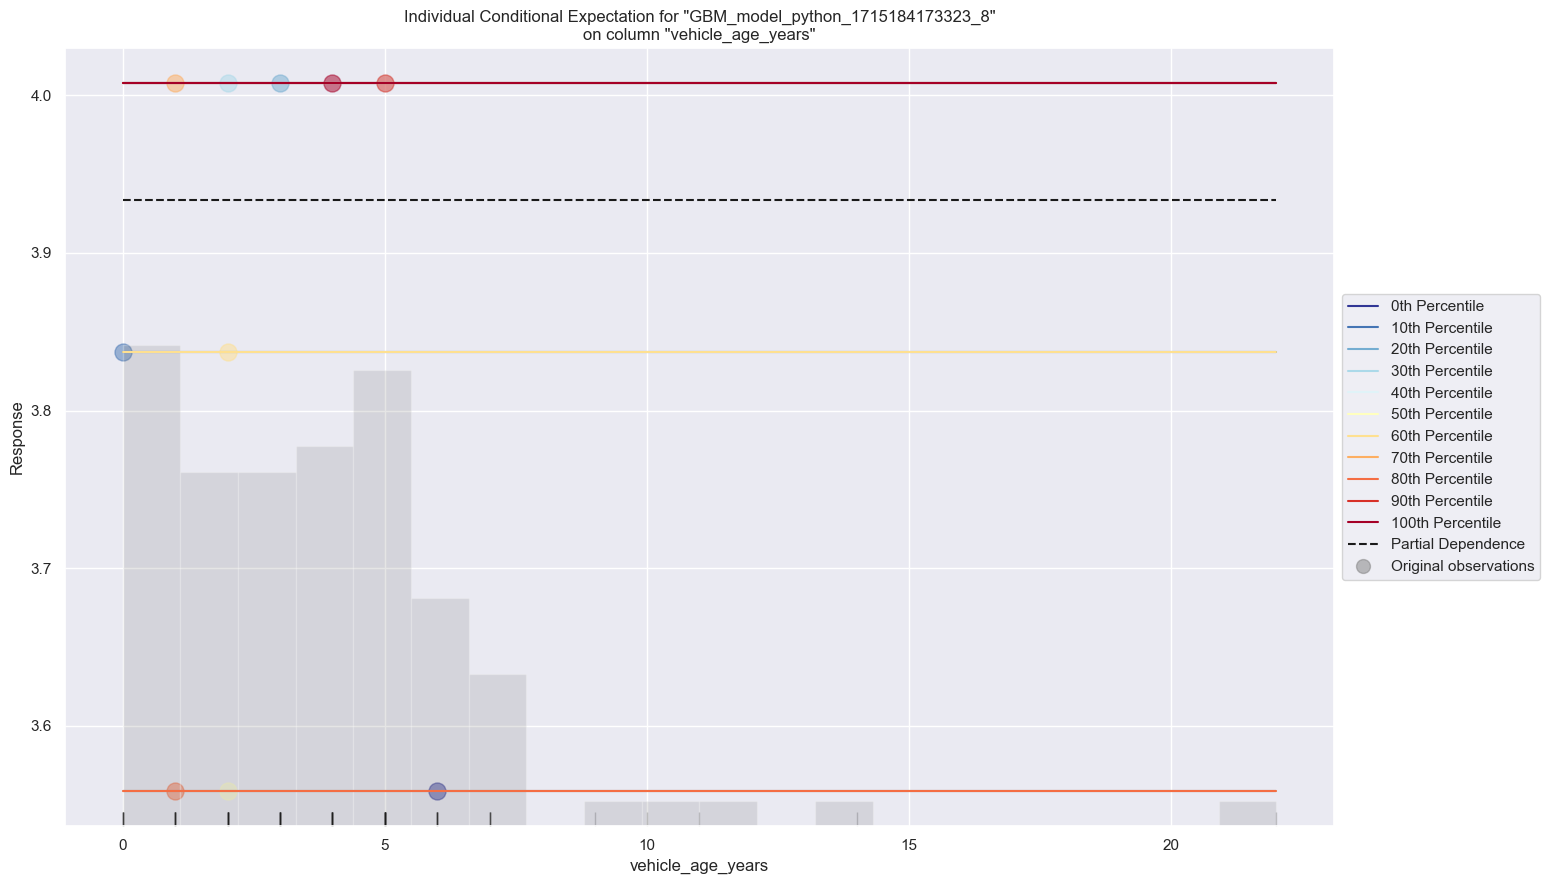

In [132]:
data_gbm.explain(train[0:100,:])

In [133]:
# Variable importances from each algorithm
# Calculate magnitude of normalized GLM coefficients
from six import iteritems
glm_varimp = data_glm.coef_norm()
for k,v in iteritems(glm_varimp):
    glm_varimp[k] = abs(glm_varimp[k])
    
# Sort in descending order by magnitude
glm_sorted = sorted(glm_varimp.items(), key = operator.itemgetter(1), reverse = True)
table = tabulate(glm_sorted, headers = ["Predictor", "Normalized Coefficient"], tablefmt = "orgtbl")
print("Variable Importances:\n\n" + table)

Variable Importances:

| Predictor         |   Normalized Coefficient |
|-------------------+--------------------------|
| Intercept         |                 3.96334  |
| vehicle_age_years |                 0.225714 |
| kilometers        |                 0.178078 |
| price             |                 0.128823 |


In [134]:
data_glm.varimp()

[('vehicle_age_years', 0.2257138192653656, 1.0, 0.4237841907106887),
 ('kilometers', 0.17807826399803162, 0.7889559645821679, 0.33434706495682476),
 ('price', 0.128822922706604, 0.5707356471388684, 0.2418687443324865)]

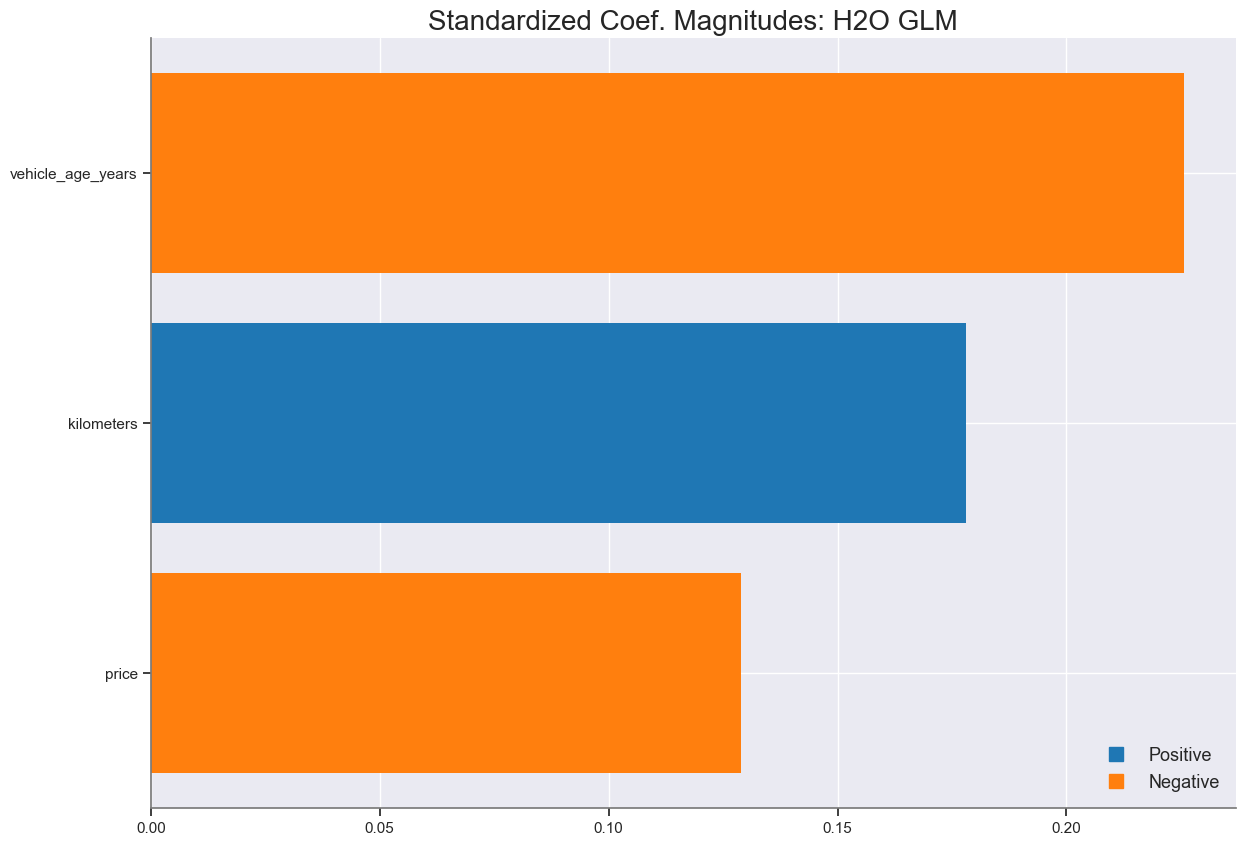

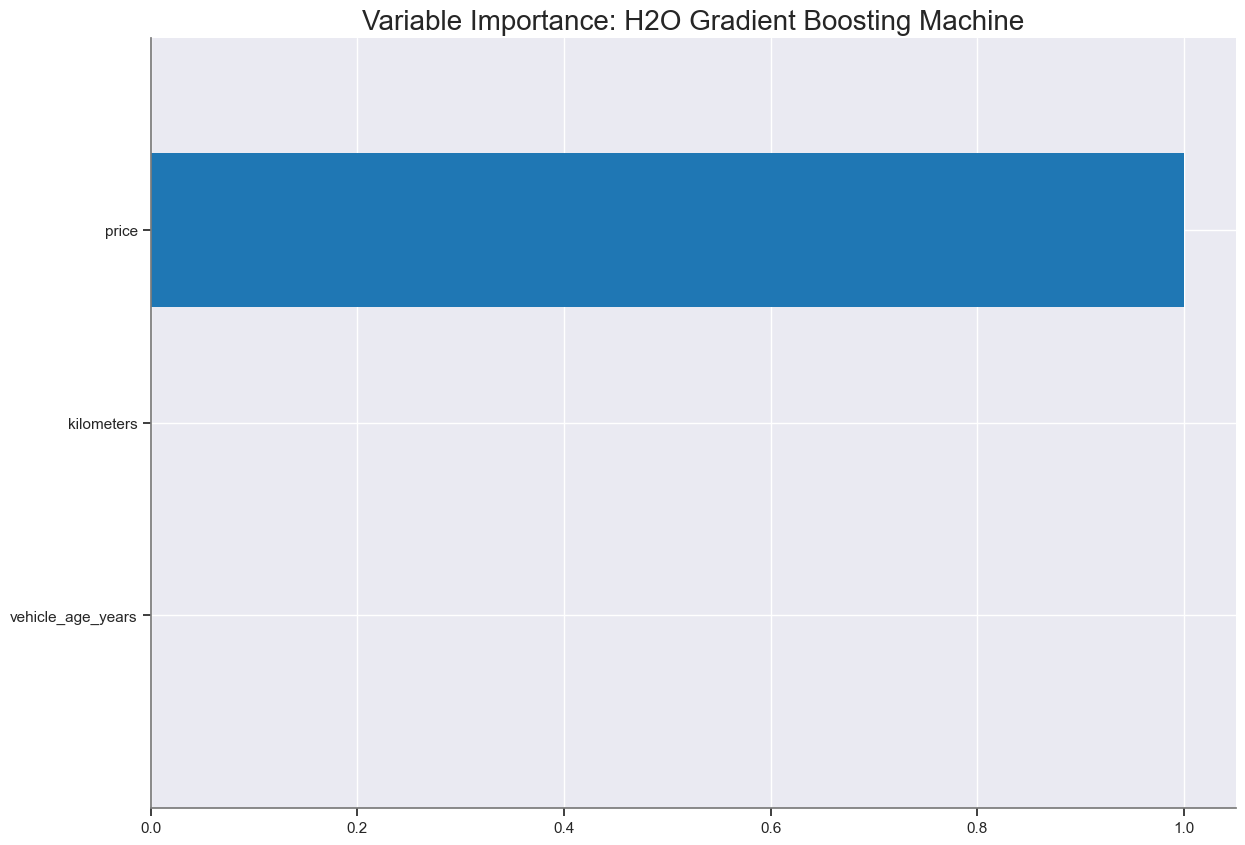

<Figure size 800x400 with 0 Axes>

In [135]:
data_glm.std_coef_plot()
data_gbm.varimp_plot()

In [136]:
# Model performance of GBM model on test data
data_gbm.model_performance(test)

ModelMetricsRegression: gbm
** Reported on test data. **

MSE: 0.8350423315216108
RMSE: 0.9138065066093647
MAE: 0.5976563193985078
RMSLE: 0.21303412277568815
Mean Residual Deviance: 0.8350423315216108

In [138]:
# Set up AutoML
run_time=333
aml = H2OAutoML(max_runtime_secs=run_time)

In [139]:
# Ensure that the column names in the 'X' variable match the column names in the training frame
X = ['doors', 'price']  # Include 'YearsAtCompany'

# Now train your AutoML model
aml.train(x=X, y=myY, training_frame=train)


AutoML progress: |
13:29:17.986: AutoML: XGBoost is not available; skipping it.

███████████████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OStackedEnsembleEstimator : Stacked Ensemble
Model Key: StackedEnsemble_BestOfFamily_5_AutoML_1_20240508_132917


Model Summary for Stacked Ensemble: 
key                                        value
-----------------------------------------  ----------------
Stacking strategy                          cross_validation
Number of base models (used / total)       5/5
# GBM base models (used / total)           1/1
# DeepLearning base models (used / total)  1/1
# DRF base models (used / total)           2/2
# GLM base models (used / total)           1/1
Metalearner algorithm                      GBM
Metalearner fold assignment scheme         Random
Metalearner nfolds                         5
Metalearner fold_column
Custom metalearner hyperparameters         None

ModelMetricsRegression: stackedensemble
** Reported on train data. **

MSE: 0.7352033595418639
RMSE: 0.8574400034648861
MAE: 0.5909046270776518
RMSLE: 0.19964192689099544
Mean Residual Deviance: 0.7352033595418639

ModelMetricsRegression: stackedensemble
** Reported on cross-validation data. **

MSE: 0.801734650949422
RMSE: 0.8953963652759721
MAE: 0.6309341020091827
RMSLE: 0.2083498655531384
Mean Residual Deviance: 0.801734650949422

Cross-Validation Metrics Summary: 
                        mean      sd          cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid
----------------------  --------  ----------  ------------  ------------  ------------  ------------  ------------
mae                     0.63085   0.0208737   0.630913      0.611126      0.654882      0.609086      0.648245
mean_residual_deviance  0.801585  0.0398443   0.794378      0.76349       0.849928      0.764671      0.835459
mse                     0.801585  0.0398443   0.794378      0.76349       0.849928      0.764671      0.835459
r2                      0.110539  0.0173826   0.0966552     0.121264      0.0882806     0.129666      0.116829
residual_deviance       0.801585  0.0398443   0.794378      0.76349       0.849928      0.764671      0.835459
rmse                    0.895092  0.0222091   0.891279      0.873779      0.921915      0.874455      0.914034
rmsle                   0.20826   0.00601121  0.205954      0.2024        0.215121      0.203576      0.214249

[tips]
Use `model.explain()` to inspect the model.
--
Use `h2o.display.toggle_user_tips()` to switch on/off this section.

In [141]:
#to find the aml leaderboard
print(aml.leaderboard)

model_id                                                              rmse       mse       mae     rmsle    mean_residual_deviance
StackedEnsemble_BestOfFamily_5_AutoML_1_20240508_132917           0.895396  0.801735  0.630934  0.20835                   0.801735
StackedEnsemble_BestOfFamily_2_AutoML_1_20240508_132917           0.896721  0.804108  0.639473  0.208694                  0.804108
StackedEnsemble_AllModels_1_AutoML_1_20240508_132917              0.897041  0.804682  0.639668  0.208773                  0.804682
StackedEnsemble_AllModels_4_AutoML_1_20240508_132917              0.898034  0.806465  0.634815  0.209011                  0.806465
StackedEnsemble_BestOfFamily_3_AutoML_1_20240508_132917           0.898279  0.806906  0.633698  0.209155                  0.806906
StackedEnsemble_AllModels_2_AutoML_1_20240508_132917              0.89833   0.806996  0.634544  0.209119                  0.806996
StackedEnsemble_AllModels_3_AutoML_1_20240508_132917              0.898452  0.80721

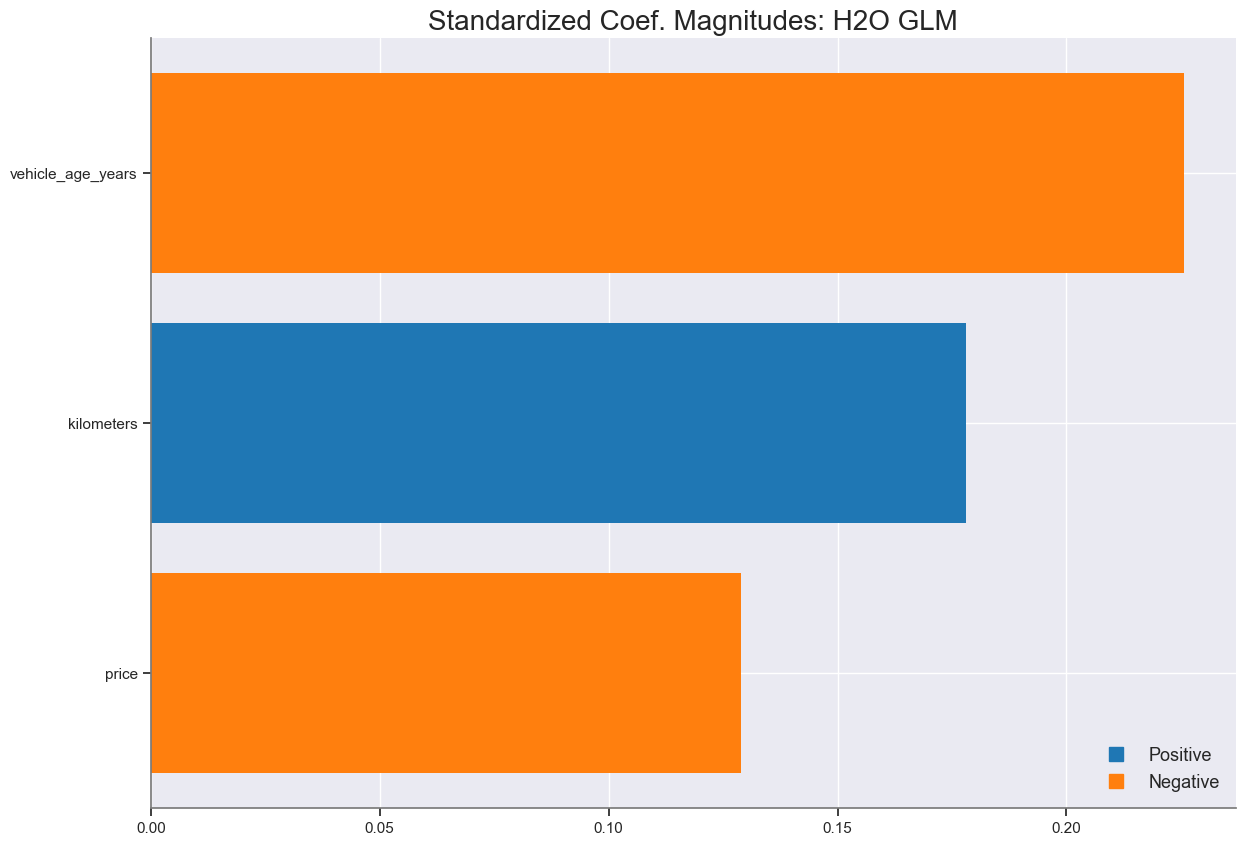

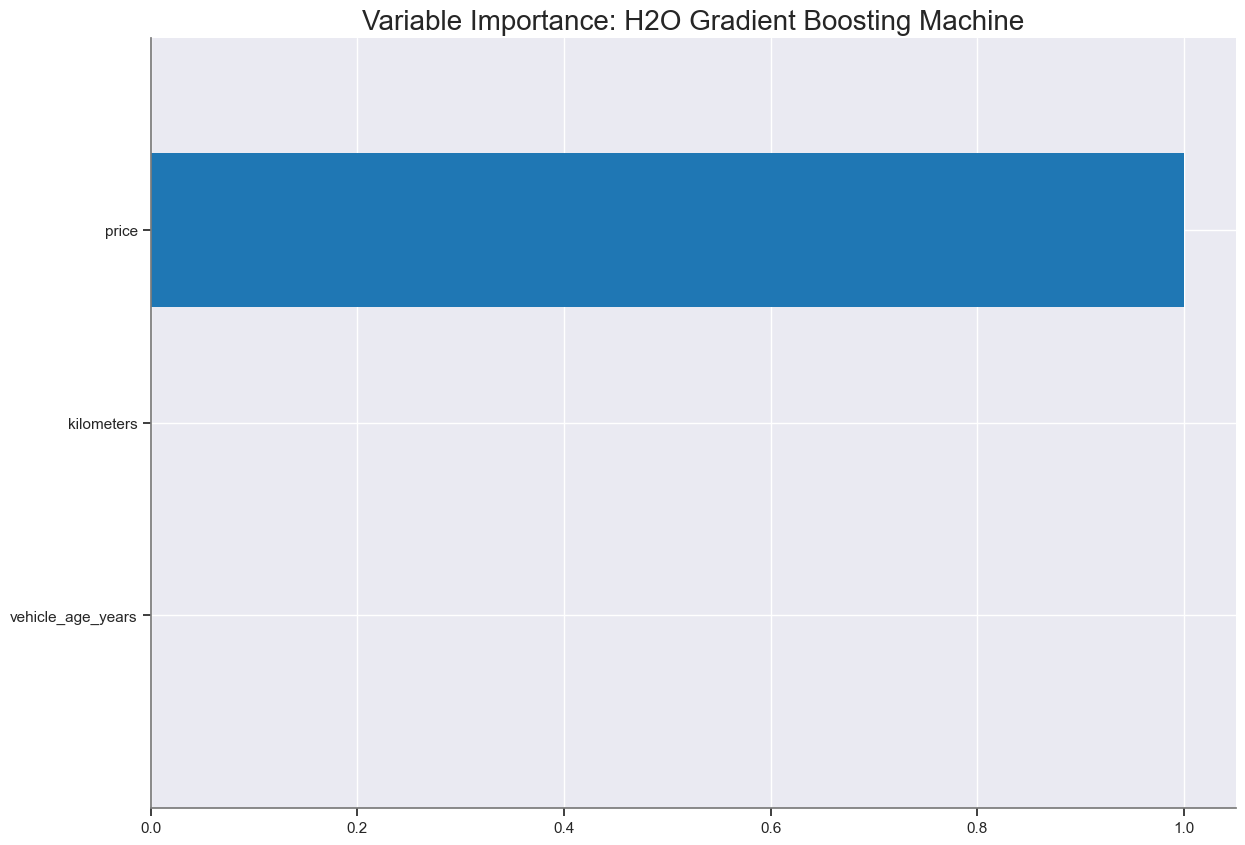

<Figure size 800x400 with 0 Axes>

In [142]:
#to retrive the variable importance
data_glm.std_coef_plot()
data_gbm.varimp_plot()

In [143]:
#to depict best model in h2o
best_model = h2o.get_model(aml.leaderboard[0,'model_id'])

In [144]:
best_model.algo

'stackedensemble'

In [151]:
def model_performance_stats(perf):
    d={}
    try:    
      d['mse']=perf.mse()
    except:
      pass      
    try:    
      d['rmse']=perf.rmse() 
    except:
      pass      
    try:    
      d['null_degrees_of_freedom']=perf.null_degrees_of_freedom()
    except:
      pass      
    try:    
      d['residual_degrees_of_freedom']=perf.residual_degrees_of_freedom()
    except:
      pass      
    try:    
      d['residual_deviance']=perf.residual_deviance() 
    except:
      pass      
    try:    
      d['null_deviance']=perf.null_deviance() 
    except:
      pass      
    try:    
      d['aic']=perf.aic() 
    except:
      pass      
    try:
      d['logloss']=perf.logloss() 
    except:
      pass    
    try:
      d['auc']=perf.auc()
    except:
      pass  
    try:
      d['gini']=perf.gini()
    except:
      pass    
    return d

In [152]:
mod_perf=best_model.model_performance(data)
stats_test={}
stats_test=model_performance_stats(mod_perf)
stats_test

{'mse': 0.7398887856496916,
 'rmse': 0.8601678822472342,
 'null_degrees_of_freedom': None,
 'residual_degrees_of_freedom': None,
 'residual_deviance': None,
 'null_deviance': None}